# 기본 라이브러리

In [1]:
import pandas as pd
# pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
sns.set_palette('pastel')
sns.despine()
import scipy as sp

<Figure size 432x288 with 0 Axes>

# 데이터 불러오기

In [2]:
data = pd.read_csv('무상증자data_v2.csv')
data.head(1)

,Unnamed: 0,회사명,code,Date,High,Low,Close,Volume,기관합계,개인,...,자기주식비율,베타,거래회전율,기업규모(log),증자비율,무상증자여부,Name,Market,Sector,Industry
0,0,코오롱티슈진,950160,2018-06-30,38407.5,36175.0,36943.75,412945.75,-3.955232e+08,5.744925e+08,...,0.0,1.415067,0.03358,26.842061,0.0,0,코오롱티슈진,KOSDAQ,기초 의약물질 및 생물학적 제제 제조업,골관절염 치료제


# 데이터 전처리

In [3]:
data.drop(['Unnamed: 0','Name'], axis = 1, inplace = True)
data.columns

Index(['회사명', 'code', 'Date', 'High', 'Low', 'Close', 'Volume', '기관합계', '개인',
       'MFI', '윌리엄R%', 'RSI', 'CCI', '정배열', '역배열', 'OBV', '볼린저밴드위치',
       '소액주주보유주식비율', '최대주주_특수관계인지분율', '유동비율', '부채비율', '자기자본비율', '매출액증가율',
       '영업이익증가율', 'EBITDA증가율', 'EPS증가율', '당기순이익증가율', '흑자전환', '자산성장율', '자본성장율',
       '부채비율성장율', '유동비율성장율', '자산회전율', '자산회전율성장율', '부채회전율', '자본회전율', '영업이익율',
       'EBITDA마진율', 'ROA', 'ROE', 'OP/A', 'PER', 'PSR', 'PBR', 'EV/EBITDA',
       '자기주식비율', '베타', '거래회전율', '기업규모(log)', '증자비율', '무상증자여부', 'Market',
       'Sector', 'Industry'],
      dtype='object')

In [4]:
data.replace([np.inf, -np.inf,'#NAME?'], np.nan, inplace = True)
data.dropna(inplace = True)

In [5]:
print((data == float('inf')).sum().sum())
print((data == '#NAME?').sum().sum())
print(data.isnull().sum().sum())

0
0
0


In [6]:
data = data.astype({'영업이익율':'float64'})
data = data.astype({'EBITDA마진율':'float64'})
print(data.dtypes)

회사명               object
code               int64
Date              object
High             float64
Low              float64
Close            float64
Volume           float64
기관합계             float64
개인               float64
MFI              float64
윌리엄R%            float64
RSI              float64
CCI              float64
정배열              float64
역배열              float64
OBV              float64
볼린저밴드위치          float64
소액주주보유주식비율       float64
최대주주_특수관계인지분율    float64
유동비율             float64
부채비율             float64
자기자본비율           float64
매출액증가율           float64
영업이익증가율          float64
EBITDA증가율        float64
EPS증가율           float64
당기순이익증가율         float64
흑자전환             float64
자산성장율            float64
자본성장율            float64
부채비율성장율          float64
유동비율성장율          float64
자산회전율            float64
자산회전율성장율         float64
부채회전율            float64
자본회전율            float64
영업이익율            float64
EBITDA마진율        float64
ROA              float64
ROE              float64


# EDA

## 수치형 변수

### 통계적 지표 확인

#### 전체

In [12]:
noBonusissue = data[data['무상증자여부'] == 0]
                      
a = round(noBonusissue.drop(['회사명', 'code', 'Date', 'Market', 'Sector', 'Industry', '증자비율'], axis = 1).describe(), 5)
a

,High,Low,Close,Volume,기관합계,개인,MFI,윌리엄R%,RSI,CCI,...,OP/A,PER,PSR,PBR,EV/EBITDA,자기주식비율,베타,거래회전율,기업규모(log),무상증자여부
count,13016.00000,13016.00000,13016.00000,1.301600e+04,1.301600e+04,1.301600e+04,13016.00000,13016.00000,13016.00000,13016.00000,...,13016.00000,1.301600e+04,1.301600e+04,1.301600e+04,1.301600e+04,13016.00000,13016.00000,13016.00000,13016.00000,13016.0
mean,15700.24030,15065.89099,15365.52347,8.179800e+05,-1.734960e+07,2.095638e+07,54.86881,-55.80773,49.03348,-4.96965,...,0.00436,3.719202e+03,1.862499e+03,6.783637e+02,6.573482e+02,0.00000,0.88672,0.02607,26.16920,0.0
std,38981.43831,37832.10134,38384.75494,2.958776e+06,4.621975e+08,4.945270e+08,10.38188,10.88837,7.13955,39.66193,...,0.04892,6.726966e+05,1.341609e+05,3.985055e+04,5.372183e+05,0.00003,0.59862,0.05587,1.14308,0.0
min,174.68852,166.19672,170.86885,6.543548e+01,-2.863668e+10,-9.955830e+09,0.00000,-94.19017,0.00169,-466.66667,...,-0.81849,-2.577927e+07,-1.314080e+02,-2.457508e+03,-2.515032e+07,0.00000,-4.38505,0.00000,22.82773,0.0
25%,3228.40726,3075.95238,3146.29703,6.945872e+04,-1.104973e+07,-9.366373e+06,47.67178,-63.34694,43.99161,-33.42170,...,-0.00617,-3.349209e+01,1.732570e+00,8.451100e-01,-5.554903e+01,0.00000,0.50770,0.00442,25.41962,0.0
50%,6187.30343,5891.66667,6024.44444,2.123068e+05,-1.756701e+05,3.539127e+06,55.14157,-56.39197,48.92203,-5.63795,...,0.00675,2.390230e+01,4.671090e+00,1.565190e+00,3.946918e+01,0.00000,0.87420,0.01047,25.99282,0.0
75%,14113.30645,13503.83065,13802.18254,6.414505e+05,1.772105e+06,3.077398e+07,62.26642,-48.84420,54.04481,22.31466,...,0.01955,8.144142e+01,1.433514e+01,3.217510e+00,1.198332e+02,0.00000,1.23700,0.02673,26.66332,0.0
max,845718.36066,824734.19672,835884.59016,2.279849e+08,4.940784e+09,2.307421e+10,88.18396,-11.35688,77.99560,198.91951,...,0.64509,6.902037e+07,1.519777e+07,3.874208e+06,5.464442e+07,0.00046,6.13247,2.19208,39.21841,0.0


In [13]:
isBonusissue = data[data['무상증자여부'] == 1]
                      
b = round(isBonusissue.drop(['회사명', 'code', 'Date', 'Market', 'Sector', 'Industry', '증자비율'], axis = 1).describe(), 5)
b

,High,Low,Close,Volume,기관합계,개인,MFI,윌리엄R%,RSI,CCI,...,OP/A,PER,PSR,PBR,EV/EBITDA,자기주식비율,베타,거래회전율,기업규모(log),무상증자여부
count,130.00000,130.00000,130.00000,1.300000e+02,1.300000e+02,1.300000e+02,130.00000,130.00000,130.00000,130.00000,...,130.00000,130.00000,130.00000,130.00000,130.00000,130.00000,130.00000,130.00000,130.00000,130.0
mean,18280.18310,17384.39886,17791.74071,9.158591e+05,-3.094670e+07,-6.757839e+06,53.63354,-57.70412,47.95653,-12.28178,...,0.01739,-567.28678,858.13992,30.93431,-378.95575,0.00000,1.12538,0.03291,26.26221,1.0
std,22768.32052,21709.35710,22170.57676,2.319180e+06,2.553986e+08,4.619706e+08,8.77830,9.94169,5.91951,33.28757,...,0.05135,7789.03041,5410.63378,286.04241,6121.09356,0.00002,0.73250,0.05785,1.23135,0.0
min,1681.66667,1598.96825,1630.63492,4.030806e+03,-2.257591e+09,-3.762203e+09,34.42132,-75.42199,33.12609,-84.02660,...,-0.15300,-87948.41539,0.13261,0.07143,-67344.44000,0.00000,-1.65966,0.00008,24.38678,1.0
25%,4635.46486,4430.13318,4534.56585,1.252344e+05,-3.032142e+07,-1.353985e+07,46.25144,-65.47317,43.74788,-37.32304,...,-0.00556,-29.77576,2.71216,1.34517,-40.18200,0.00000,0.72401,0.00881,25.26343,1.0
50%,8321.15152,7856.50273,8090.19126,2.799707e+05,-1.413290e+06,8.613960e+06,53.88569,-56.82974,47.13974,-13.27368,...,0.01615,15.94184,9.89714,2.63099,23.90080,0.00000,1.12067,0.01513,26.00241,1.0
75%,25482.28868,24059.21875,24833.27997,5.811805e+05,1.914028e+06,8.412336e+07,59.10170,-50.80981,52.15843,1.52342,...,0.04501,67.86964,36.70099,6.05477,74.63084,0.00000,1.57657,0.02858,27.13725,1.0
max,116439.68254,110561.90476,112784.12698,1.517879e+07,1.050098e+09,1.045554e+09,73.25412,-24.77951,65.91851,90.02881,...,0.15426,10512.04195,48621.53681,3265.35779,16854.27905,0.00013,2.89781,0.31610,32.31481,1.0


In [14]:
# 두 집단의 차이
a-b

,High,Low,Close,Volume,기관합계,개인,MFI,윌리엄R%,RSI,CCI,...,OP/A,PER,PSR,PBR,EV/EBITDA,자기주식비율,베타,거래회전율,기업규모(log),무상증자여부
count,12886.00000,12886.00000,12886.00000,1.288600e+04,1.288600e+04,1.288600e+04,12886.00000,12886.00000,12886.00000,12886.00000,...,12886.00000,1.288600e+04,1.288600e+04,1.288600e+04,1.288600e+04,12886.00000,12886.00000,12886.00000,12886.00000,12886.0
mean,-2579.94280,-2318.50787,-2426.21724,-9.787911e+04,1.359709e+07,2.771422e+07,1.23527,1.89639,1.07695,7.31213,...,-0.01303,4.286489e+03,1.004359e+03,6.474294e+02,1.036304e+03,0.00000,-0.23866,-0.00684,-0.09301,-1.0
std,16213.11779,16122.74424,16214.17818,6.395963e+05,2.067989e+08,3.255640e+07,1.60358,0.94668,1.22004,6.37436,...,-0.00243,6.649076e+05,1.287503e+05,3.956451e+04,5.310972e+05,0.00001,-0.13388,-0.00198,-0.08827,0.0
min,-1506.97815,-1432.77153,-1459.76607,-3.965371e+03,-2.637909e+10,-6.193627e+09,-34.42132,-18.76818,-33.12440,-382.64007,...,-0.66549,-2.569132e+07,-1.315406e+02,-2.457579e+03,-2.508297e+07,0.00000,-2.72539,-0.00008,-1.55905,-1.0
25%,-1407.05760,-1354.18080,-1388.26882,-5.577565e+04,1.927168e+07,4.173476e+06,1.42034,2.12623,0.24373,3.90134,...,-0.00061,-3.716330e+00,-9.795900e-01,-5.000600e-01,-1.536703e+01,0.00000,-0.21631,-0.00439,0.15619,-1.0
50%,-2133.84809,-1964.83606,-2065.74682,-6.766389e+04,1.237620e+06,-5.074833e+06,1.25588,0.43777,1.78229,7.63573,...,-0.00940,7.960460e+00,-5.226050e+00,-1.065800e+00,1.556838e+01,0.00000,-0.24647,-0.00466,-0.00959,-1.0
75%,-11368.98223,-10555.38810,-11031.09743,6.026993e+04,-1.419224e+05,-5.334938e+07,3.16472,1.96561,1.88638,20.79124,...,-0.02546,1.357178e+01,-2.236585e+01,-2.837260e+00,4.520238e+01,0.00000,-0.33957,-0.00185,-0.47393,-1.0
max,729278.67812,714172.29196,723100.46318,2.128061e+08,3.890686e+09,2.202866e+10,14.92984,13.42263,12.07709,108.89070,...,0.49083,6.900986e+07,1.514915e+07,3.870942e+06,5.462757e+07,0.00033,3.23466,1.87598,6.90360,-1.0


#### 비교 함수 설정

In [21]:
def compare(column):
    isBonusissue_mean = np.mean(isBonusissue[column])
    noBonusissue_mean = np.mean(noBonusissue[column])

    isBonusissue_median = np.median(isBonusissue[column])
    noBonusissue_median = np.median(noBonusissue[column])

    isBonusissue_trimmedMean = sp.stats.trim_mean(isBonusissue[column], 0.05)
    noBonusissue_trimmedMean = sp.stats.trim_mean(noBonusissue[column], 0.05)

    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False

    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,5))
    x = ['무상증자O', '무상증자X']

    axes[0].bar(x, height = [isBonusissue_mean, noBonusissue_mean], color = 'gold')
    axes[0].set_title((column + '평균'), size = 15)

    axes[1].bar(x, height = [isBonusissue_median, noBonusissue_median], color = 'teal')
    axes[1].set_title((column + '중앙값'), size = 15)

    axes[2].bar(x, height = [isBonusissue_trimmedMean, noBonusissue_trimmedMean], color = 'darkseagreen')
    axes[2].set_title((column + '절사평균'), size = 15)

    print(column+': p-value=', sp.stats.ttest_ind(isBonusissue[column], noBonusissue[column], equal_var = False).pvalue)
    plt.show()

#### 변수별 상세비교

In [17]:
compare_columns = data.drop(['회사명', 'code', 'Date', 'Market', 'Sector', 'Industry', '증자비율'], axis = 1).columns
compare_columns

Index(['High', 'Low', 'Close', 'Volume', '기관합계', '개인', 'MFI', '윌리엄R%', 'RSI',
       'CCI', '정배열', '역배열', 'OBV', '볼린저밴드위치', '소액주주보유주식비율', '최대주주_특수관계인지분율',
       '유동비율', '부채비율', '자기자본비율', '매출액증가율', '영업이익증가율', 'EBITDA증가율', 'EPS증가율',
       '당기순이익증가율', '흑자전환', '자산성장율', '자본성장율', '부채비율성장율', '유동비율성장율', '자산회전율',
       '자산회전율성장율', '부채회전율', '자본회전율', '영업이익율', 'EBITDA마진율', 'ROA', 'ROE',
       'OP/A', 'PER', 'PSR', 'PBR', 'EV/EBITDA', '자기주식비율', '베타', '거래회전율',
       '기업규모(log)', '무상증자여부'],
      dtype='object')

High: p-value= 0.20501720869827353


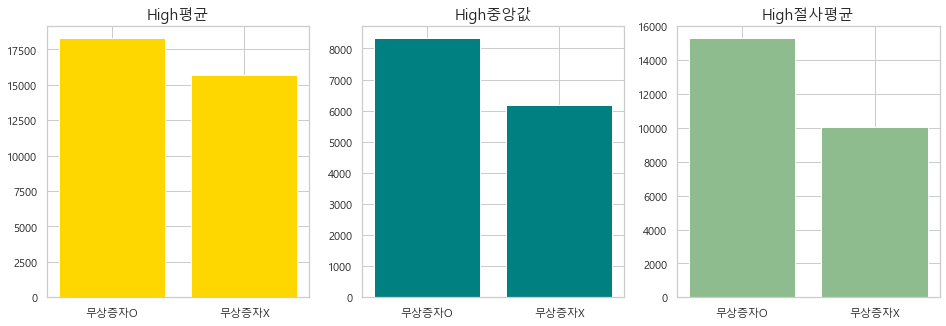

Low: p-value= 0.23235715373666158


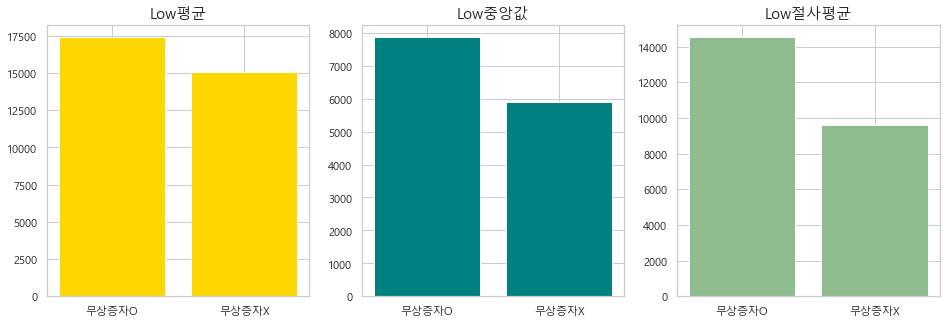

Close: p-value= 0.22100462207593133


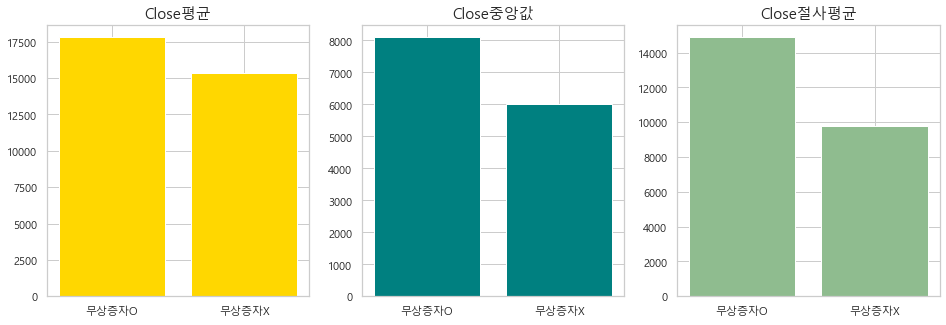

Volume: p-value= 0.6339038813688289


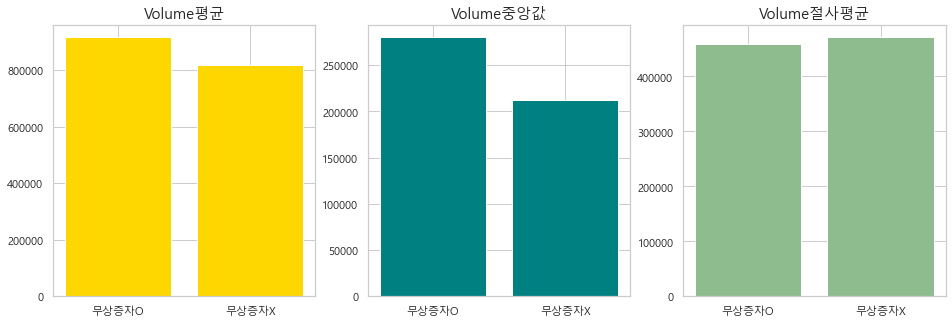

기관합계: p-value= 0.5512729653412751


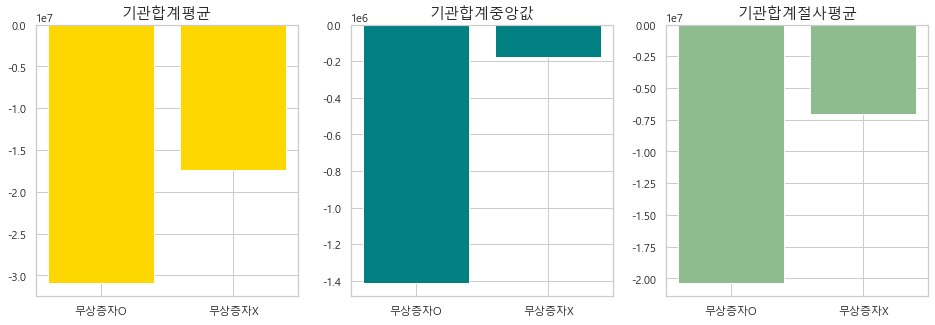

개인: p-value= 0.4976165931381251


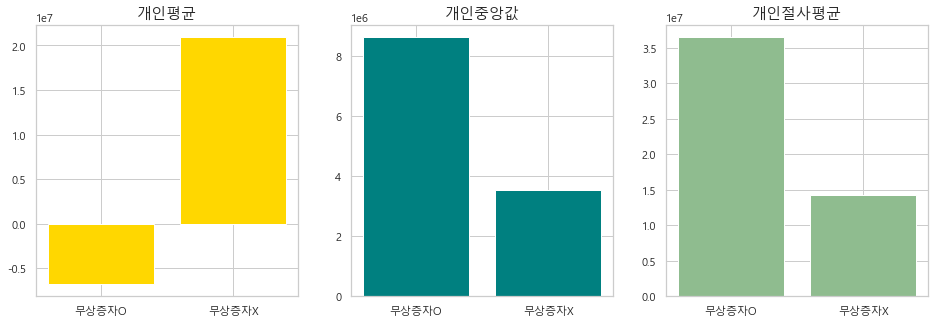

MFI: p-value= 0.11346392064542522


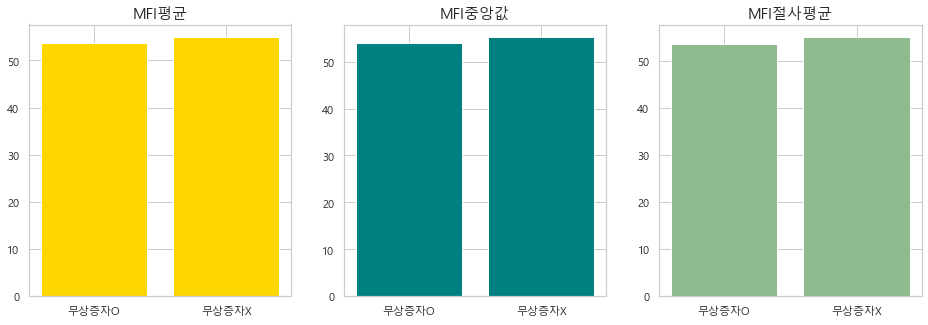

윌리엄R%: p-value= 0.03242063703674842


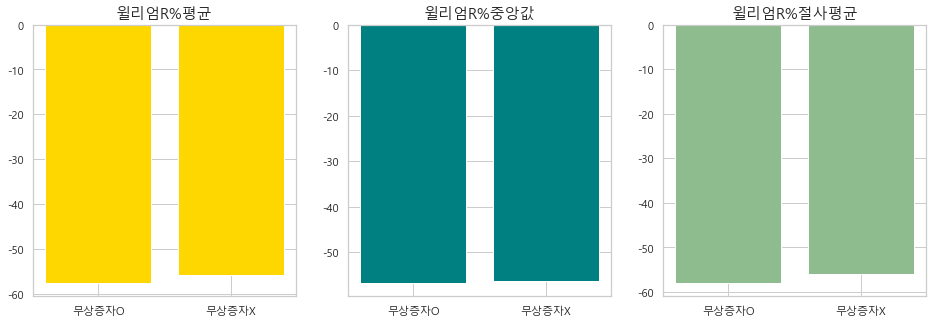

RSI: p-value= 0.04140669478645539


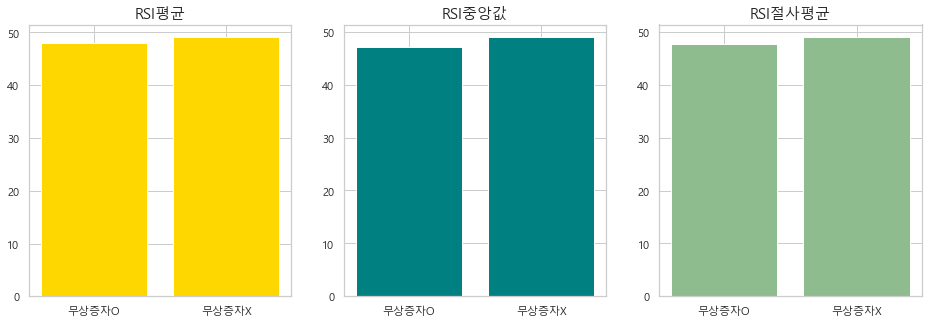

CCI: p-value= 0.014123028169774126


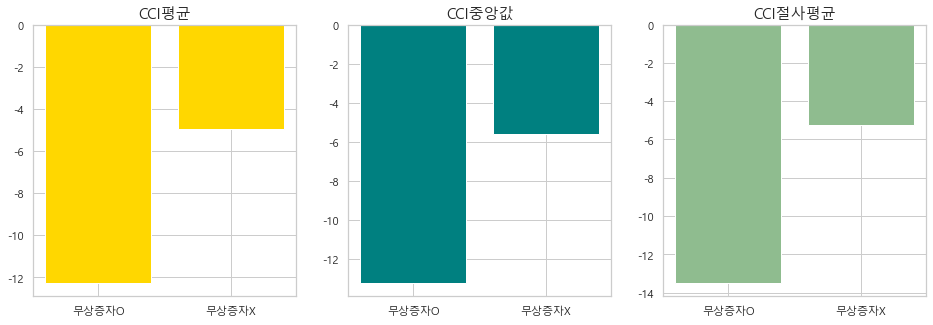

정배열: p-value= 0.7335951381910488


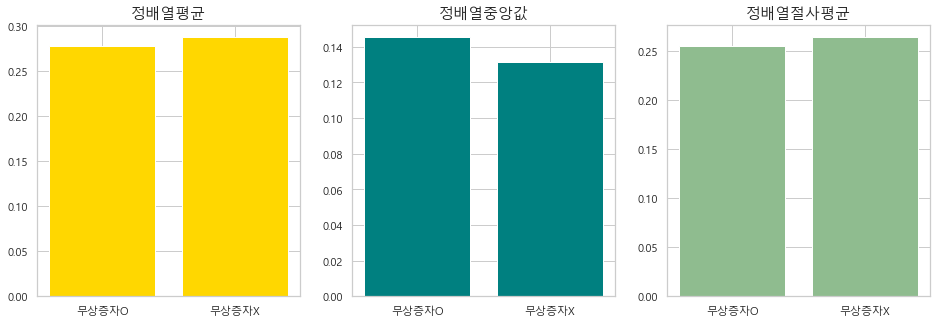

역배열: p-value= 0.042854302299801306


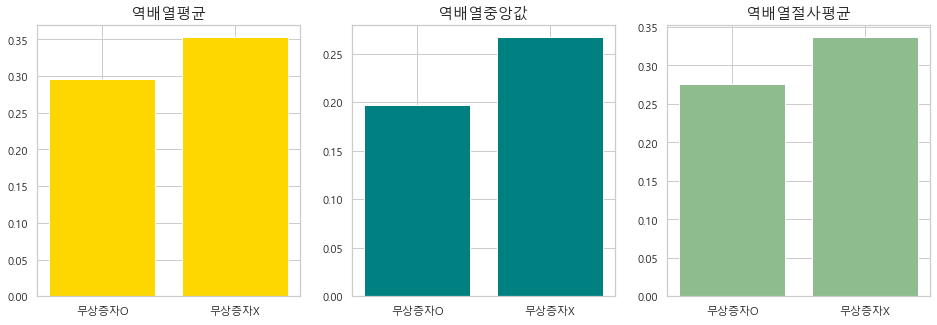

OBV: p-value= 4.7679777556876623e-11


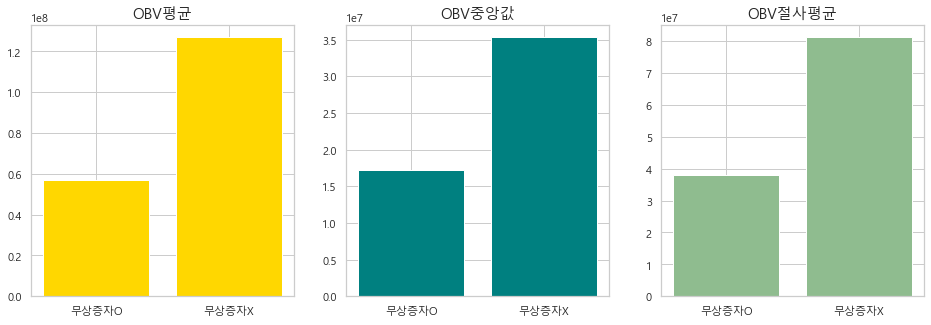

볼린저밴드위치: p-value= 0.012323393610680486


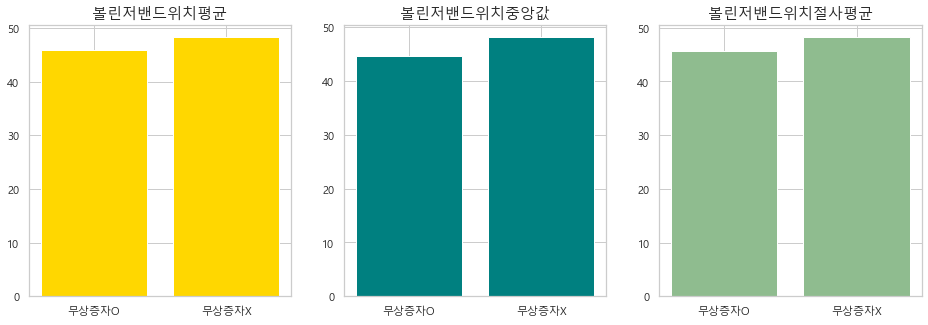

소액주주보유주식비율: p-value= 0.17325843922483058


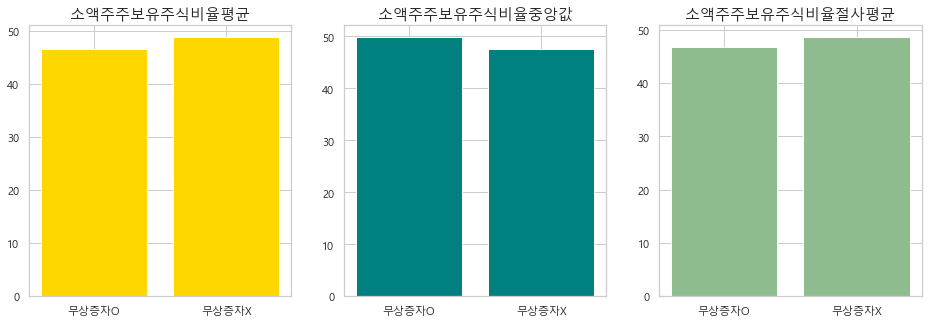

최대주주_특수관계인지분율: p-value= 0.34642345238638816


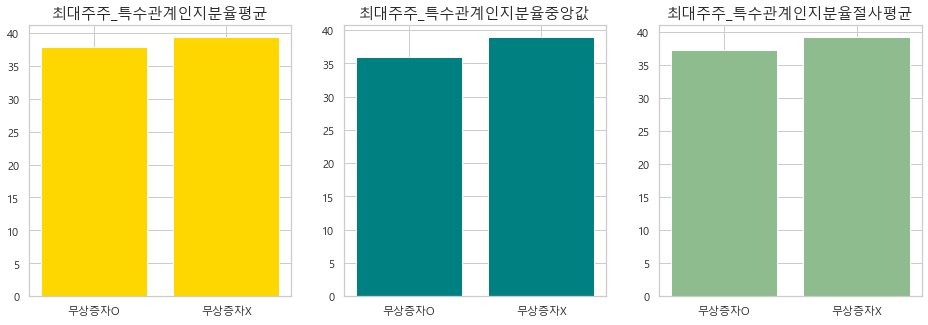

유동비율: p-value= 0.019289810318176392


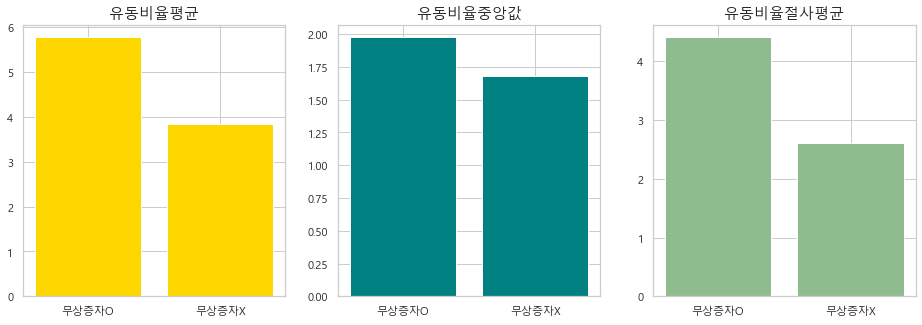

부채비율: p-value= 0.3967121783807259


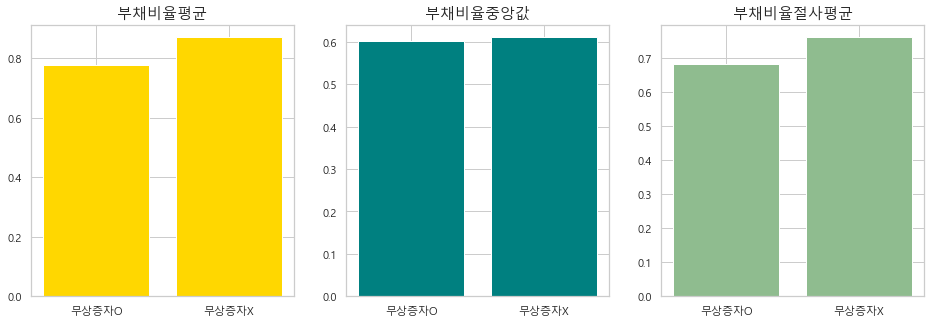

자기자본비율: p-value= 0.25525540488250426


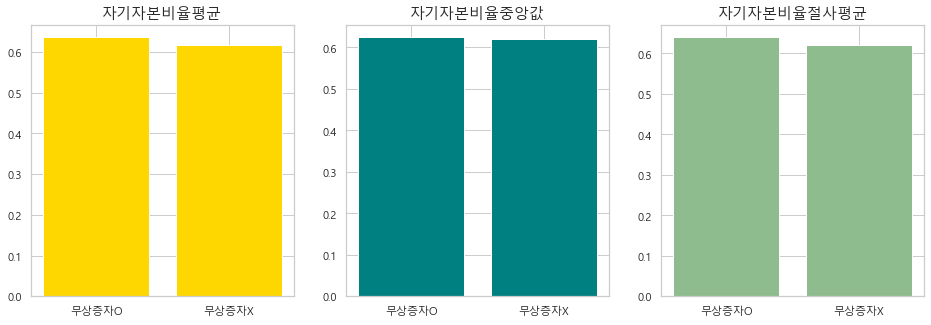

매출액증가율: p-value= 0.13906757270593456


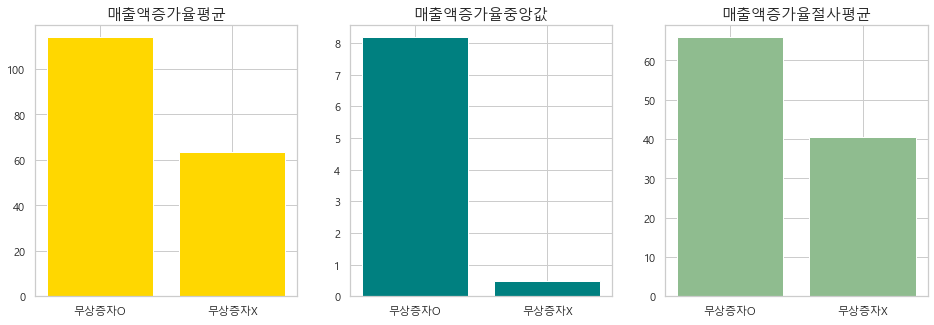

영업이익증가율: p-value= 0.3193307117939736


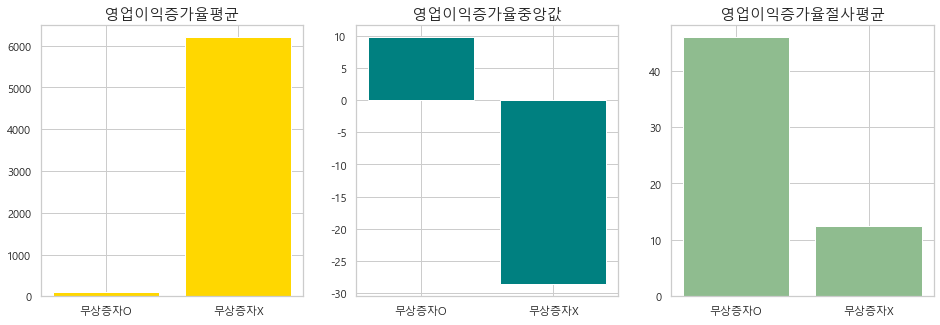

EBITDA증가율: p-value= 0.30603607683600614


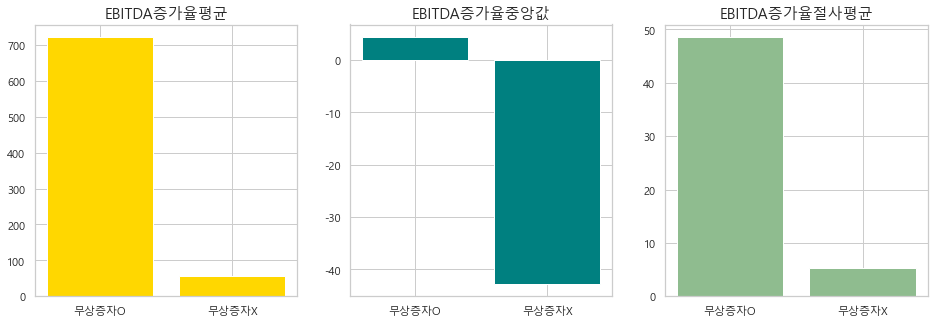

EPS증가율: p-value= 0.5864300425360343


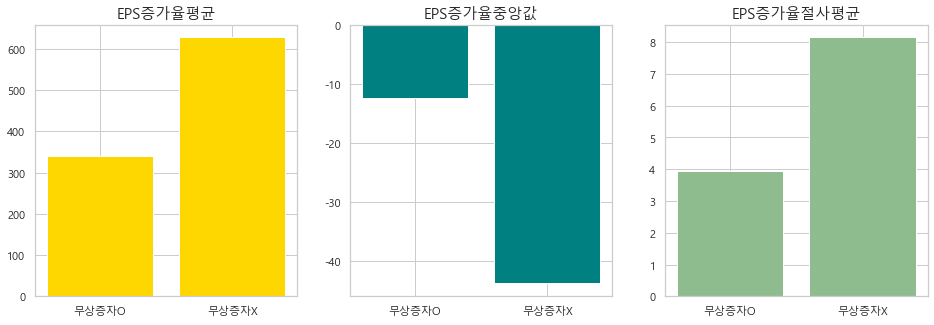

당기순이익증가율: p-value= 0.5864300425360343


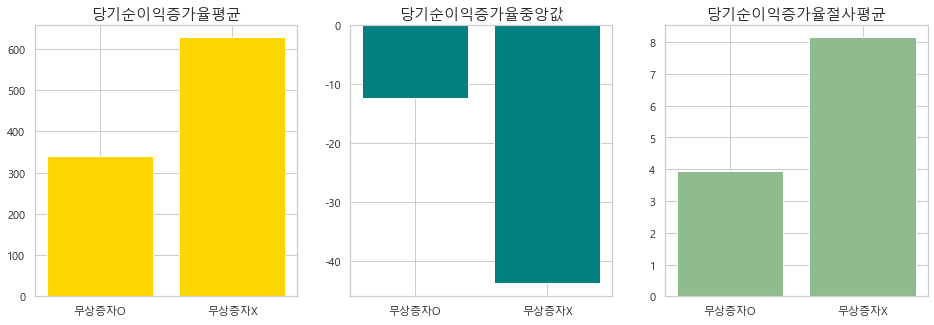

흑자전환: p-value= 0.7940007155126124


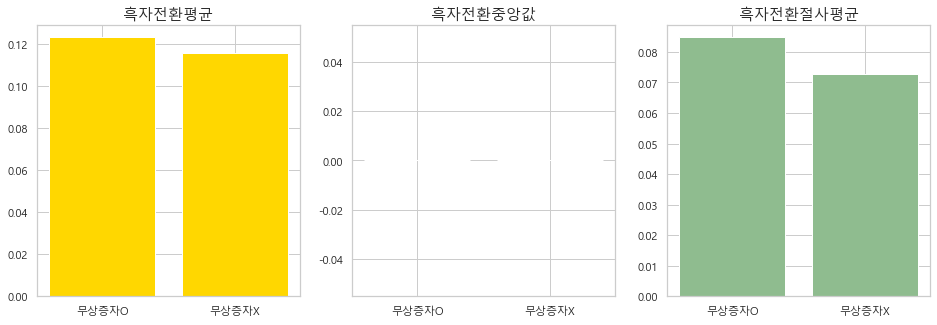

자산성장율: p-value= 5.526339952494845e-05


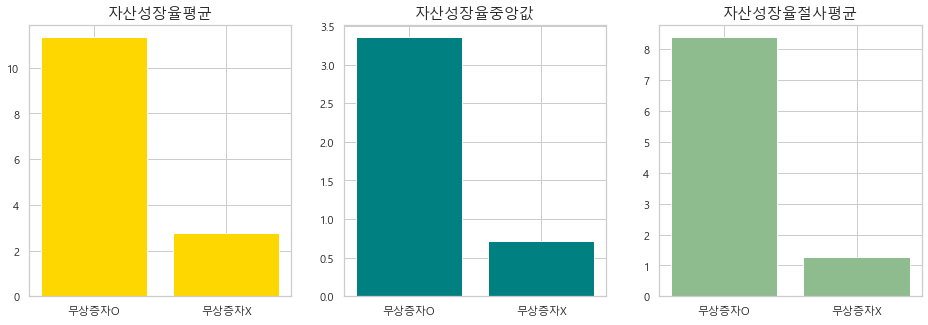

자본성장율: p-value= 0.033948759687005205


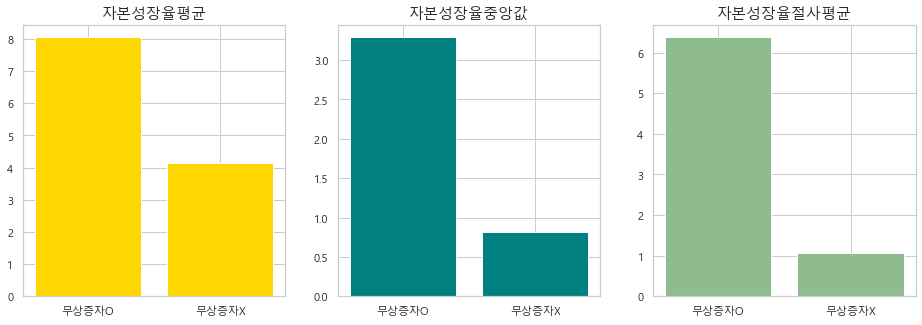

부채비율성장율: p-value= 0.23303647065531466


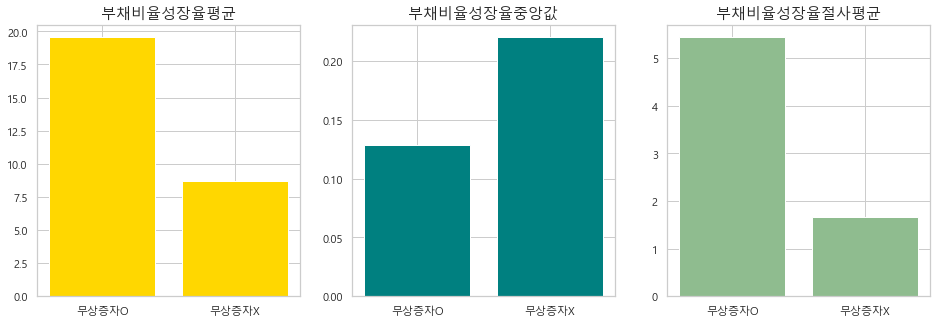

유동비율성장율: p-value= 0.0008951306647344075


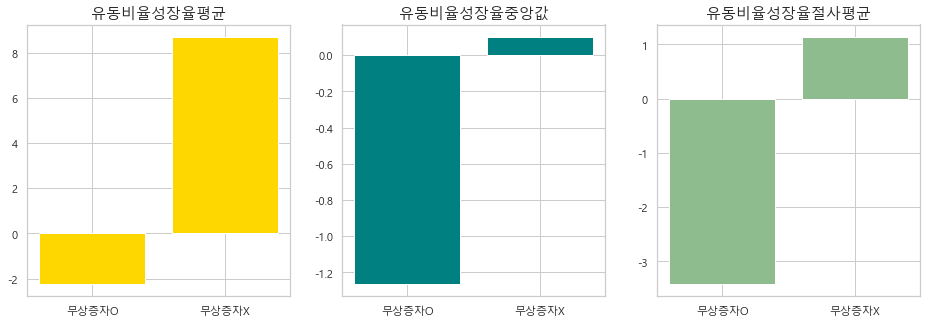

자산회전율: p-value= 0.3909174968282818


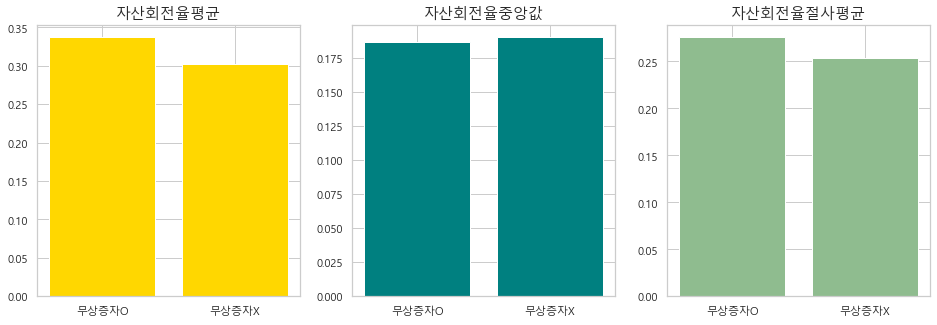

자산회전율성장율: p-value= 0.3749112795868964


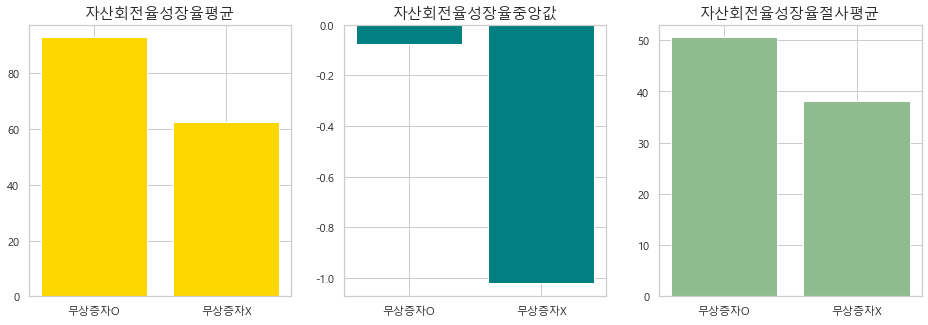

부채회전율: p-value= 0.15998951481789767


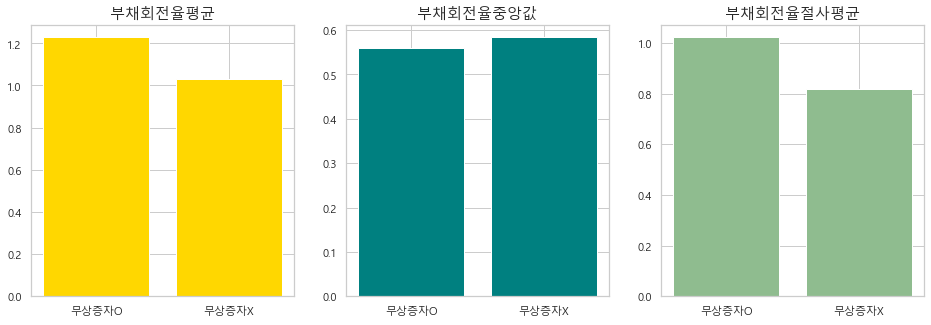

자본회전율: p-value= 0.7134076151897762


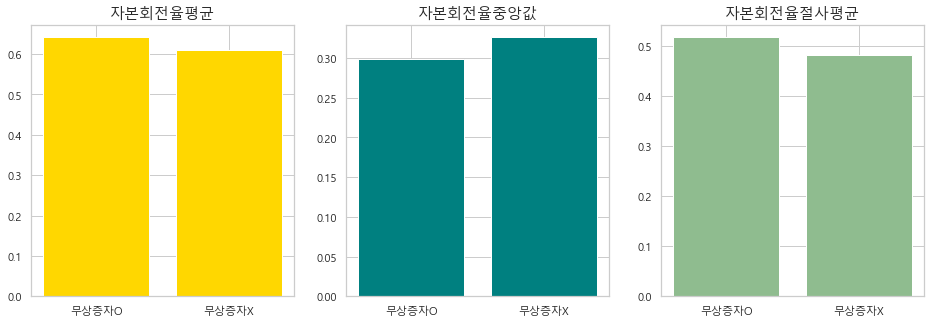

영업이익율: p-value= 0.4919176099963909


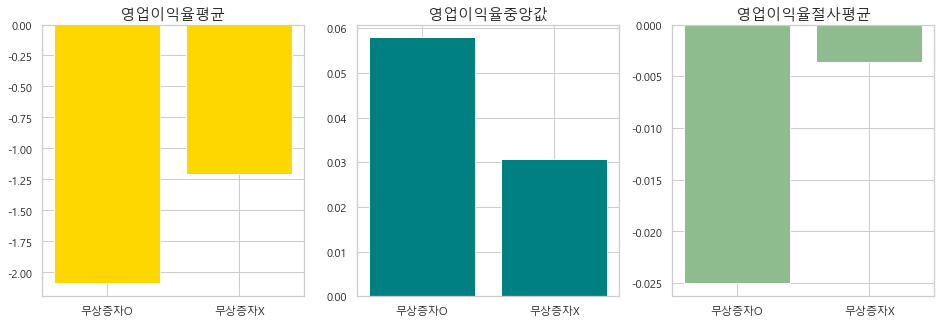

EBITDA마진율: p-value= 0.4056863163445046


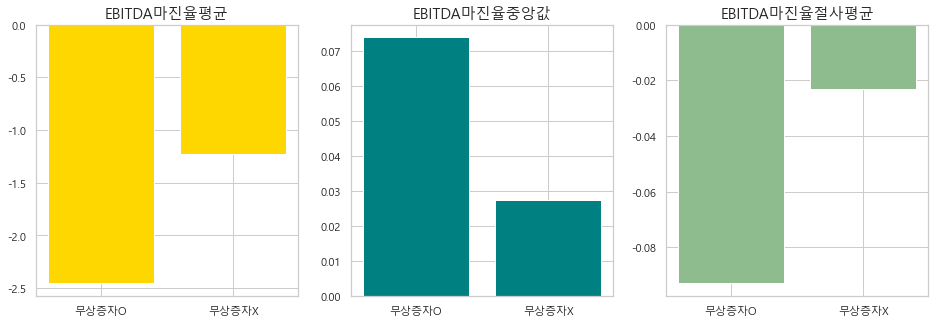

ROA: p-value= 0.002276162921522961


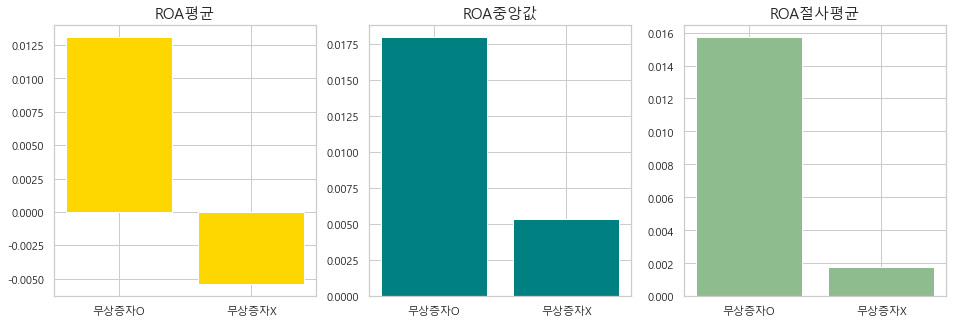

ROE: p-value= 0.017234104483083316


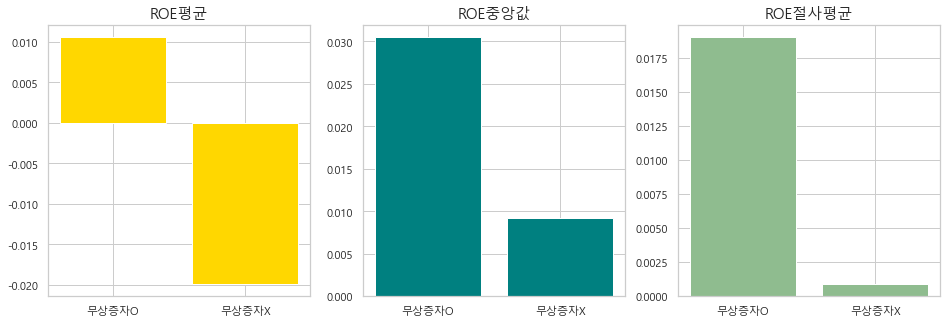

OP/A: p-value= 0.004624857998239744


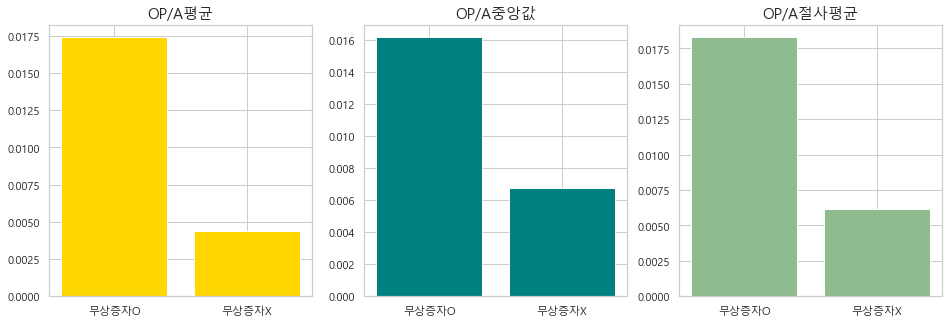

PER: p-value= 0.47021684141221654


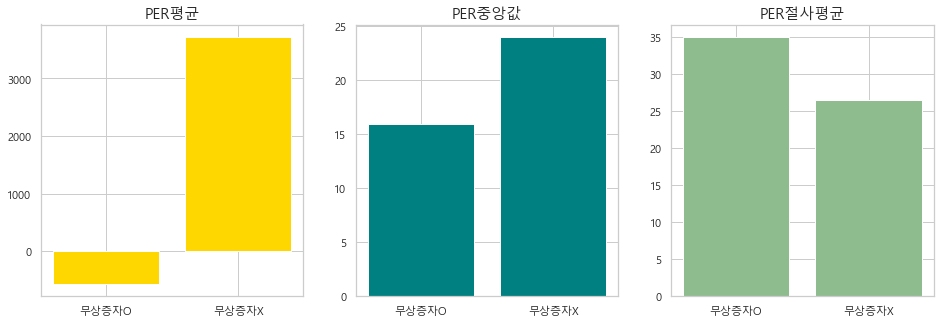

PSR: p-value= 0.42838364535289564


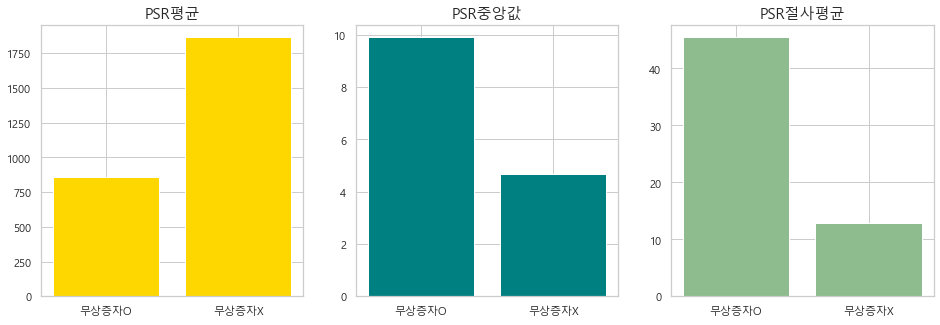

PBR: p-value= 0.0645155553794721


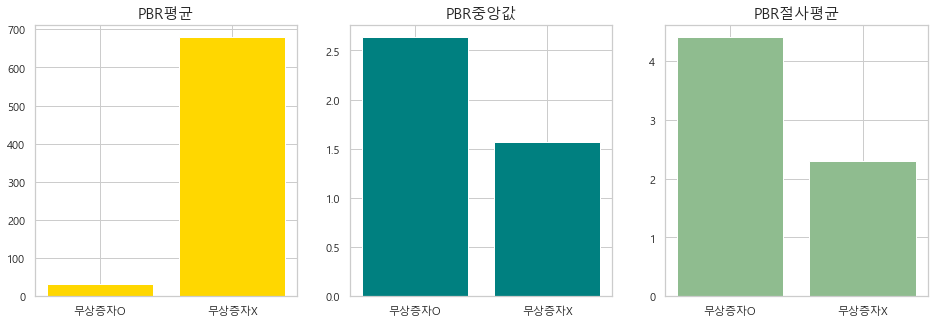

EV/EBITDA: p-value= 0.8269177506593594


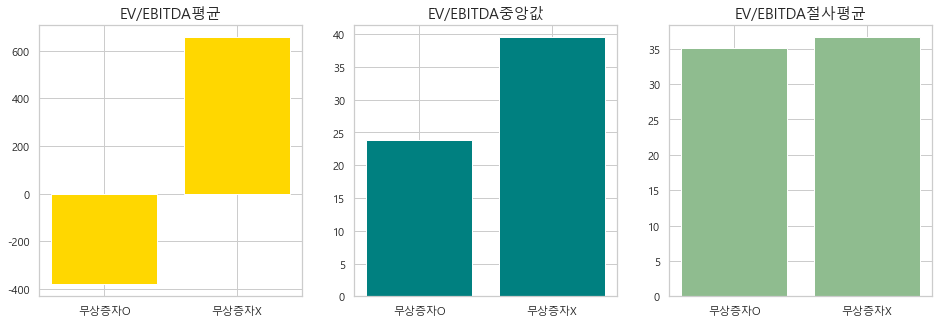

자기주식비율: p-value= 0.8374924158411454


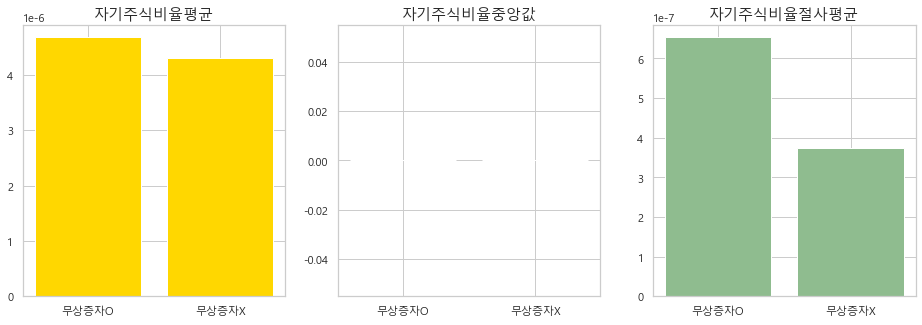

베타: p-value= 0.0003136419960897652


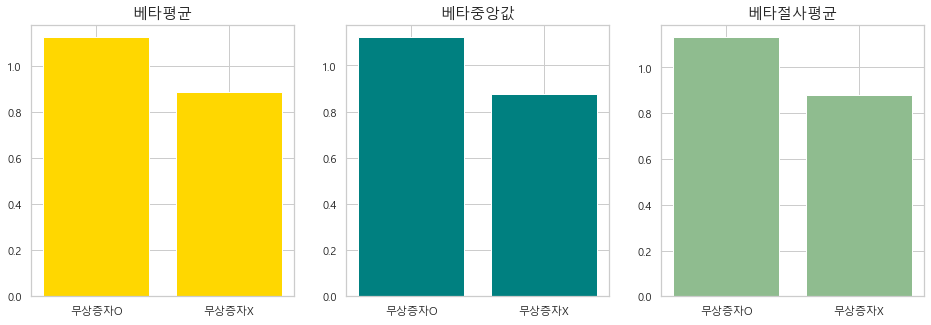

거래회전율: p-value= 0.1819240185115398


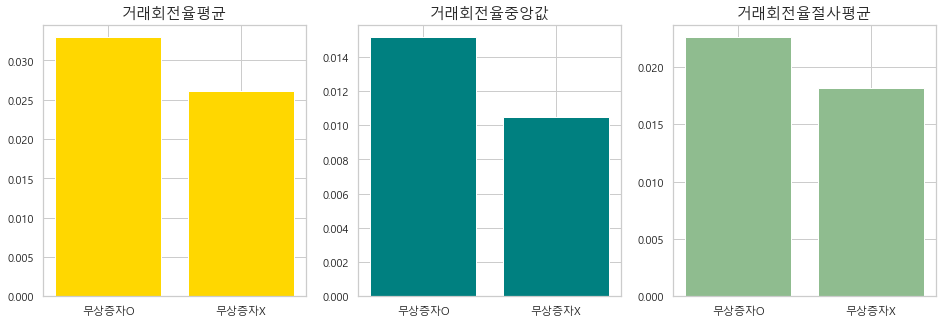

기업규모(log): p-value= 0.39272638227774326


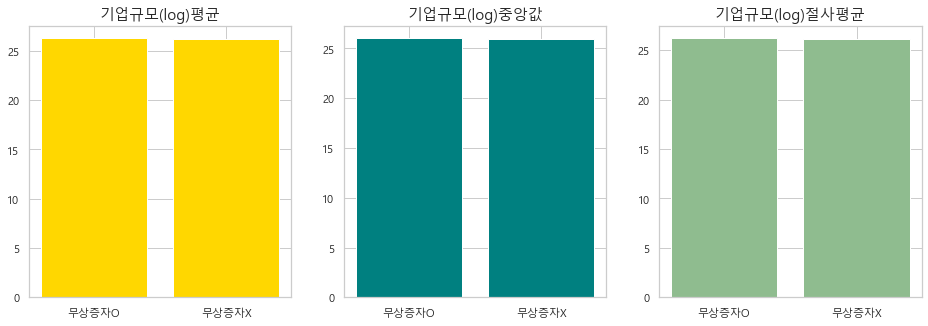

무상증자여부: p-value= 0.0


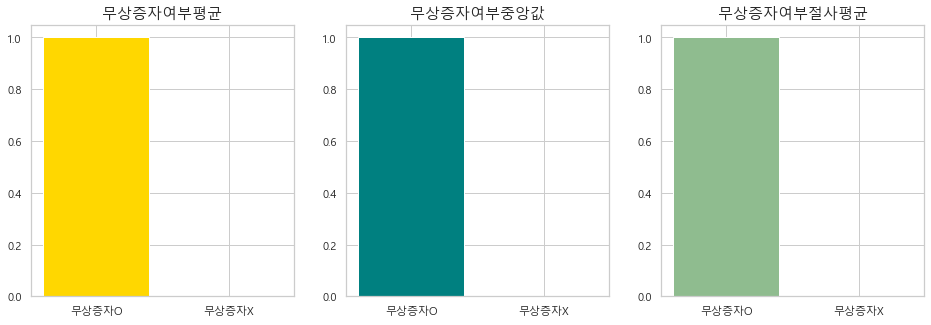

In [22]:
for compare_column in compare_columns:
    compare(compare_column)

In [27]:
5.526339952494845e-05

5.526339e-05

In [ ]:
0.000055

### t-test

In [17]:
ts = data.drop(['회사명', 'code', 'Date', '흑자전환', '무상증자여부', 'Market', 'Sector', 'Industry', '증자비율'], axis = 1)
p_values = []
for t in ts:
    print(t,":", sp.stats.ttest_ind(isBonusissue[t], noBonusissue[t], equal_var = False).pvalue)
    if (sp.stats.ttest_ind(isBonusissue[t], noBonusissue[t], equal_var = False).pvalue < 0.05):
        p_values.append(t)

High : 0.20501720869827353
Low : 0.23235715373666158
Close : 0.22100462207593133
Volume : 0.6339038813688289
기관합계 : 0.5512729653412751
개인 : 0.4976165931381251
MFI : 0.11346392064542522
윌리엄R% : 0.03242063703674842
RSI : 0.04140669478645539
CCI : 0.014123028169774126
정배열 : 0.7335951381910488
역배열 : 0.042854302299801306
OBV : 4.7679777556876623e-11
볼린저밴드위치 : 0.012323393610680486
소액주주보유주식비율 : 0.17325843922483058
최대주주_특수관계인지분율 : 0.34642345238638816
유동비율 : 0.019289810318176392
부채비율 : 0.3967121783807259
자기자본비율 : 0.25525540488250426
매출액증가율 : 0.13906757270593456
영업이익증가율 : 0.3193307117939736
EBITDA증가율 : 0.30603607683600614
EPS증가율 : 0.5864300425360343
당기순이익증가율 : 0.5864300425360343
자산성장율 : 5.526339952494845e-05
자본성장율 : 0.033948759687005205
부채비율성장율 : 0.23303647065531466
유동비율성장율 : 0.0008951306647344075
자산회전율 : 0.3909174968282818
자산회전율성장율 : 0.3749112795868964
부채회전율 : 0.15998951481789767
자본회전율 : 0.7134076151897762
영업이익율 : 0.4919176099963909
EBITDA마진율 : 0.4056863163445046
ROA : 0.002276162921522961
ROE 

In [18]:
print('p값을 만족하는 변수 :', p_values)
print('P값을 만족하는 변수의 수 :', len(p_values))

p값을 만족하는 변수 : ['윌리엄R%', 'RSI', 'CCI', '역배열', 'OBV', '볼린저밴드위치', '유동비율', '자산성장율', '자본성장율', '유동비율성장율', 'ROA', 'ROE', 'OP/A', '베타']
P값을 만족하는 변수의 수 : 14


### 이상치 확인

In [19]:
def outlier(column):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,10))

    axes[0].boxplot(isBonusissue[column])
    axes[0].set_title((column + '무상증자O'), size = 15)

    axes[1].boxplot(noBonusissue[column])
    axes[1].set_title((column + '무상증자X'), size = 15)
    plt.show()

#### 전체 변수

In [20]:
outlier_columns = data.drop(['회사명', 'code', 'Date', 'Market', 'Sector', 'Industry', '증자비율', '무상증자여부'], axis = 1).columns
outlier_columns

Index(['High', 'Low', 'Close', 'Volume', '기관합계', '개인', 'MFI', '윌리엄R%', 'RSI',
       'CCI', '정배열', '역배열', 'OBV', '볼린저밴드위치', '소액주주보유주식비율', '최대주주_특수관계인지분율',
       '유동비율', '부채비율', '자기자본비율', '매출액증가율', '영업이익증가율', 'EBITDA증가율', 'EPS증가율',
       '당기순이익증가율', '흑자전환', '자산성장율', '자본성장율', '부채비율성장율', '유동비율성장율', '자산회전율',
       '자산회전율성장율', '부채회전율', '자본회전율', '영업이익율', 'EBITDA마진율', 'ROA', 'ROE',
       'OP/A', 'PER', 'PSR', 'PBR', 'EV/EBITDA', '자기주식비율', '베타', '거래회전율',
       '기업규모(log)'],
      dtype='object')

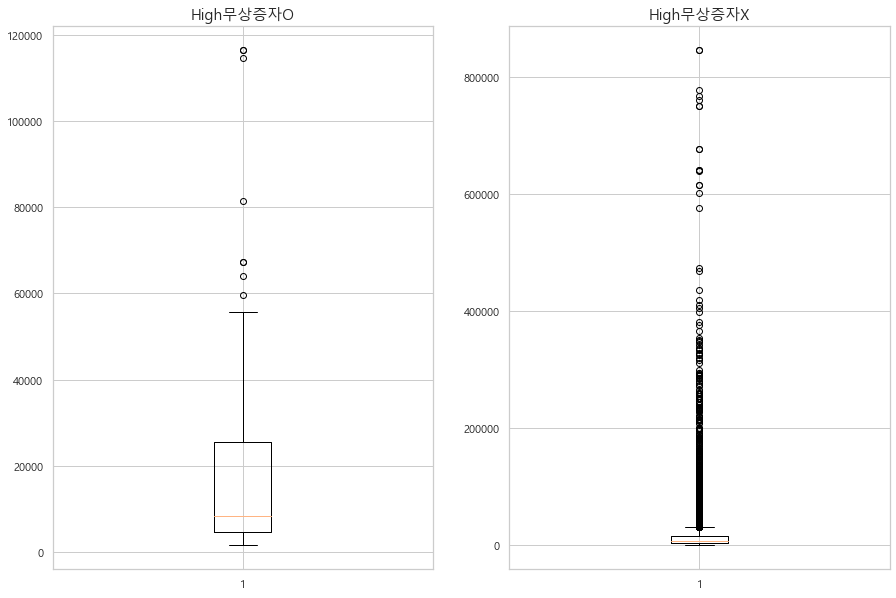

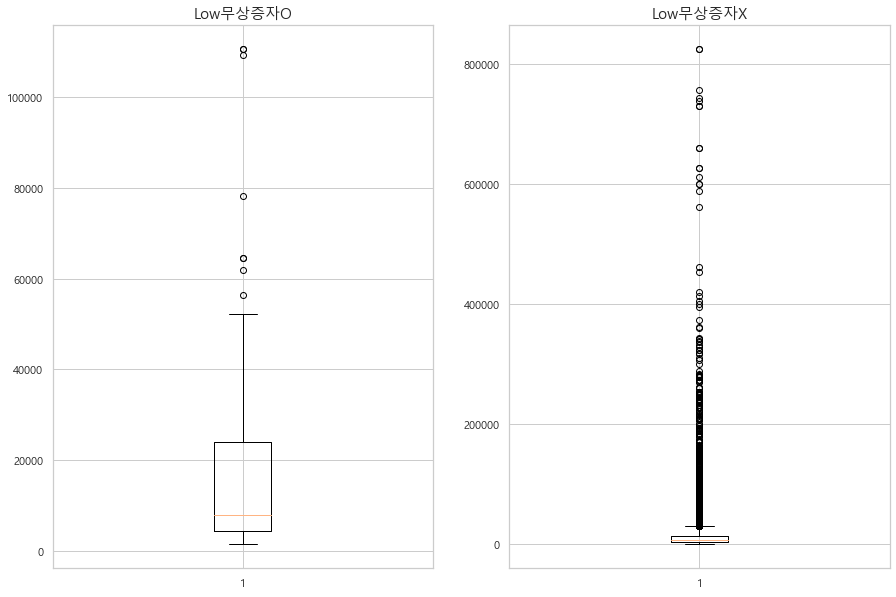

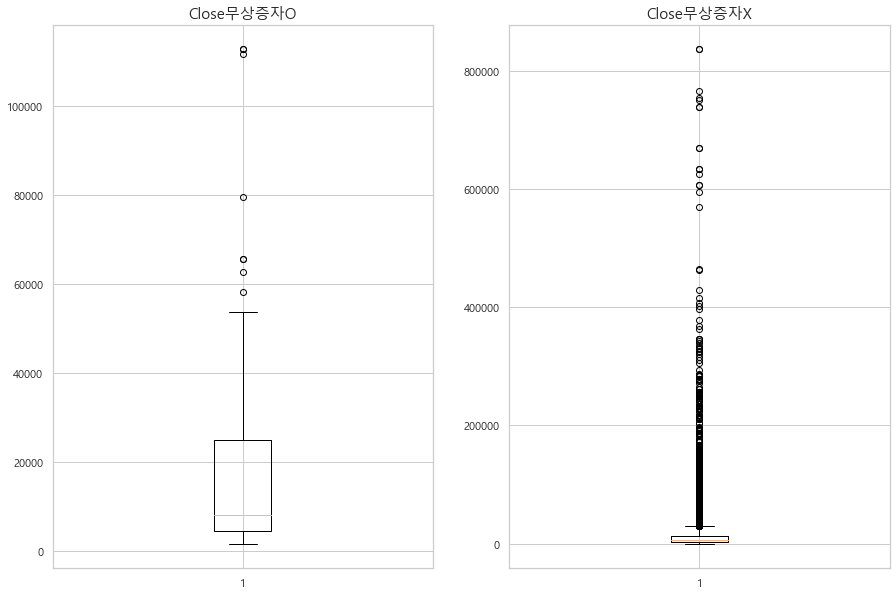

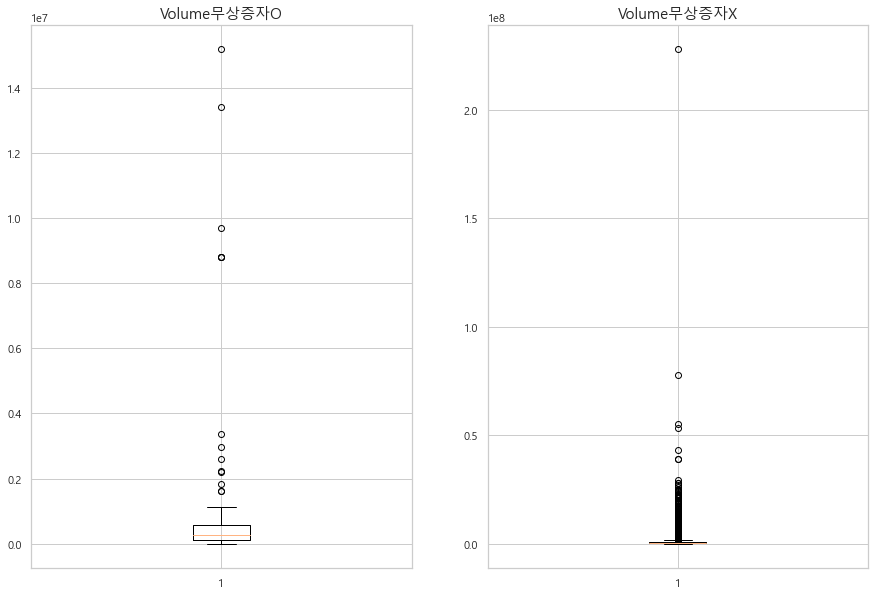

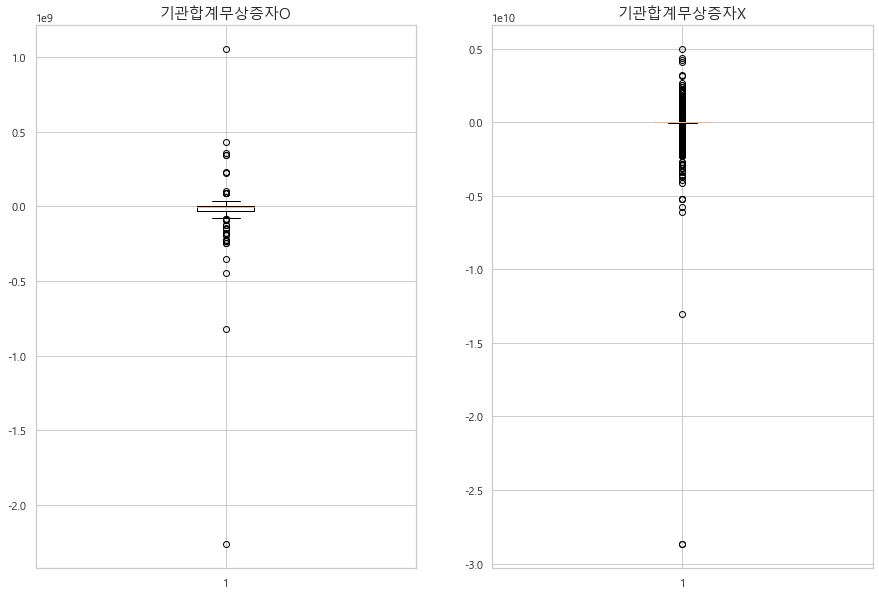

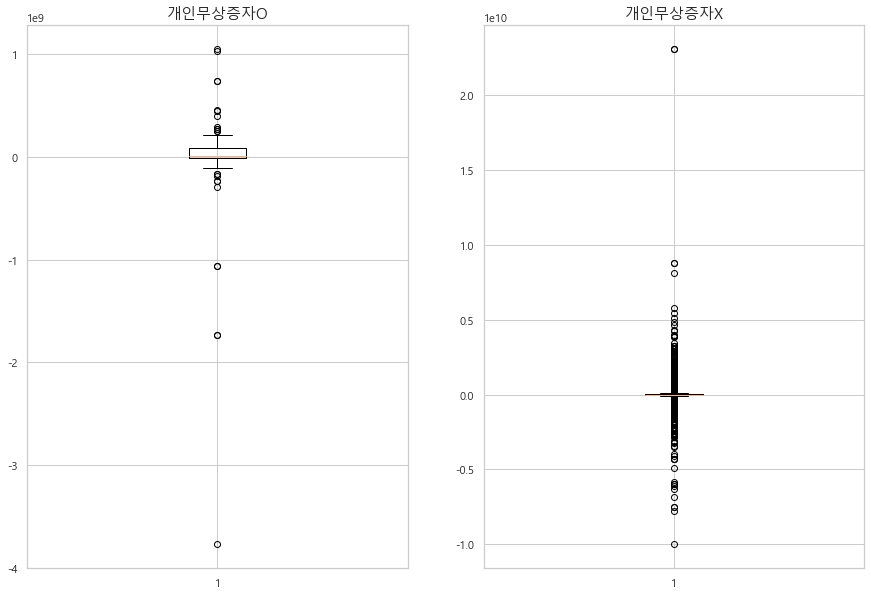

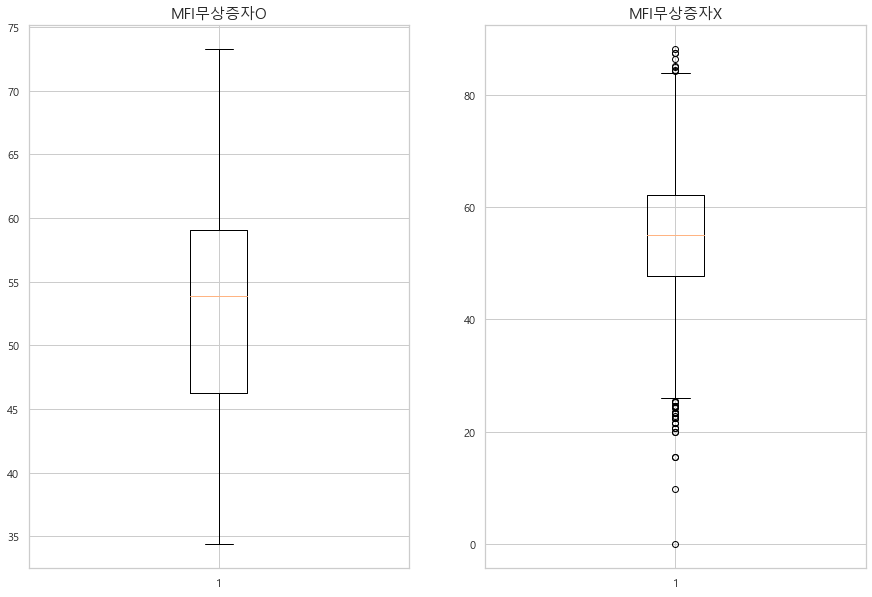

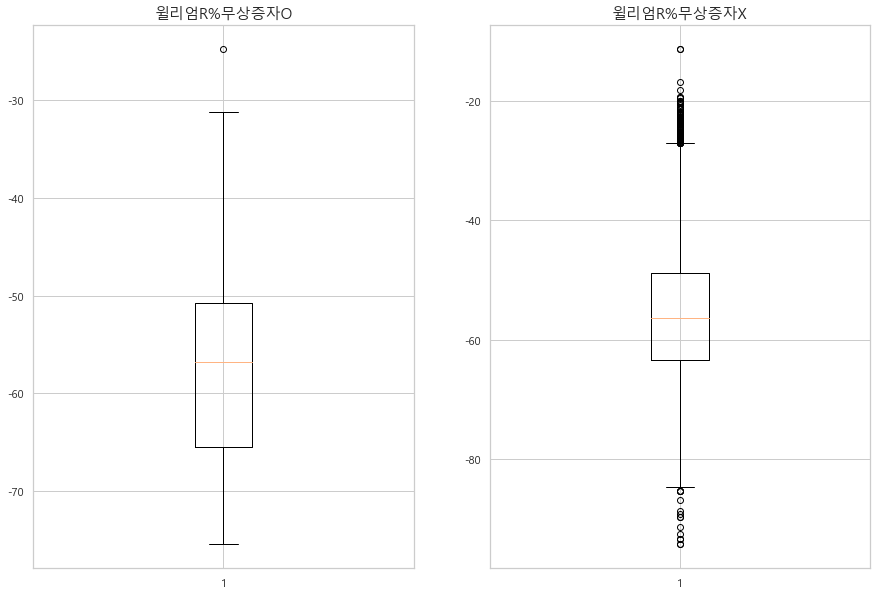

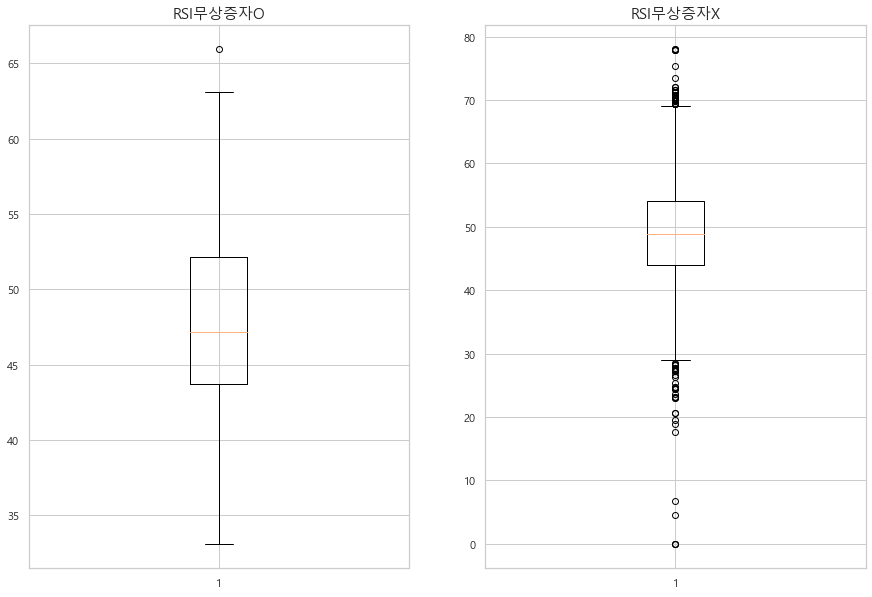

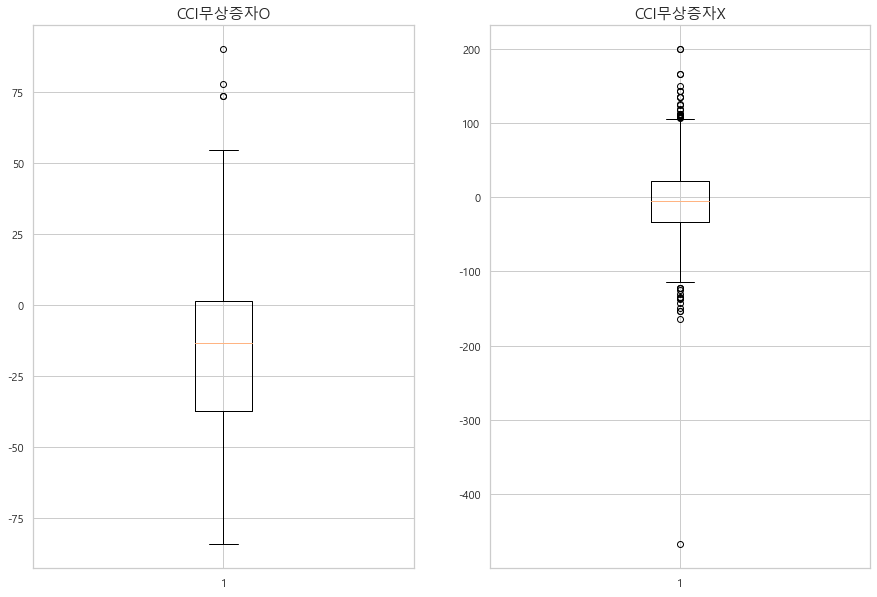

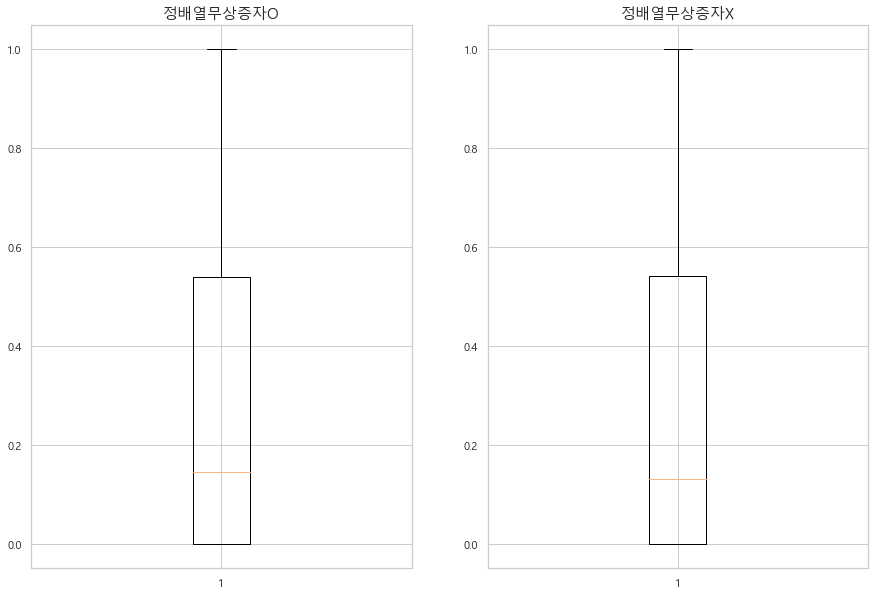

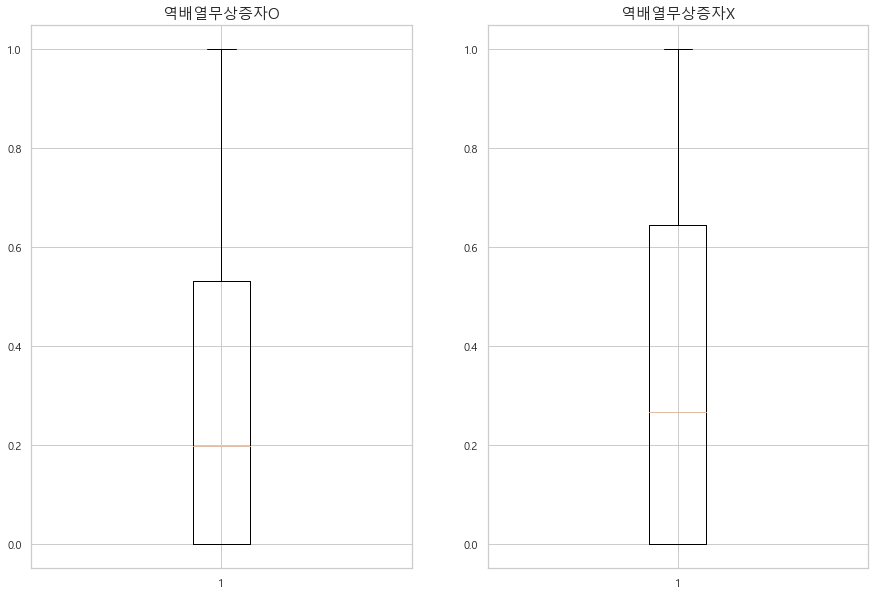

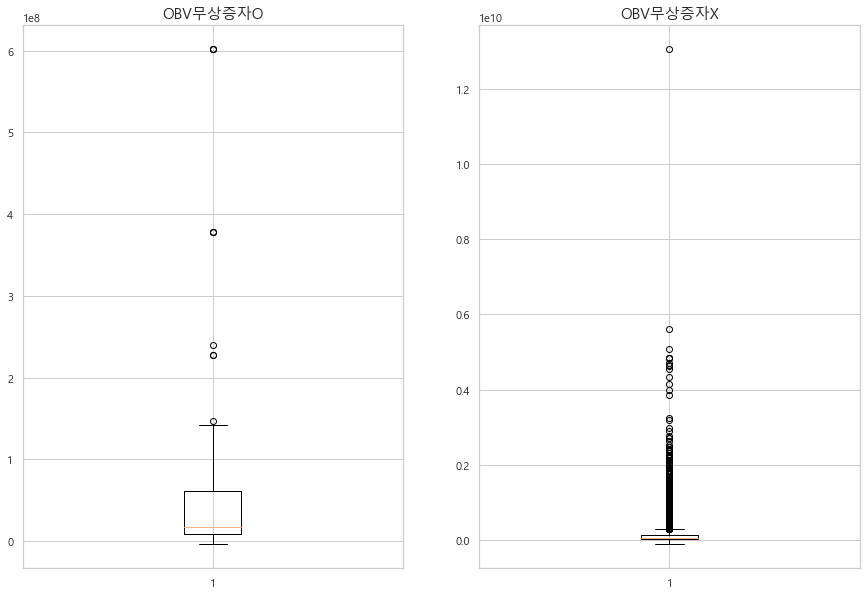

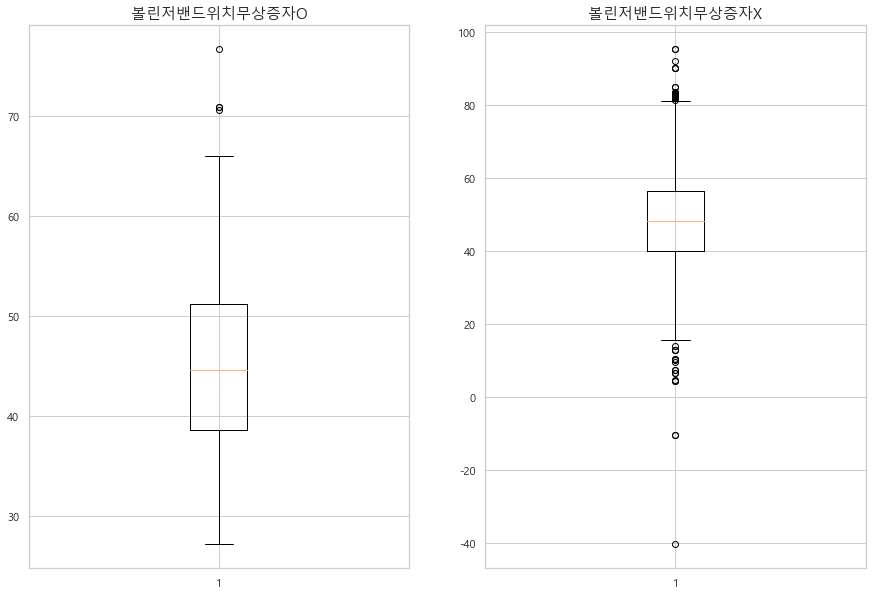

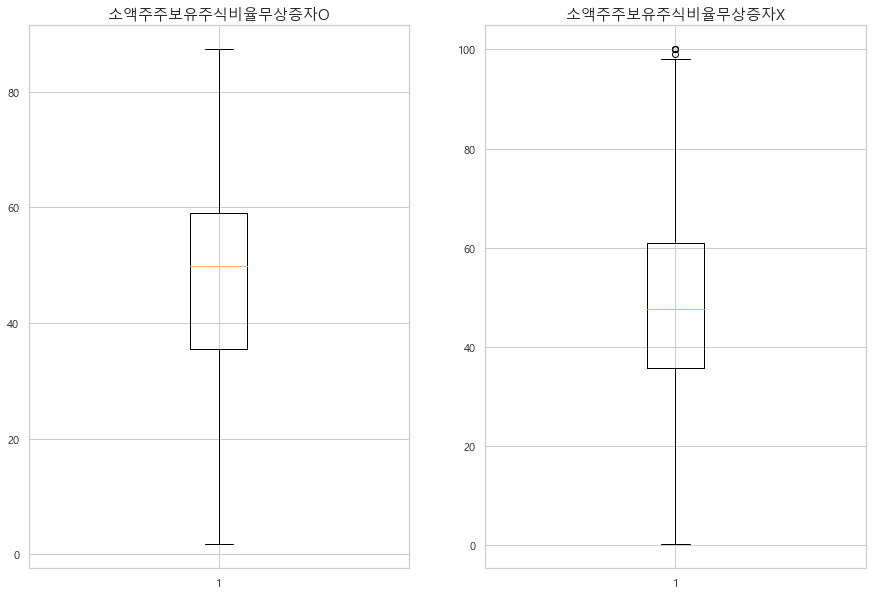

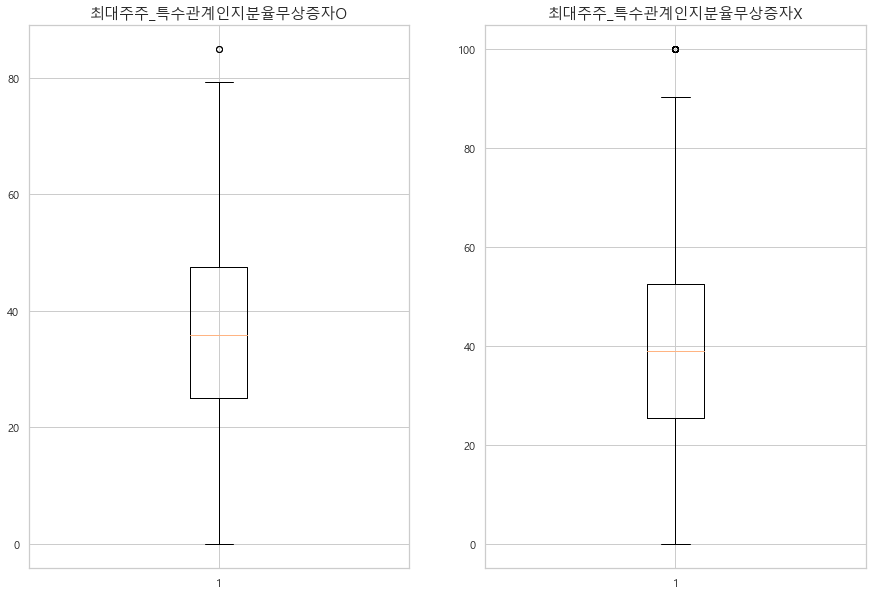

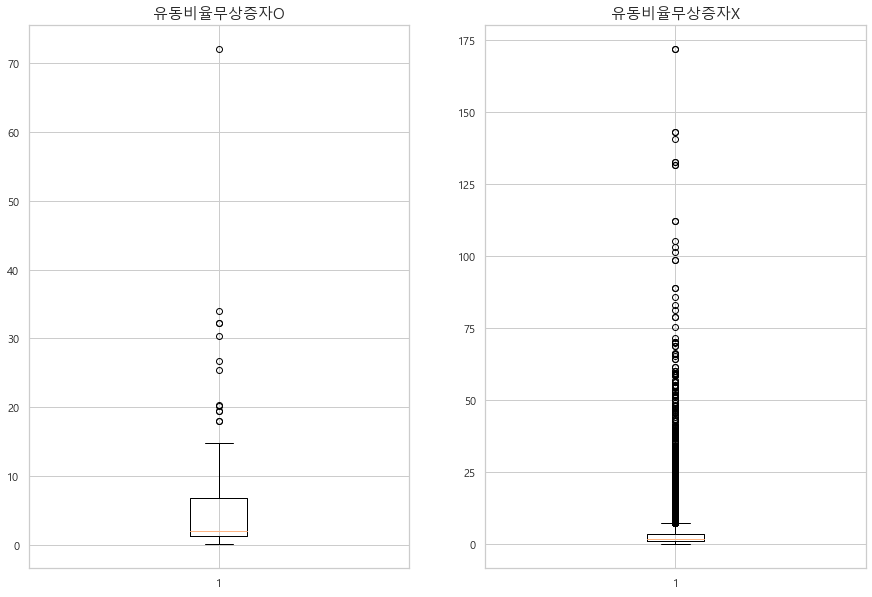

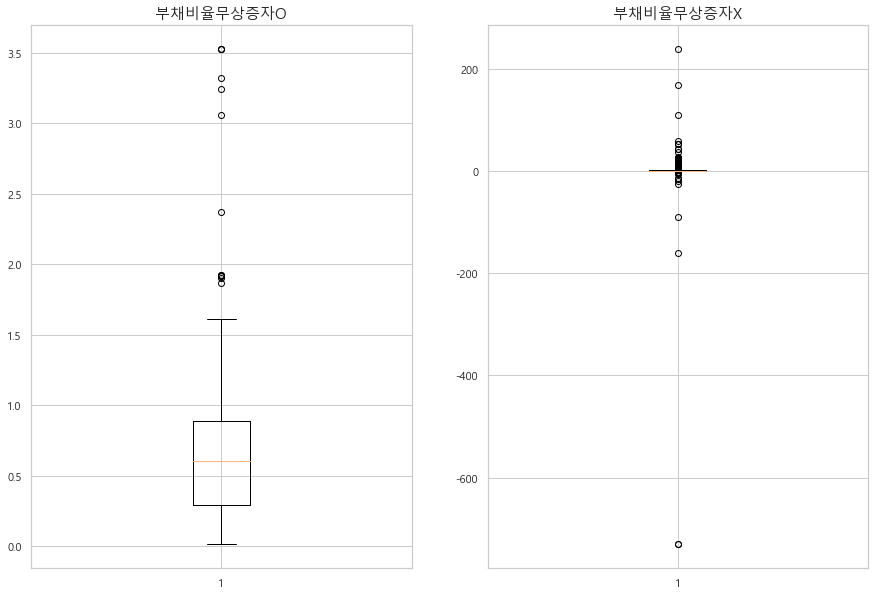

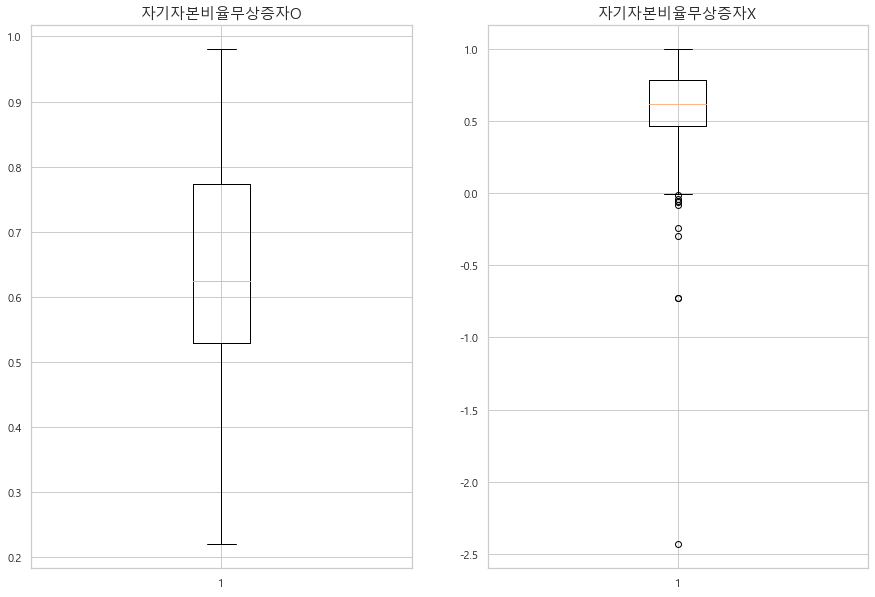

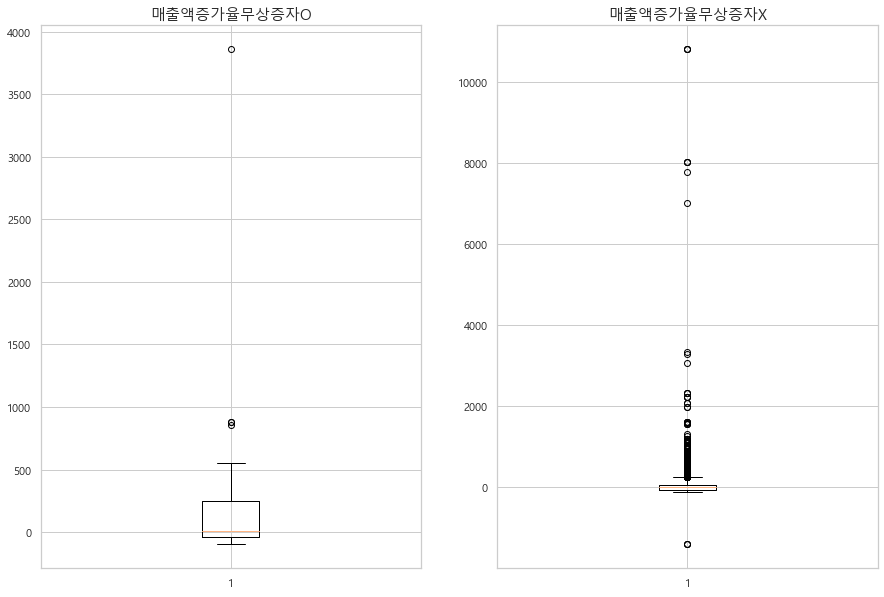

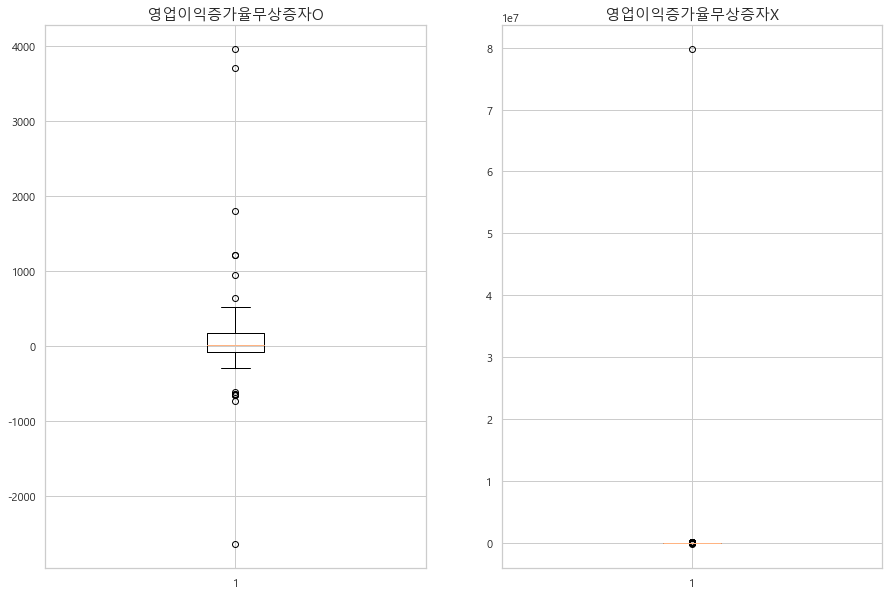

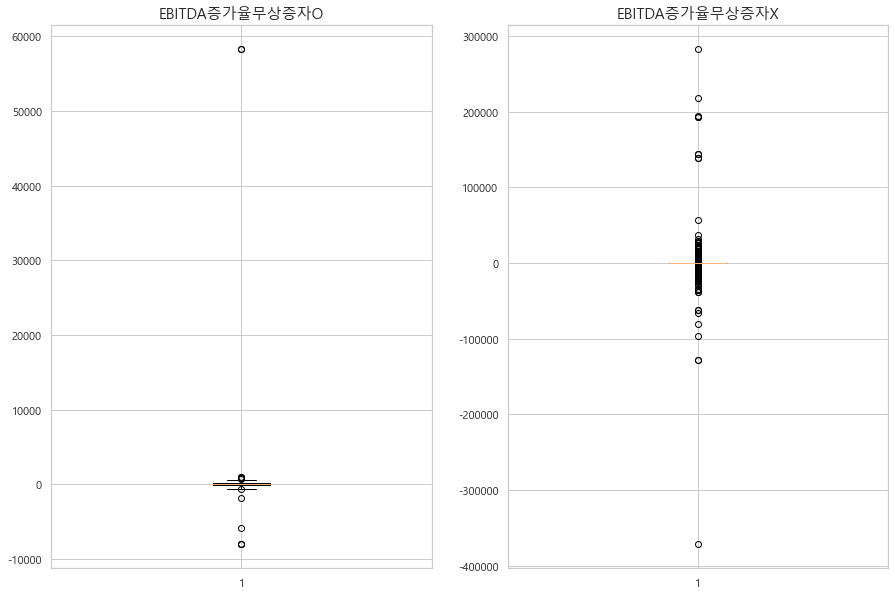

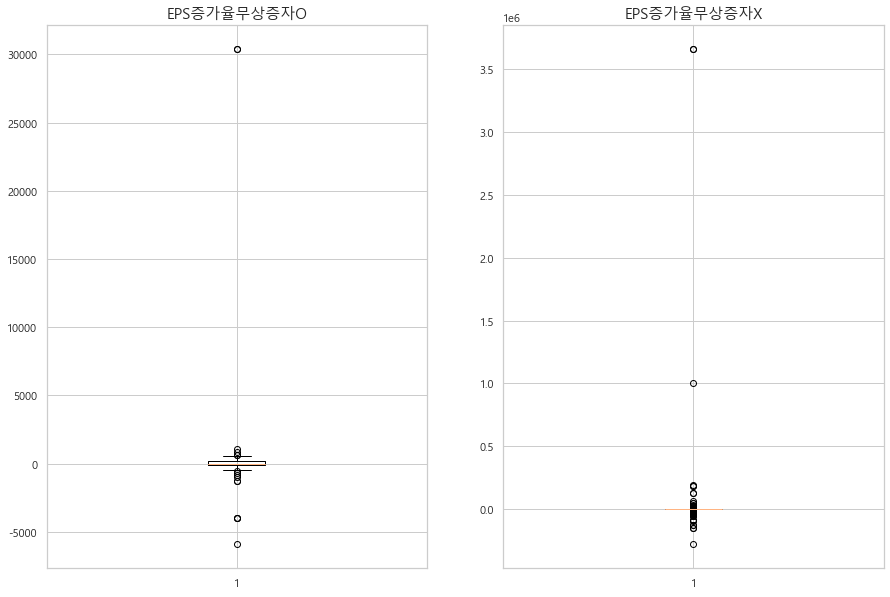

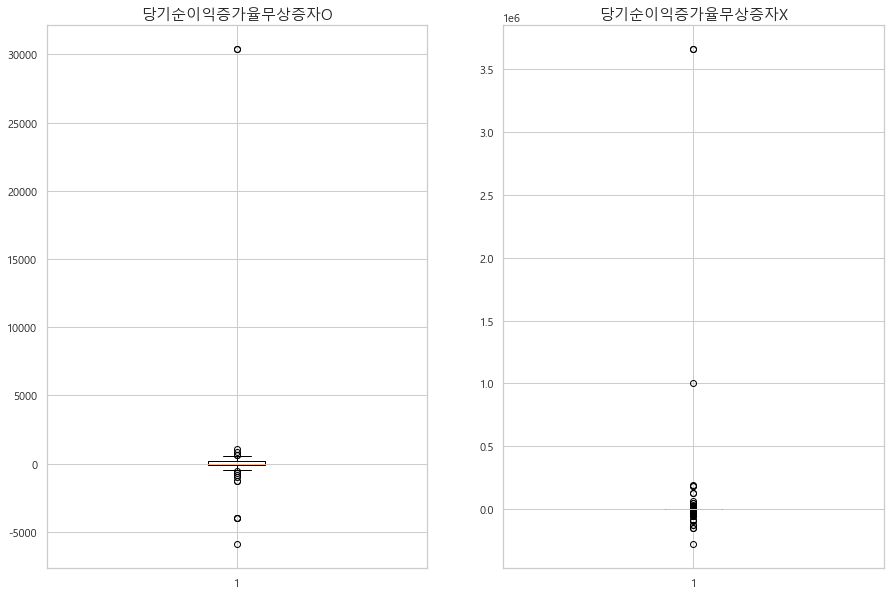

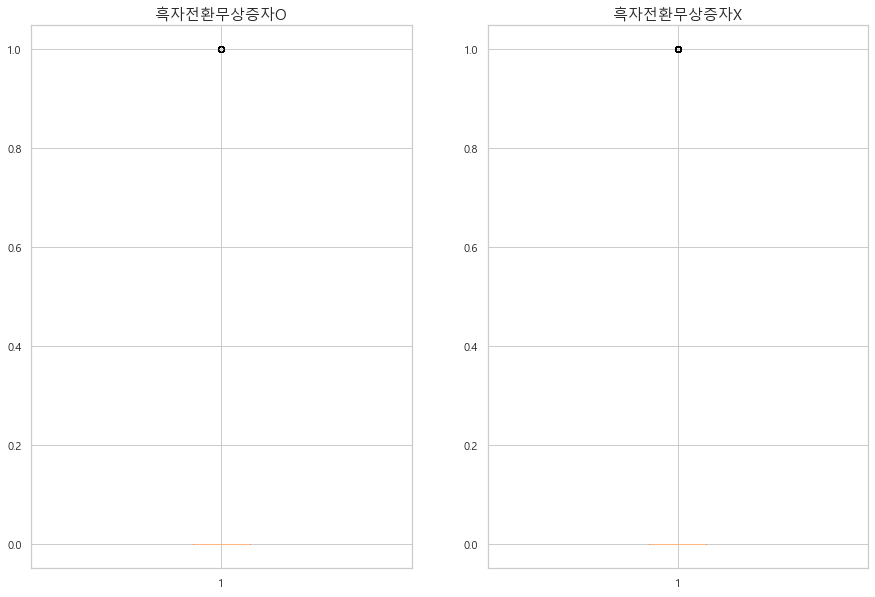

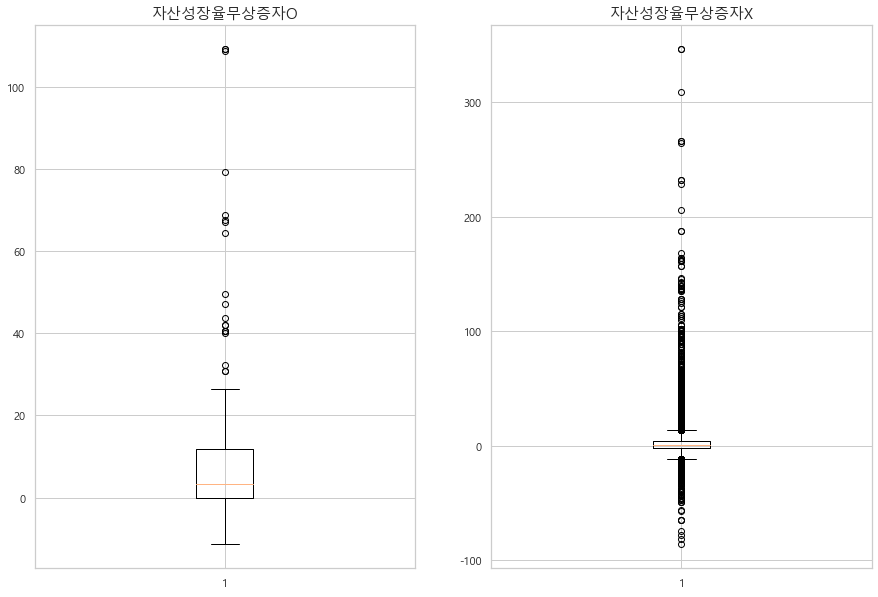

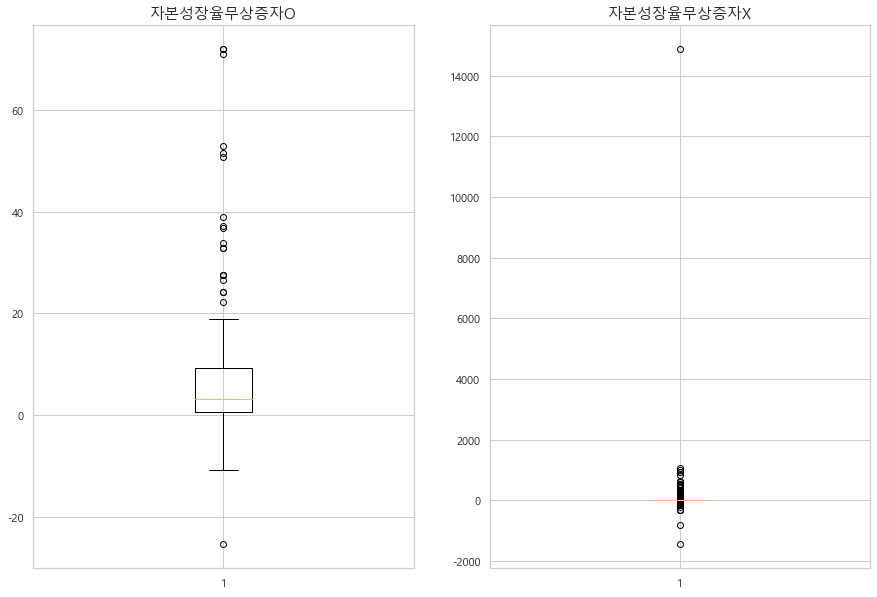

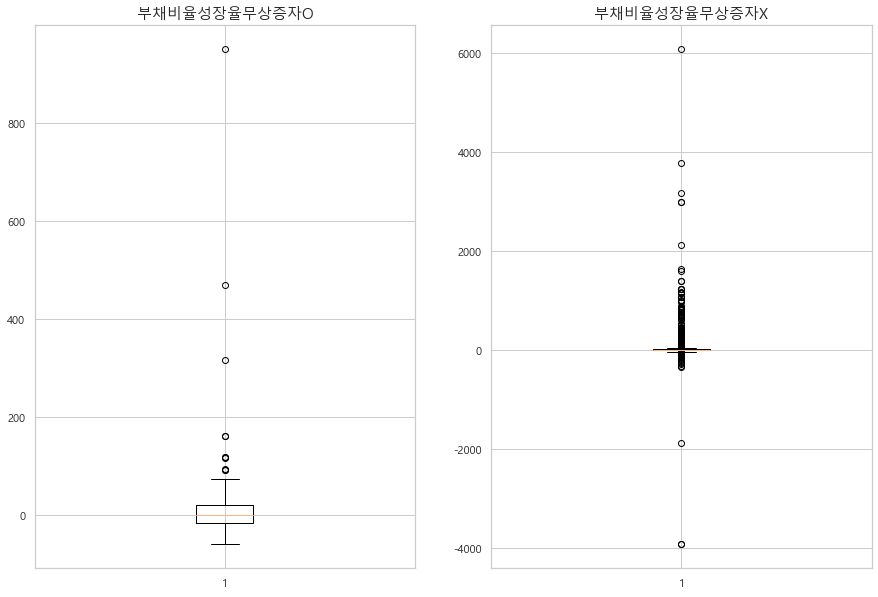

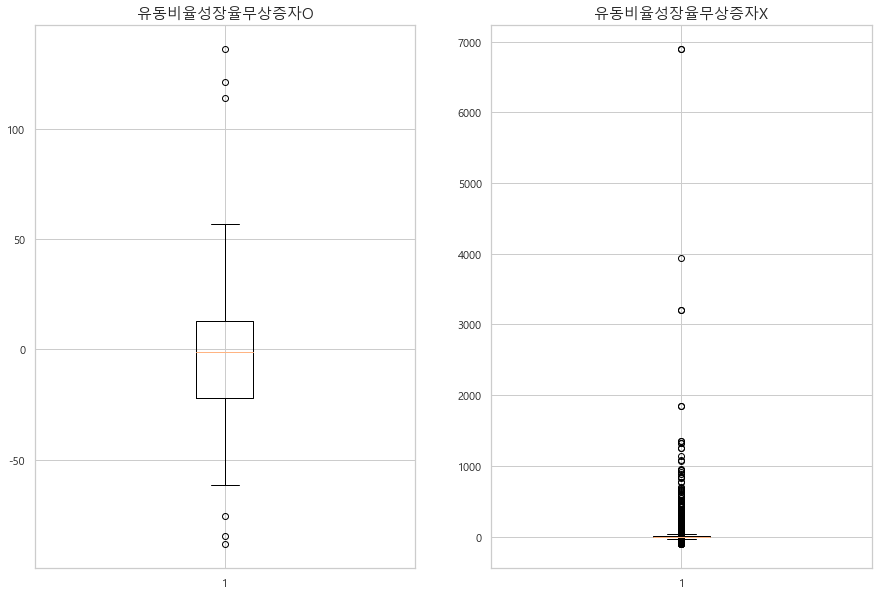

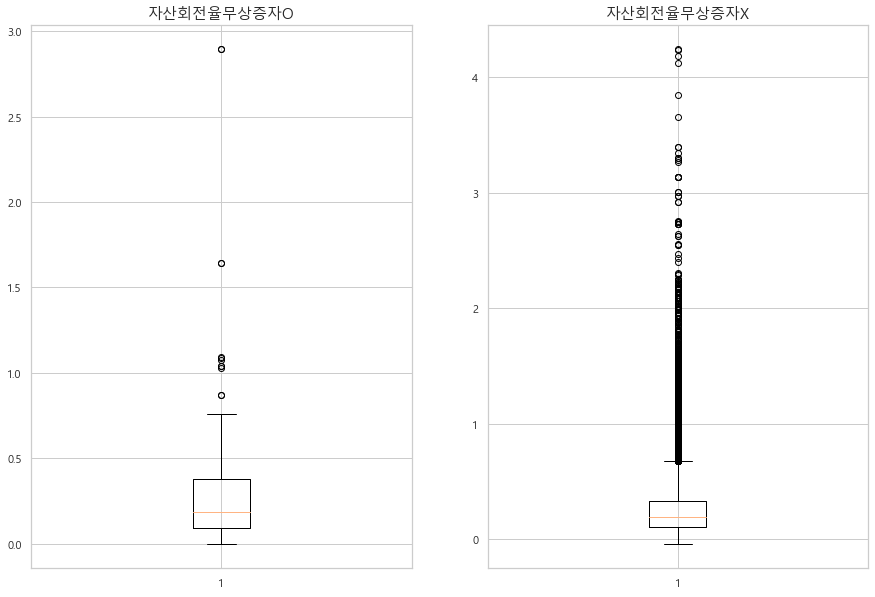

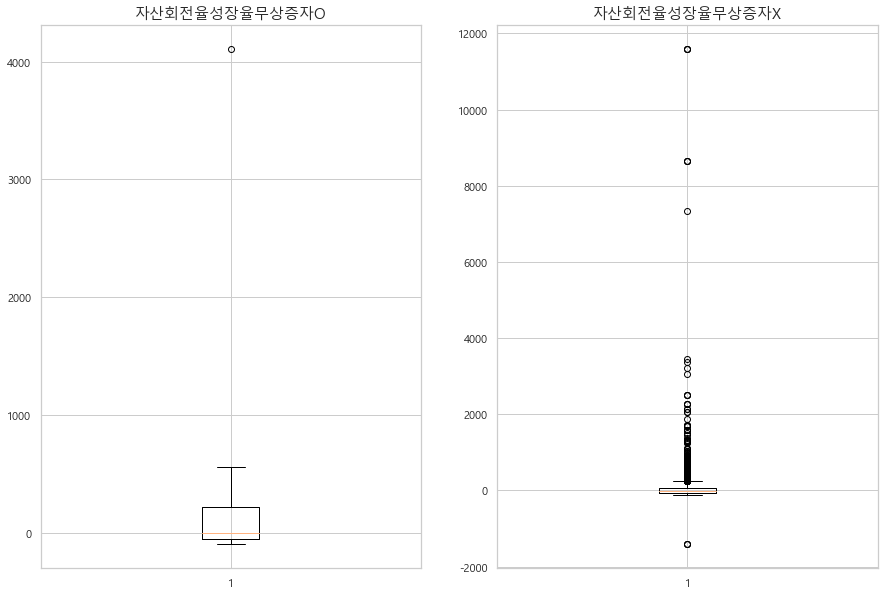

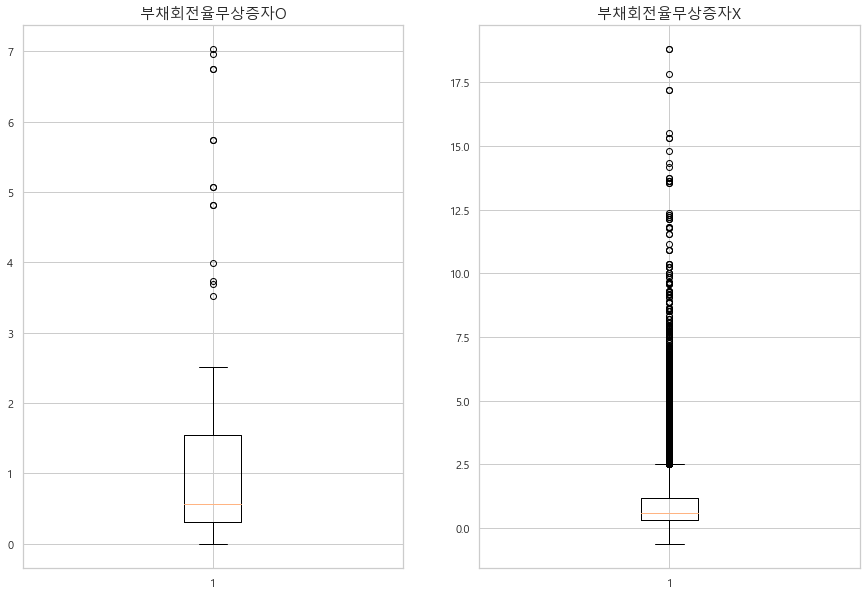

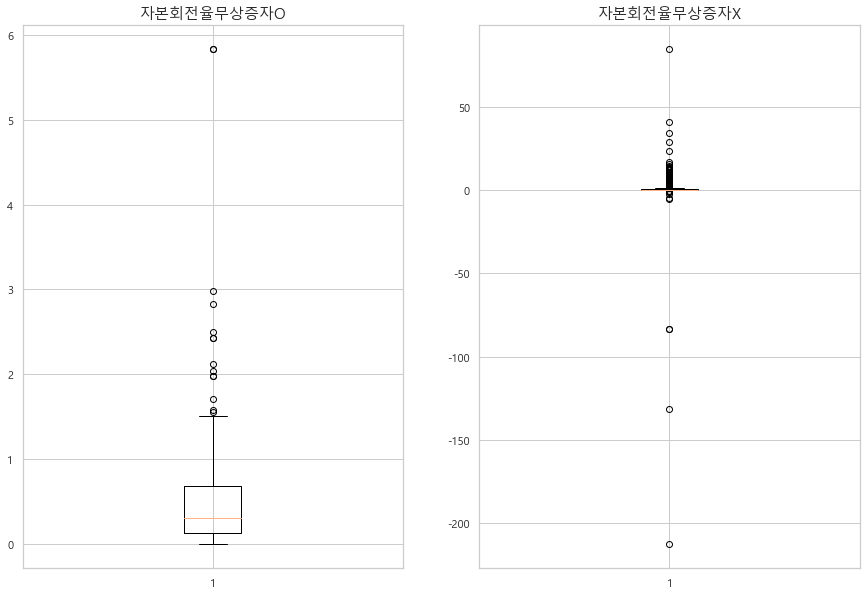

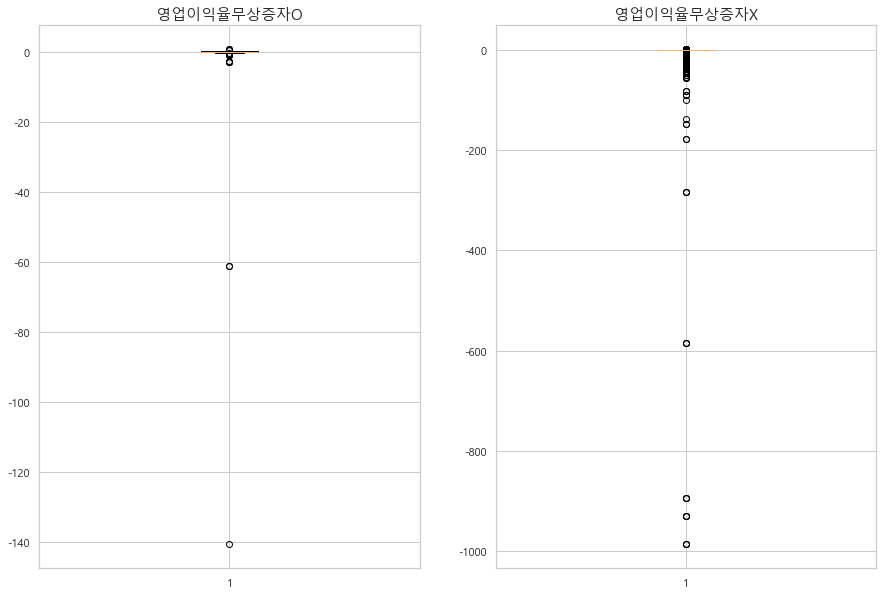

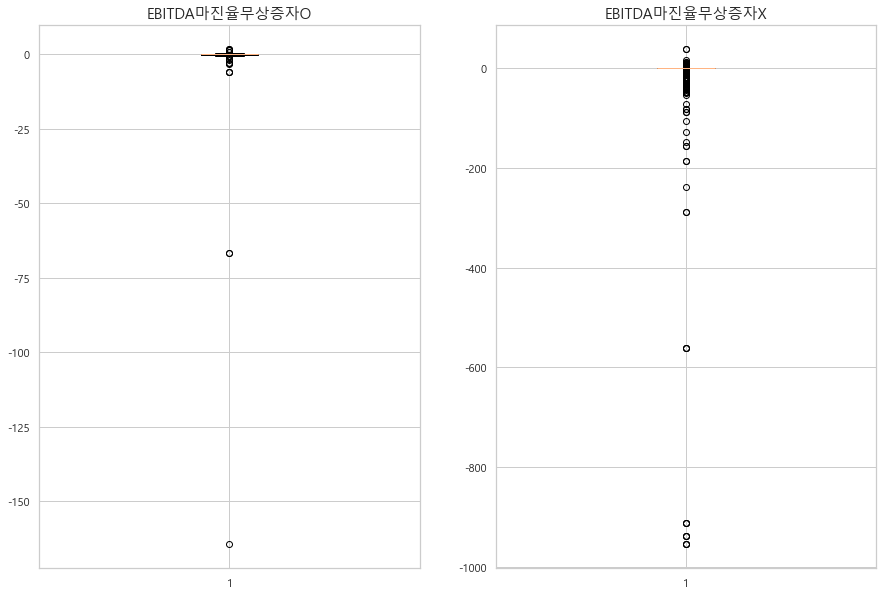

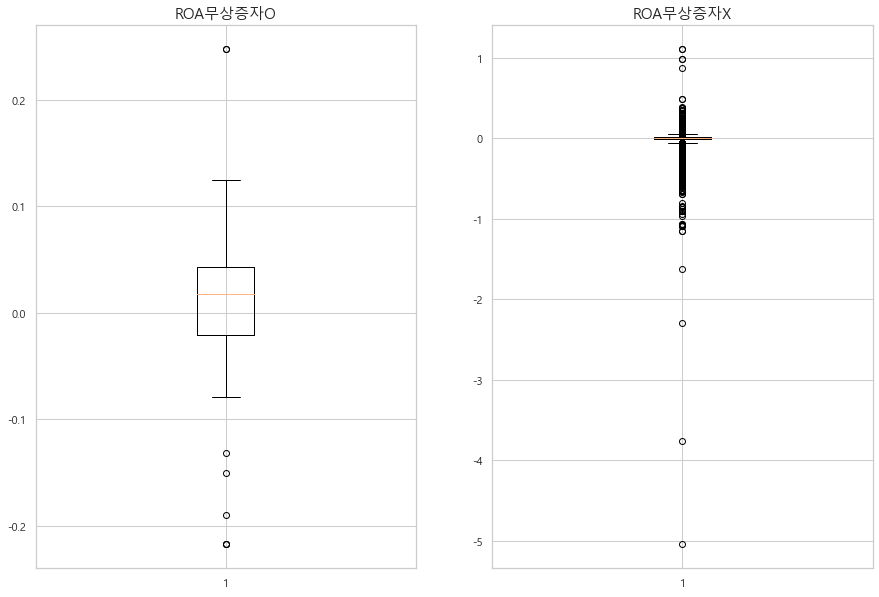

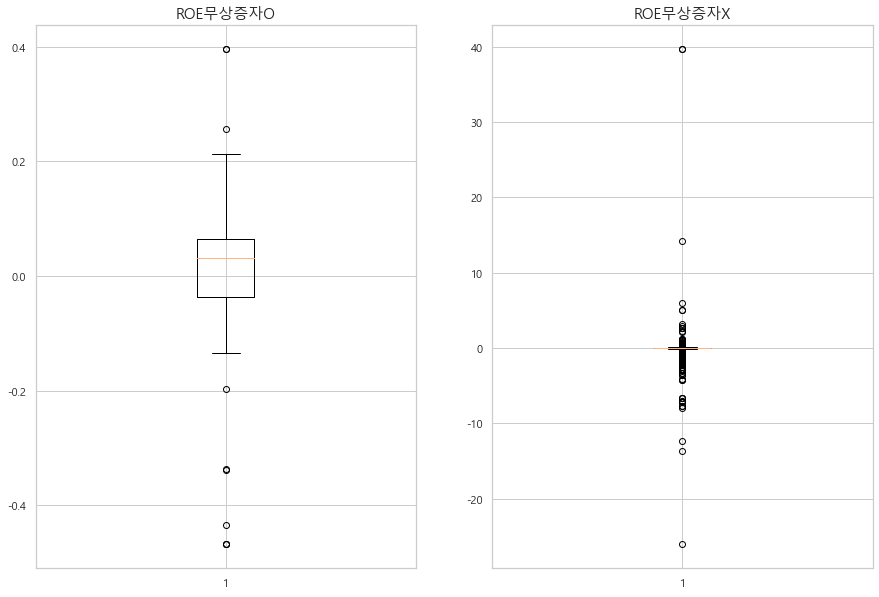

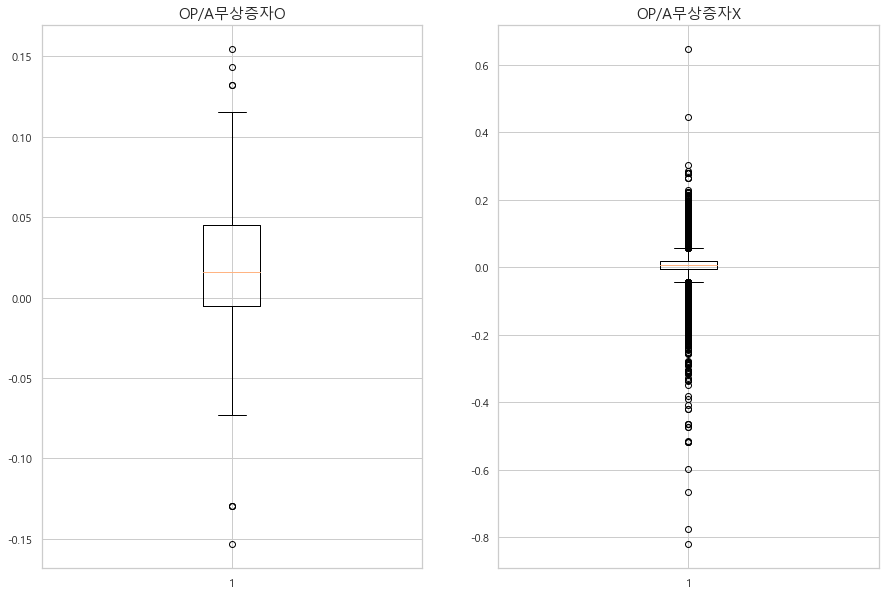

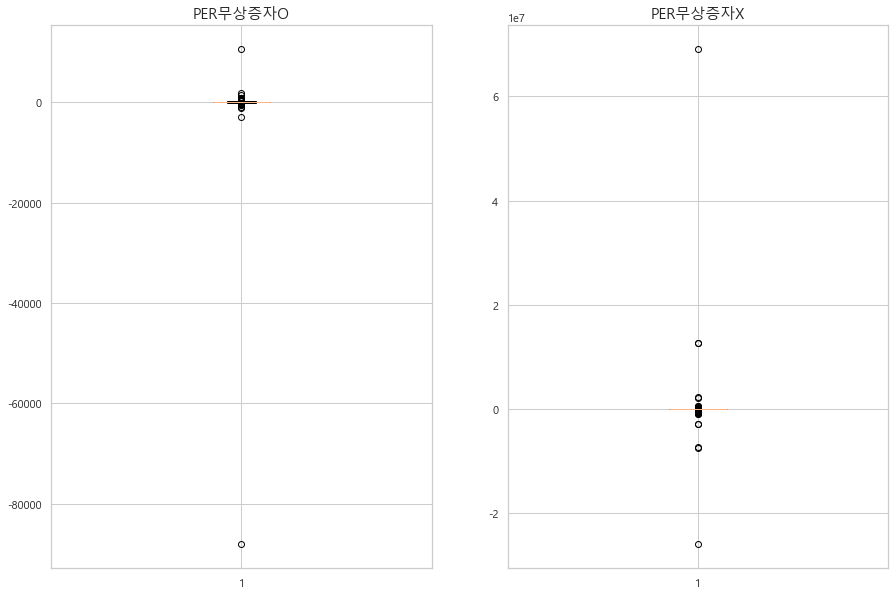

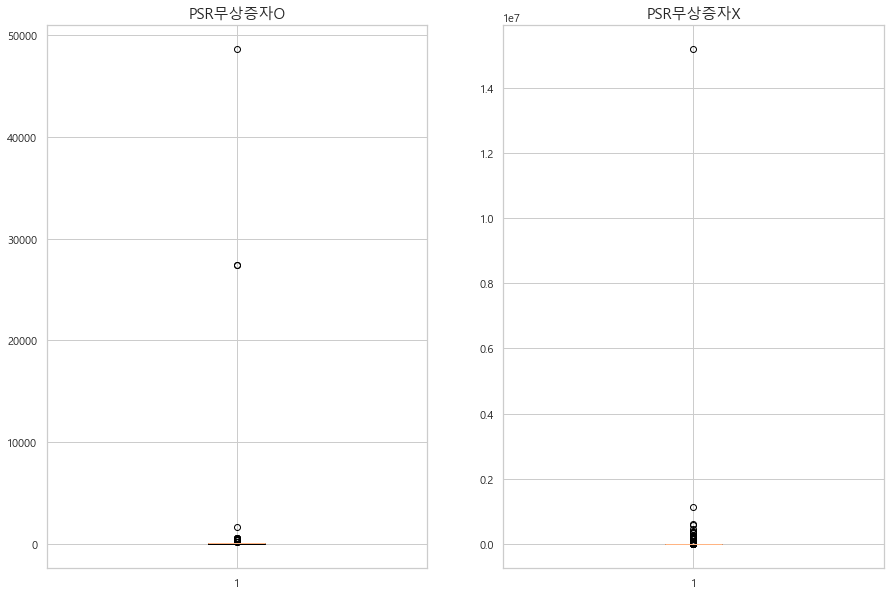

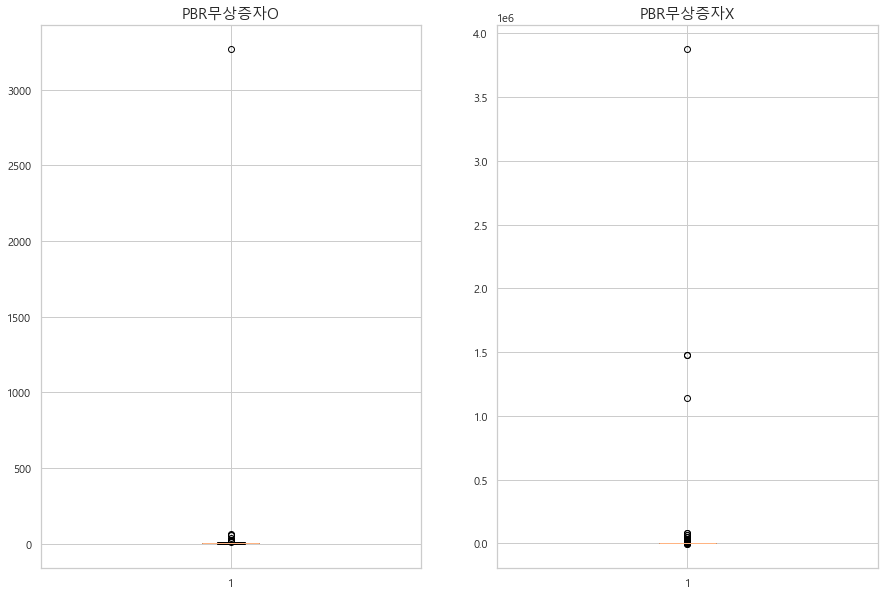

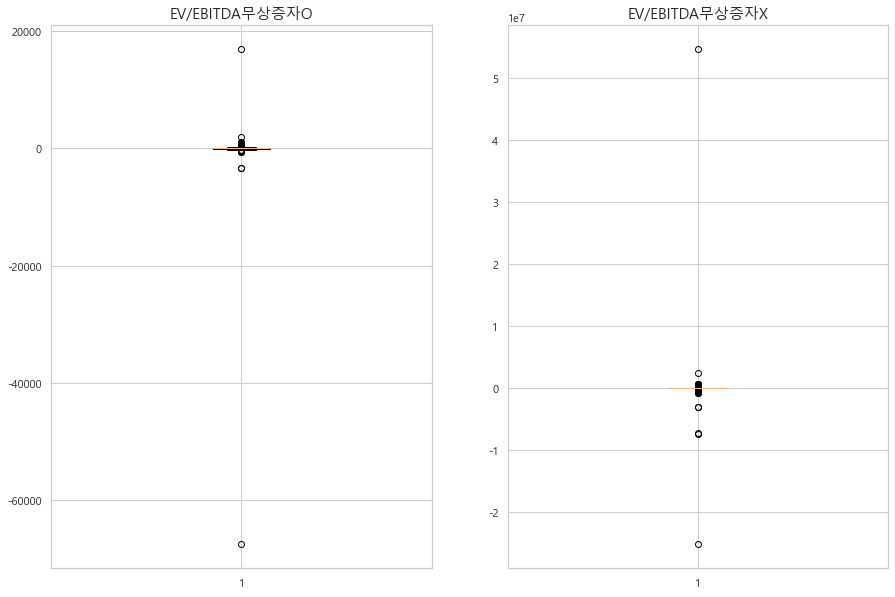

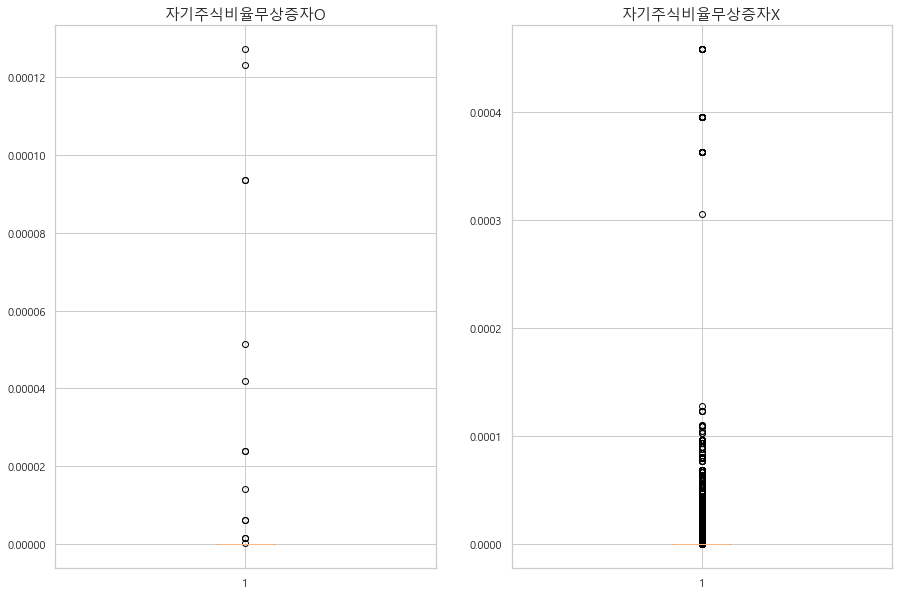

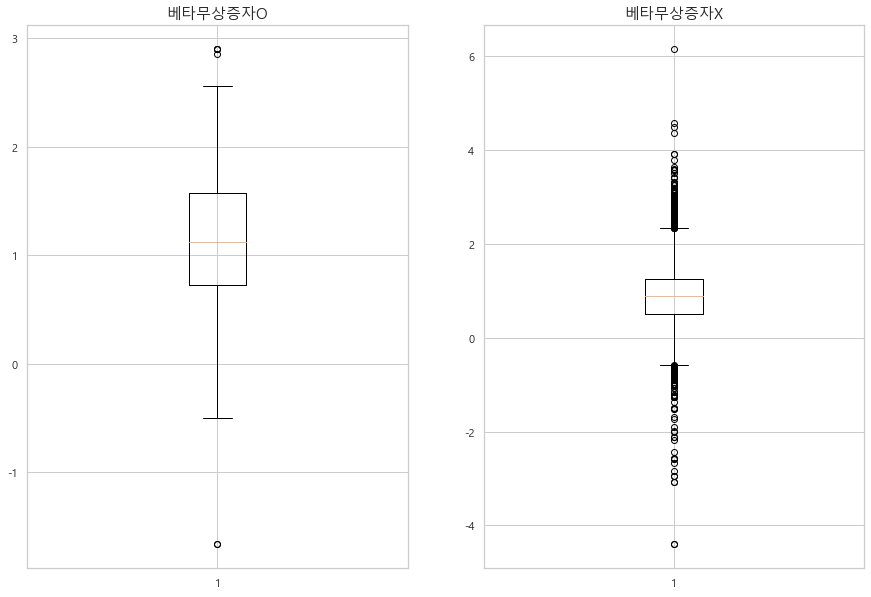

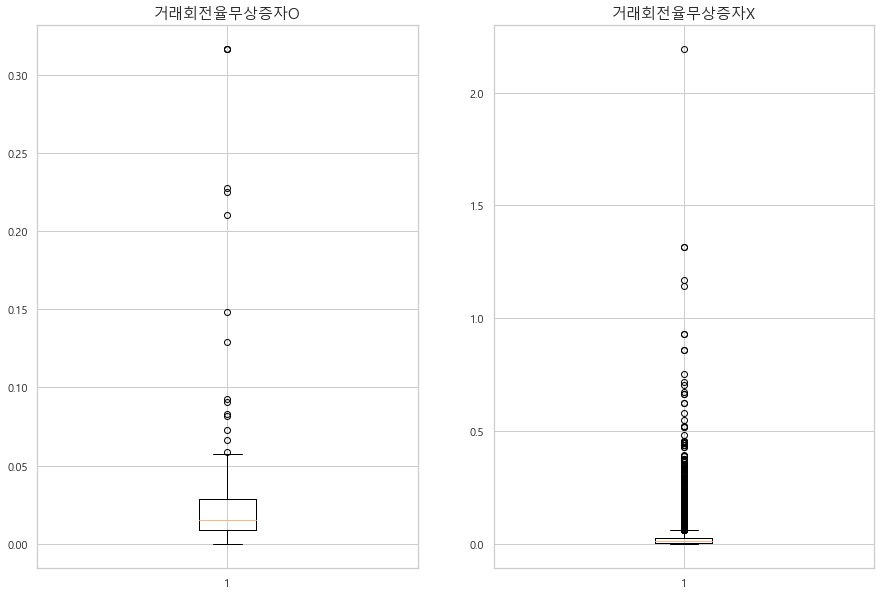

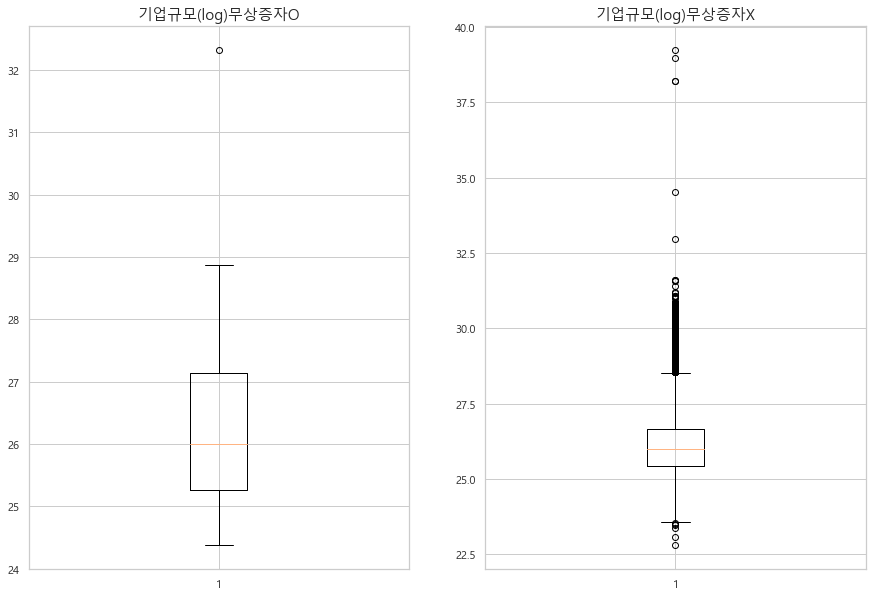

In [21]:
# 전체
for outlier_column in outlier_columns:
    outlier(outlier_column)

#### P값 유의변수

In [22]:
print(p_values)

['윌리엄R%', 'RSI', 'CCI', '역배열', 'OBV', '볼린저밴드위치', '유동비율', '자산성장율', '자본성장율', '유동비율성장율', 'ROA', 'ROE', 'OP/A', '베타']


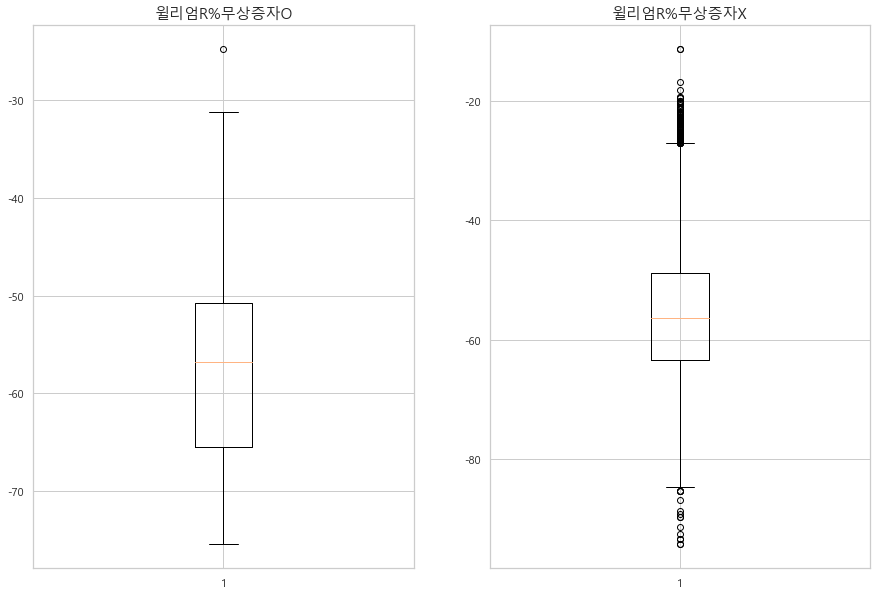

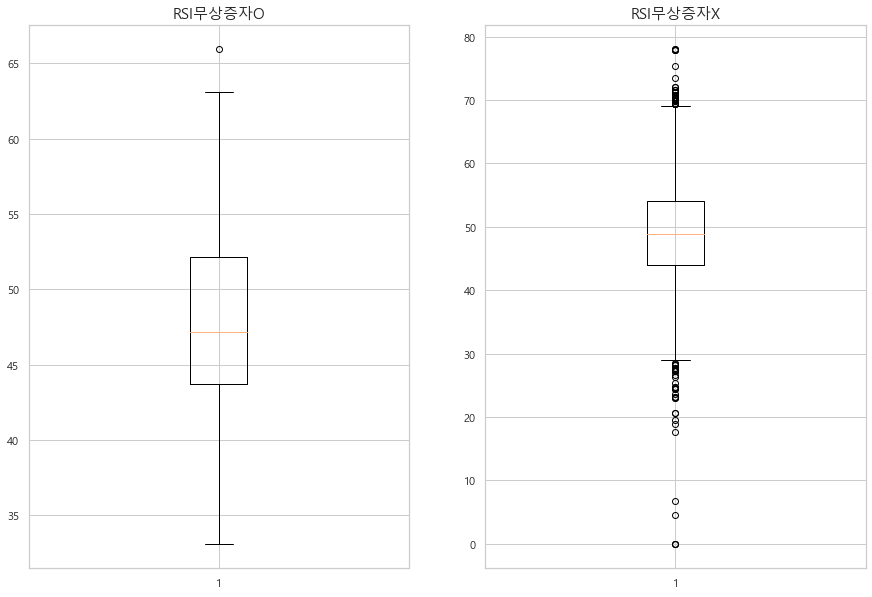

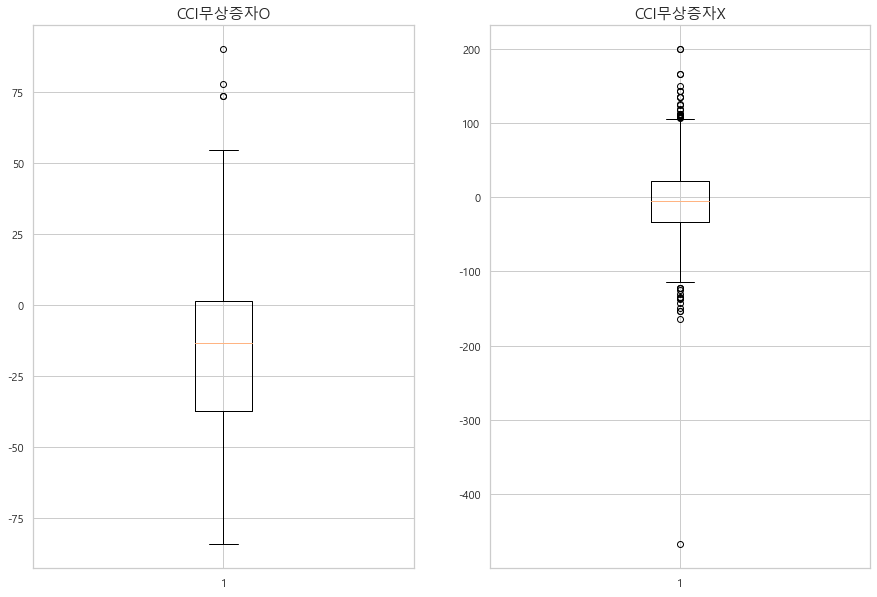

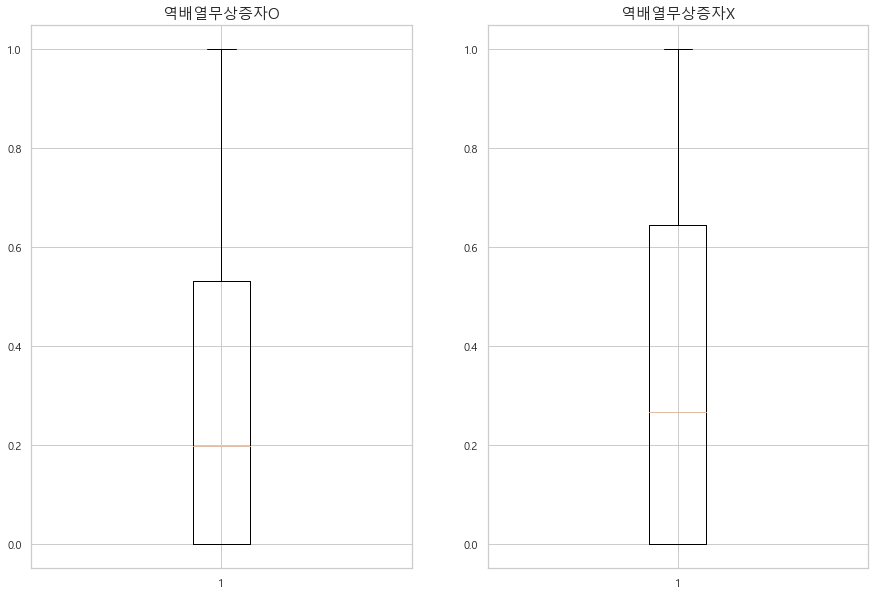

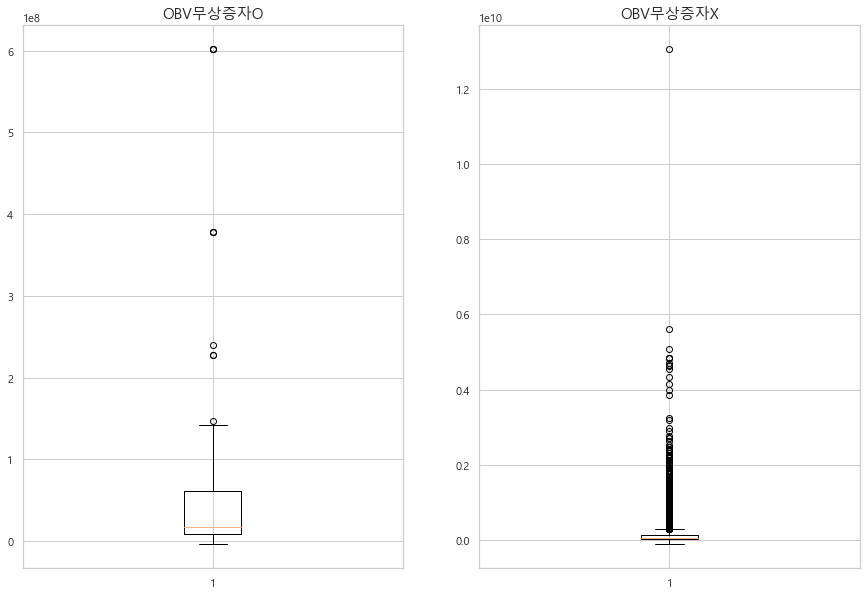

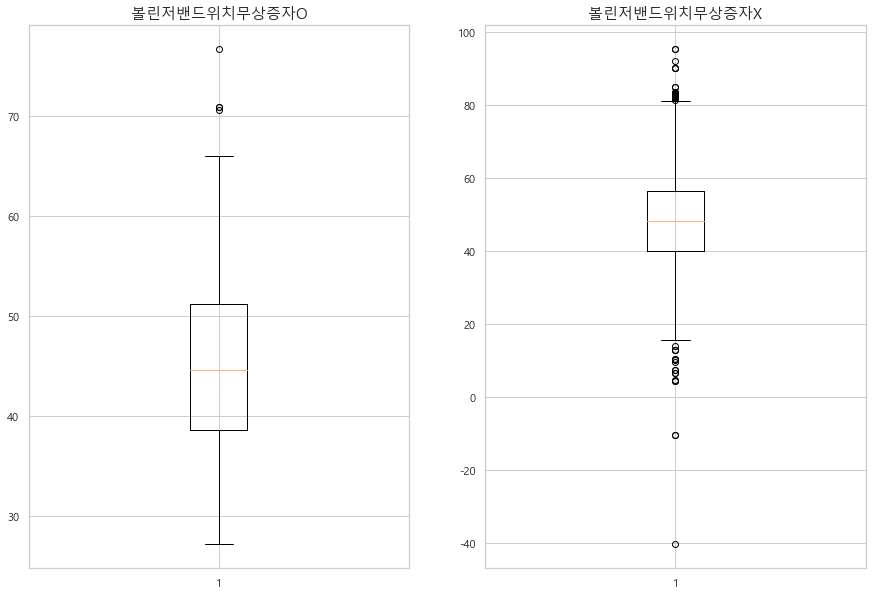

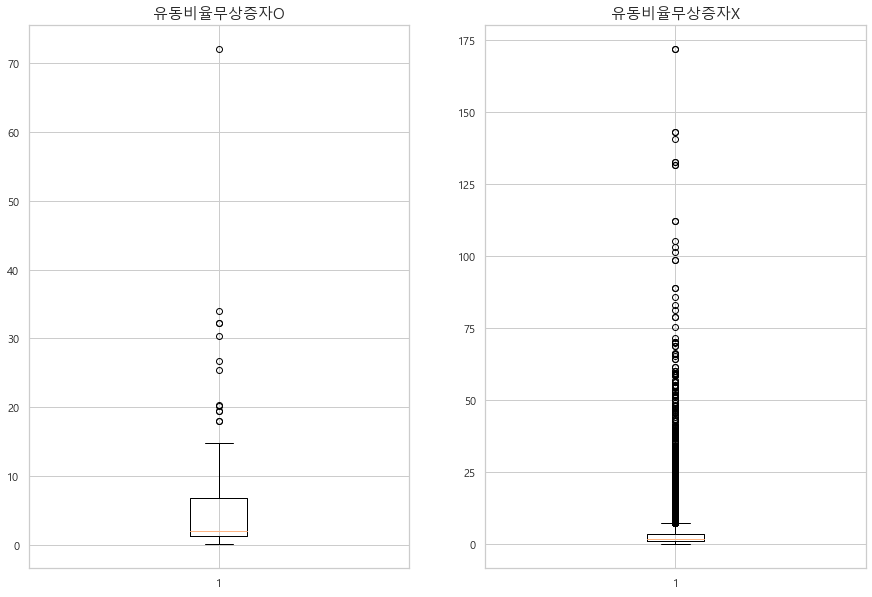

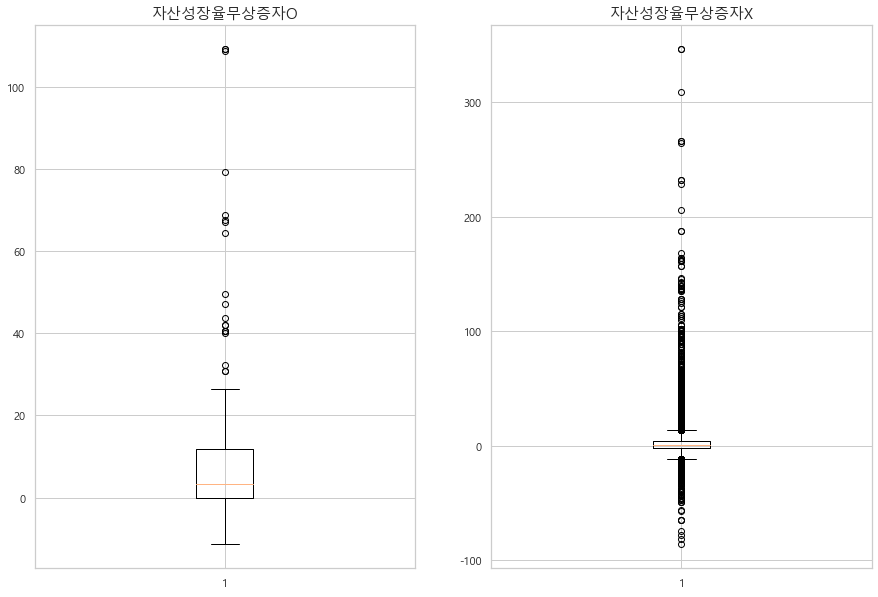

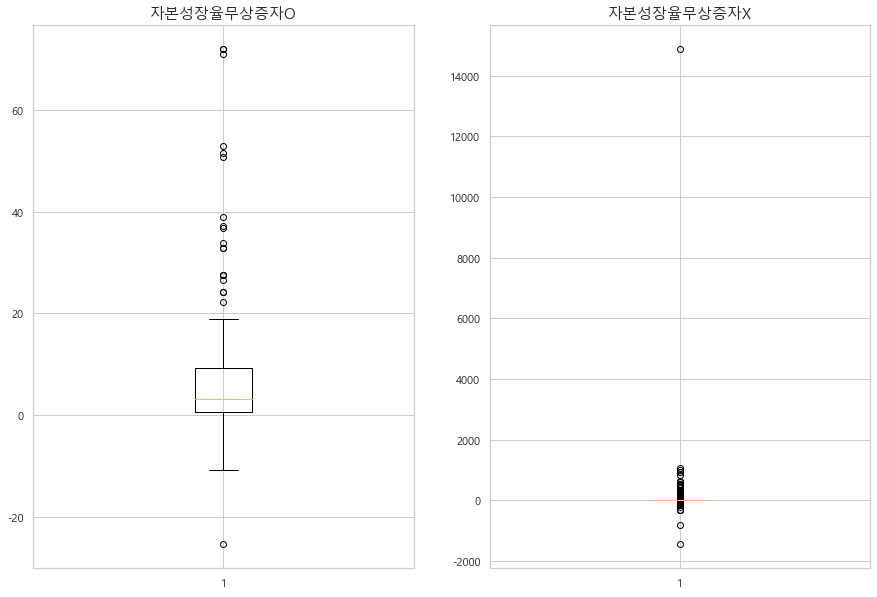

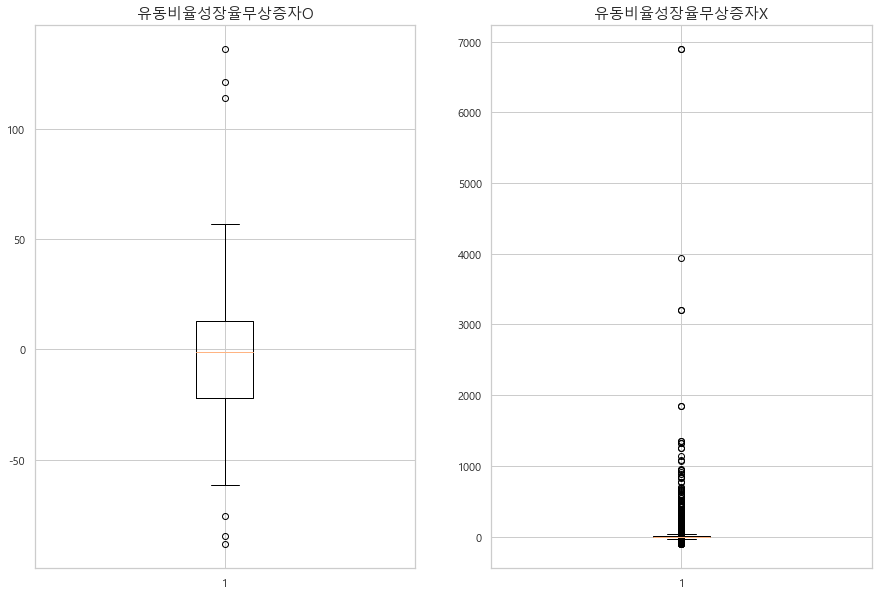

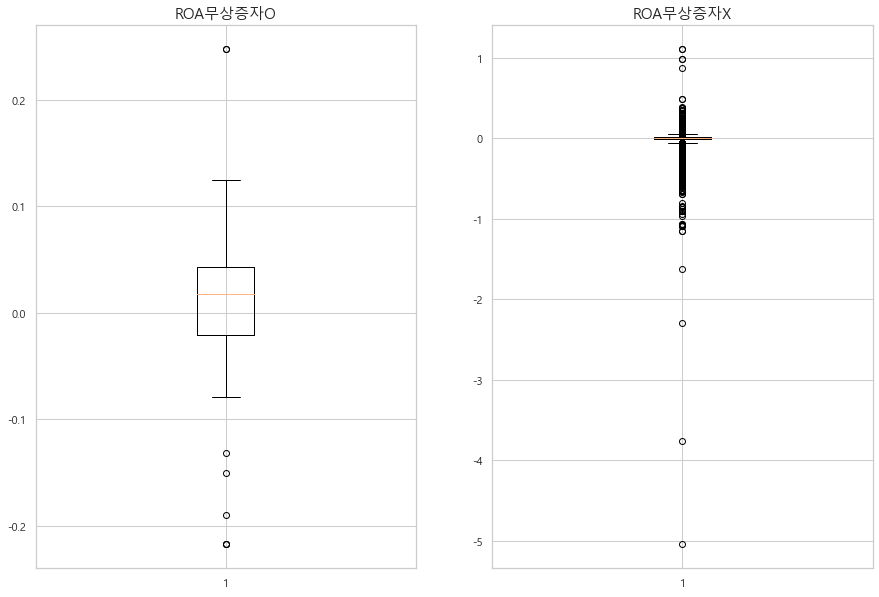

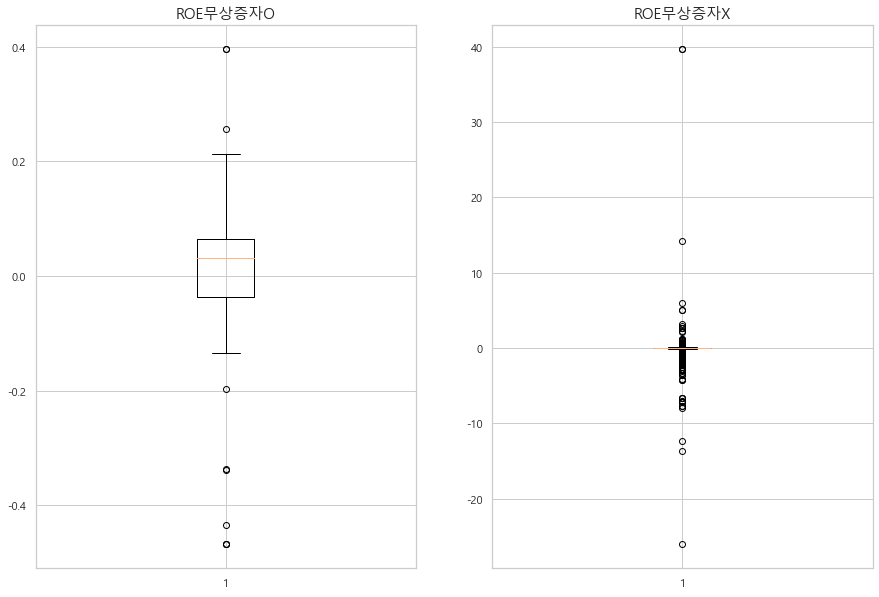

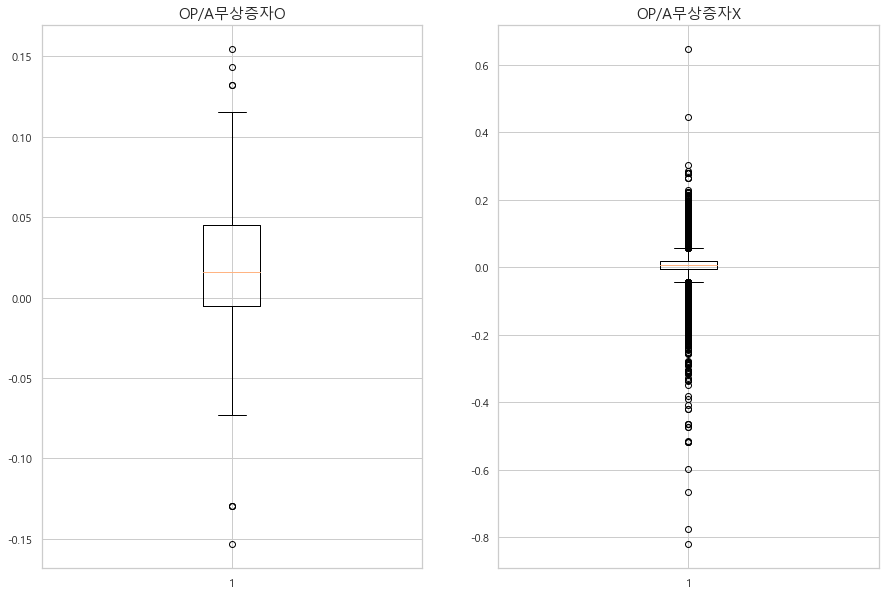

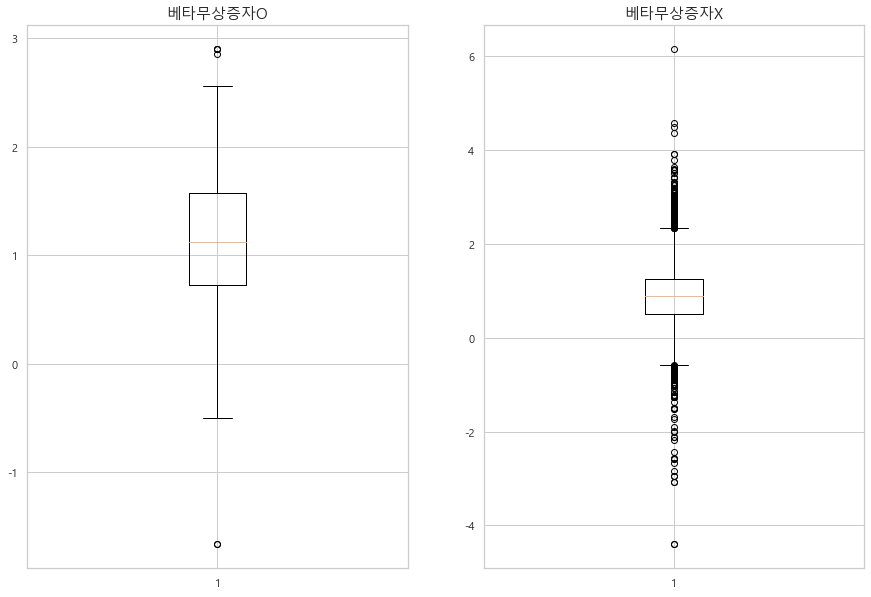

In [23]:
# 전체
for p_value in p_values:
    outlier(p_value)

### 분포도 확인

In [24]:
def distribution(column):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (25,5))

    axes[0].hist(isBonusissue[column], bins = 30)
    axes[0].set_title((column + '무상증자O'), size = 15)

    axes[1].hist(noBonusissue[column], bins = 30)
    axes[1].set_title((column + '무상증자X'), size = 15)
    plt.show()

#### 전체 변수

In [25]:
distribution_columns = data.drop(['회사명', 'code', 'Date', 'Market', 'Sector', 'Industry', '증자비율', '무상증자여부'], axis = 1).columns
distribution_columns

Index(['High', 'Low', 'Close', 'Volume', '기관합계', '개인', 'MFI', '윌리엄R%', 'RSI',
       'CCI', '정배열', '역배열', 'OBV', '볼린저밴드위치', '소액주주보유주식비율', '최대주주_특수관계인지분율',
       '유동비율', '부채비율', '자기자본비율', '매출액증가율', '영업이익증가율', 'EBITDA증가율', 'EPS증가율',
       '당기순이익증가율', '흑자전환', '자산성장율', '자본성장율', '부채비율성장율', '유동비율성장율', '자산회전율',
       '자산회전율성장율', '부채회전율', '자본회전율', '영업이익율', 'EBITDA마진율', 'ROA', 'ROE',
       'OP/A', 'PER', 'PSR', 'PBR', 'EV/EBITDA', '자기주식비율', '베타', '거래회전율',
       '기업규모(log)'],
      dtype='object')

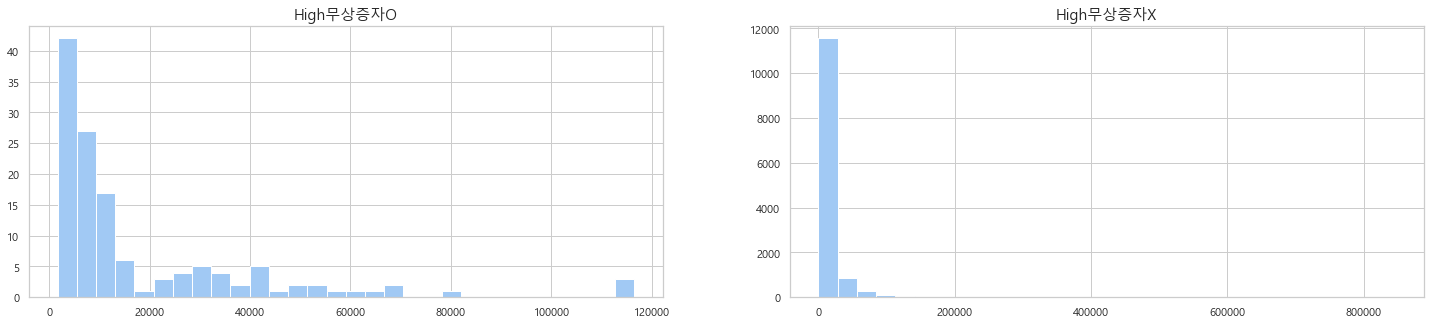

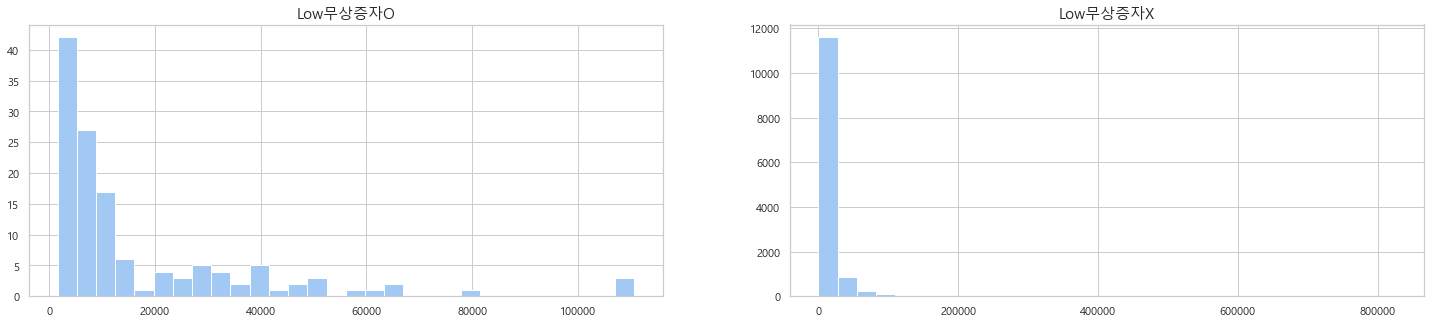

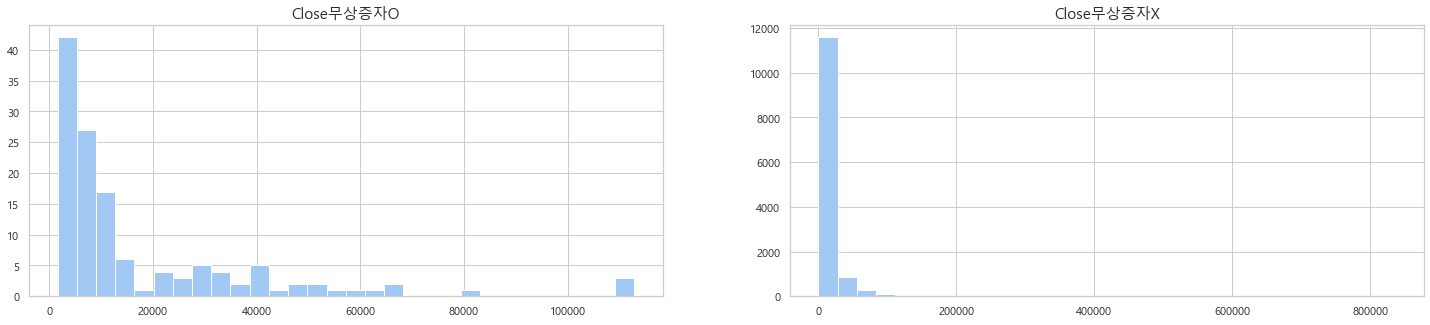

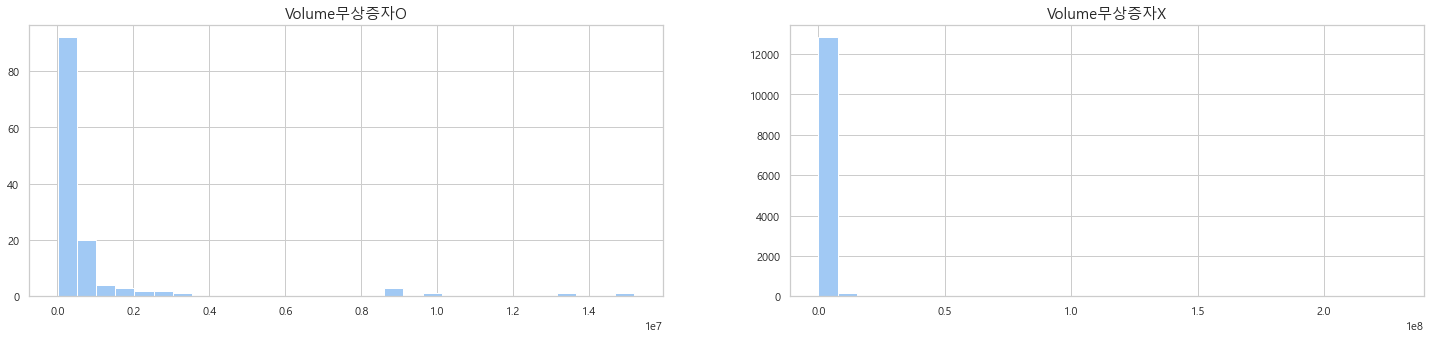

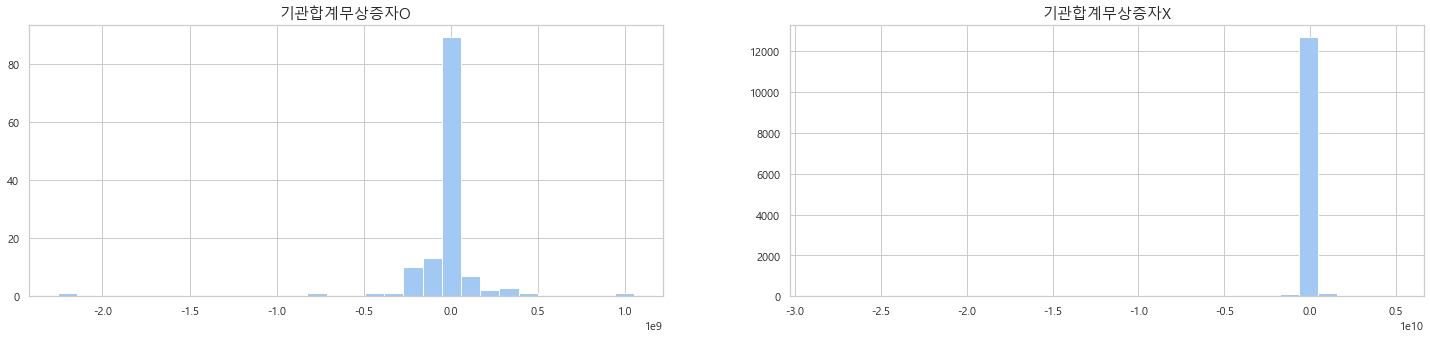

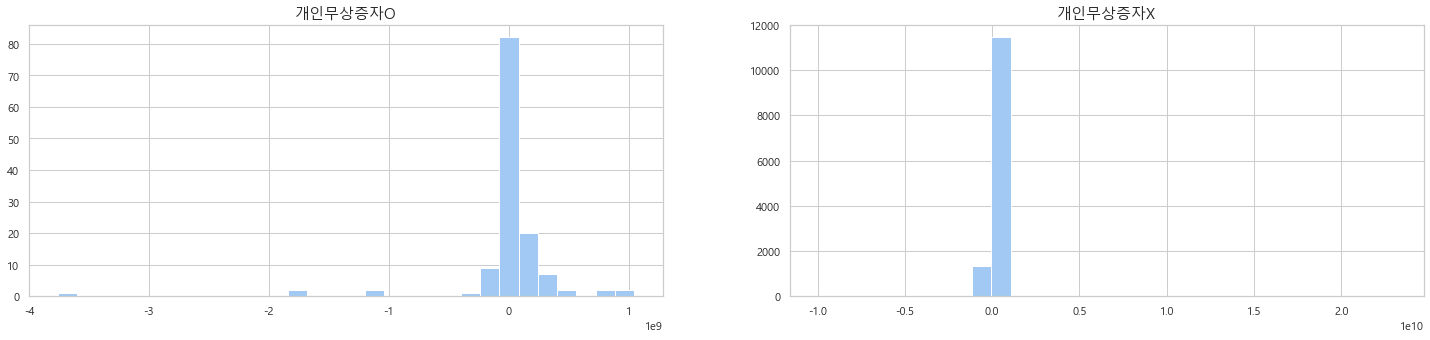

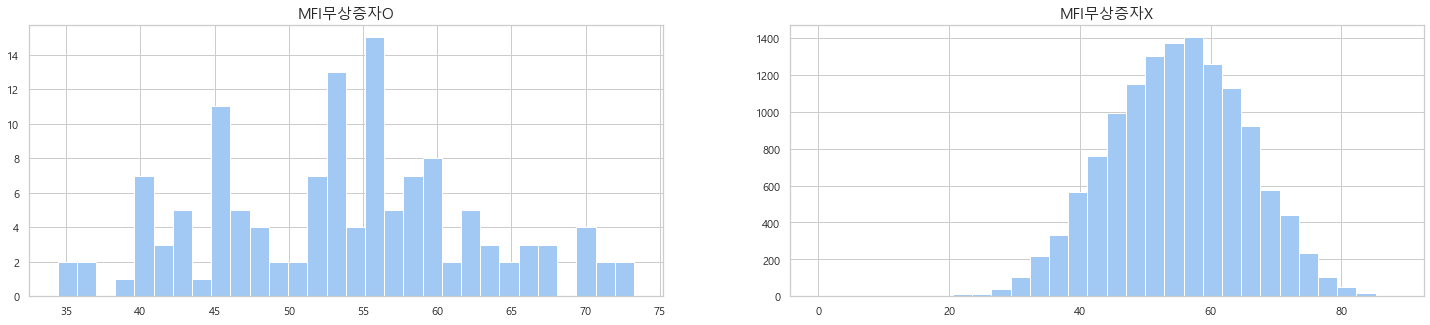

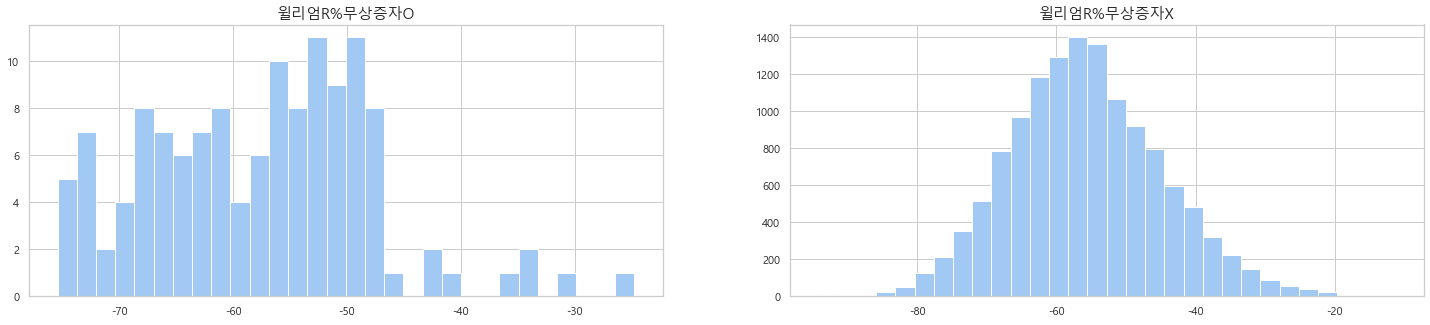

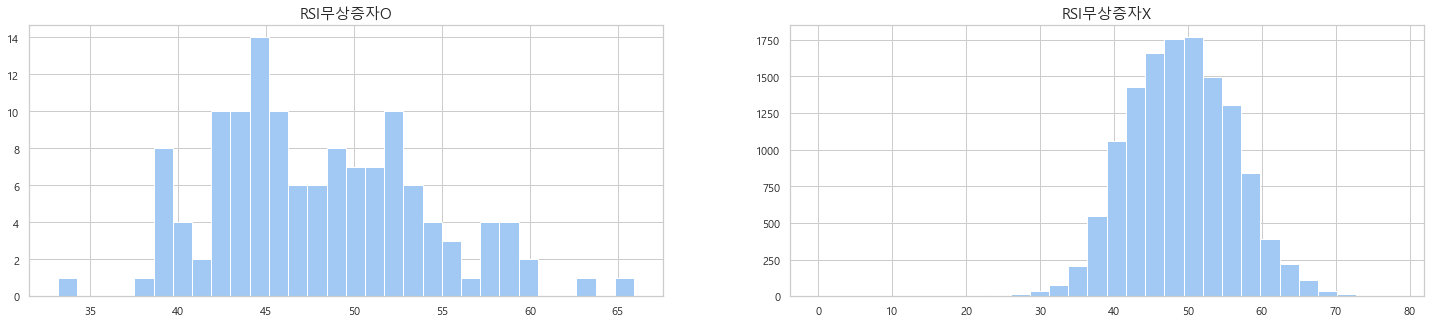

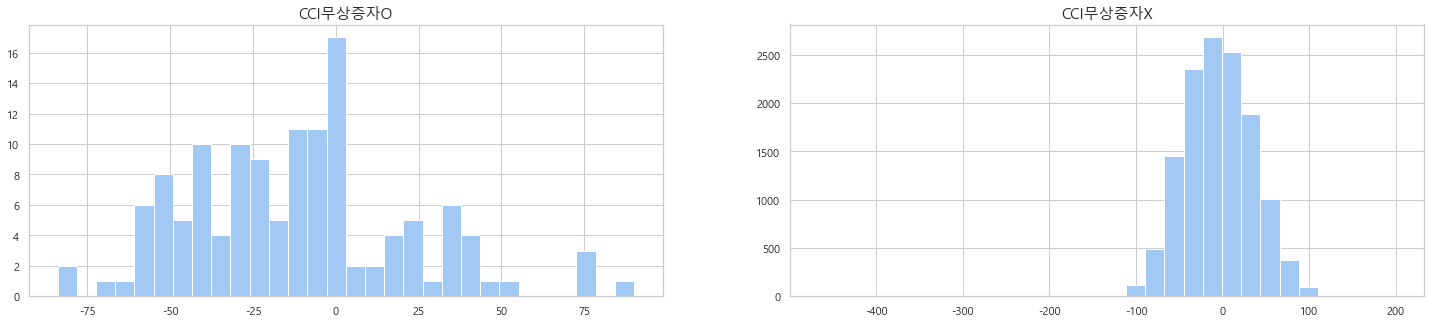

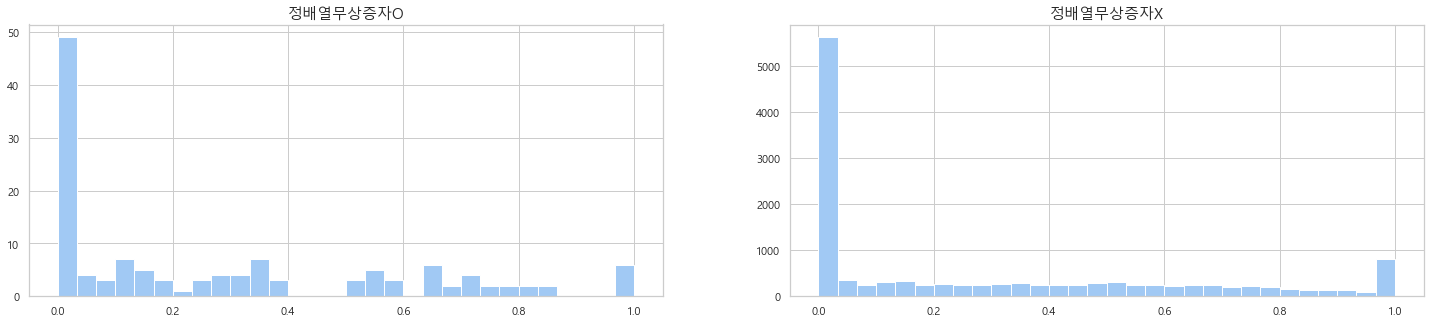

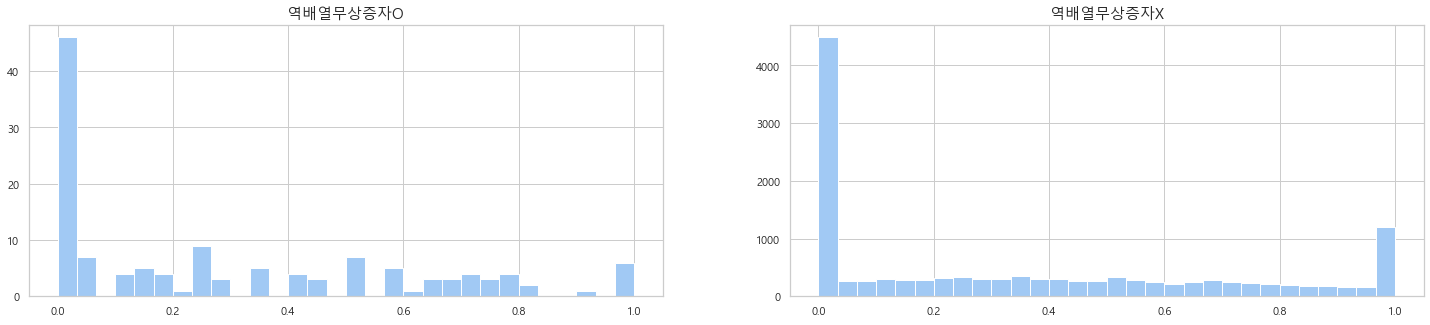

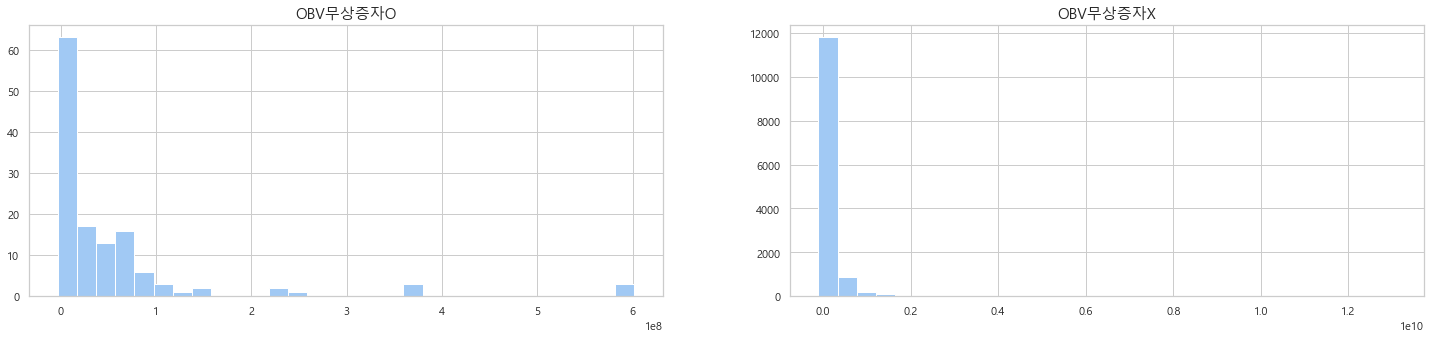

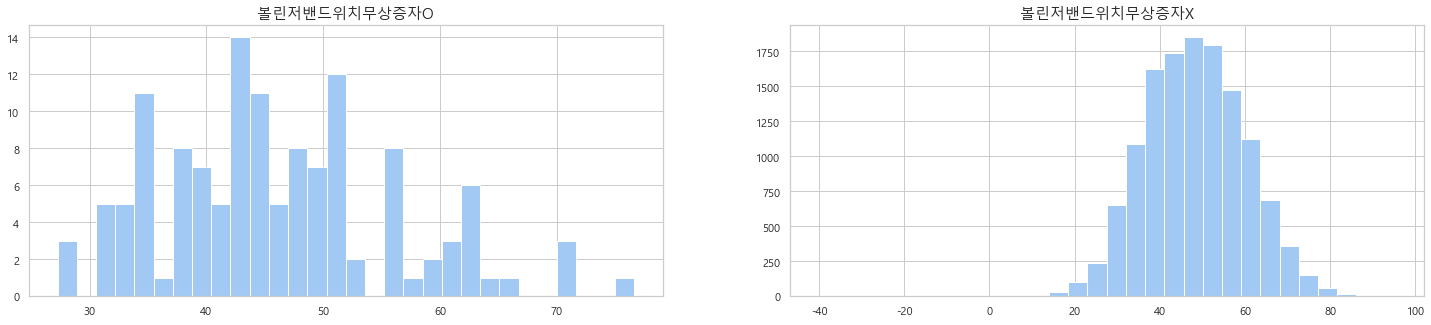

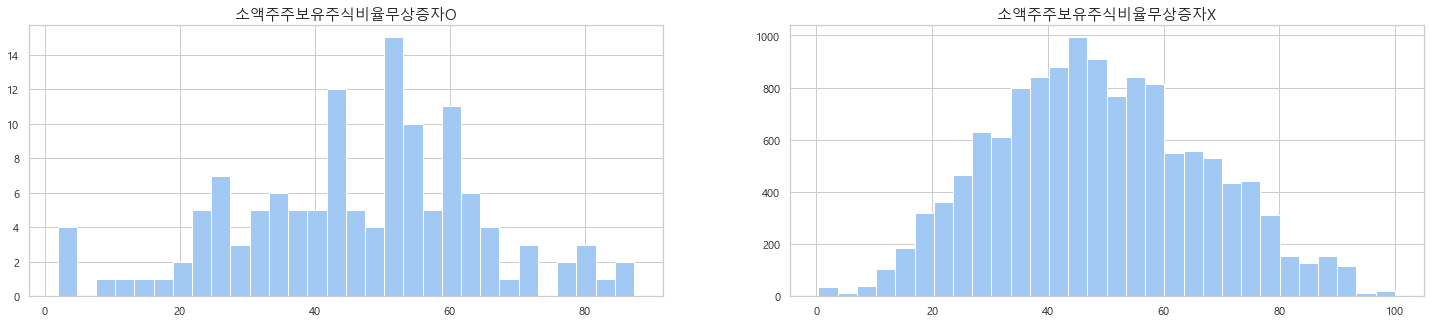

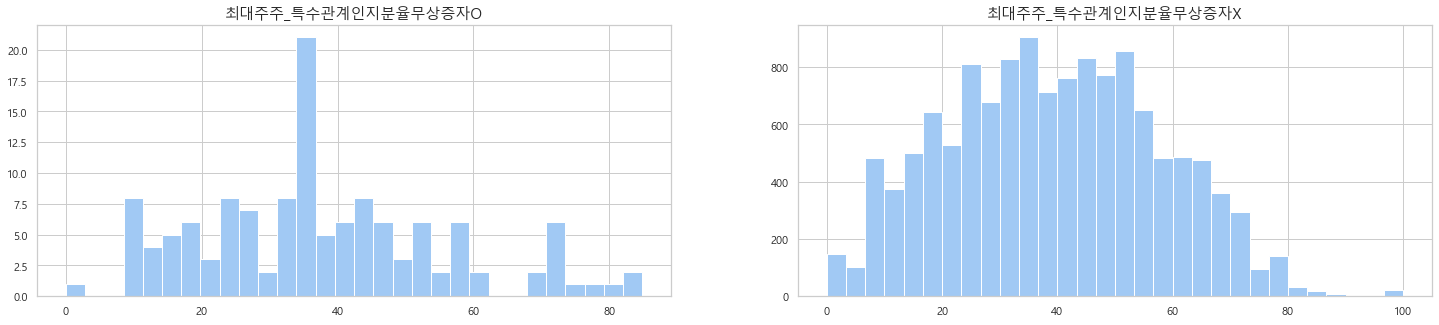

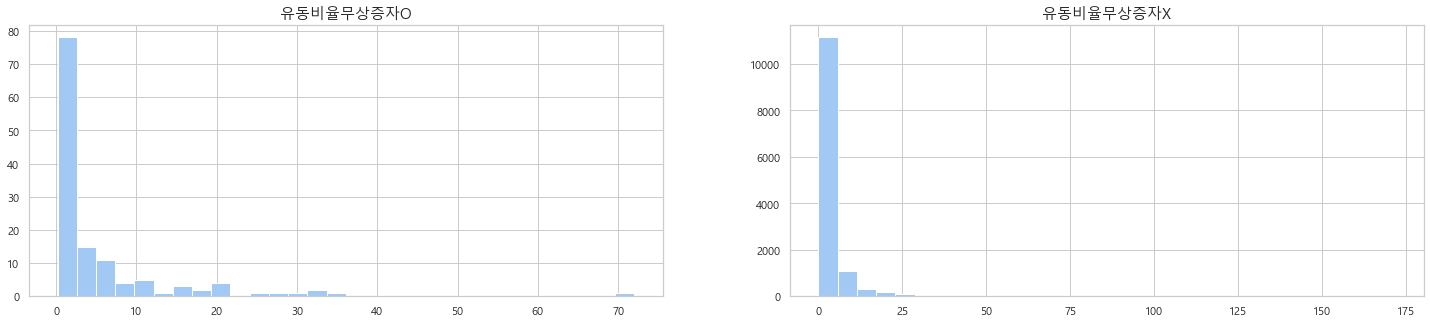

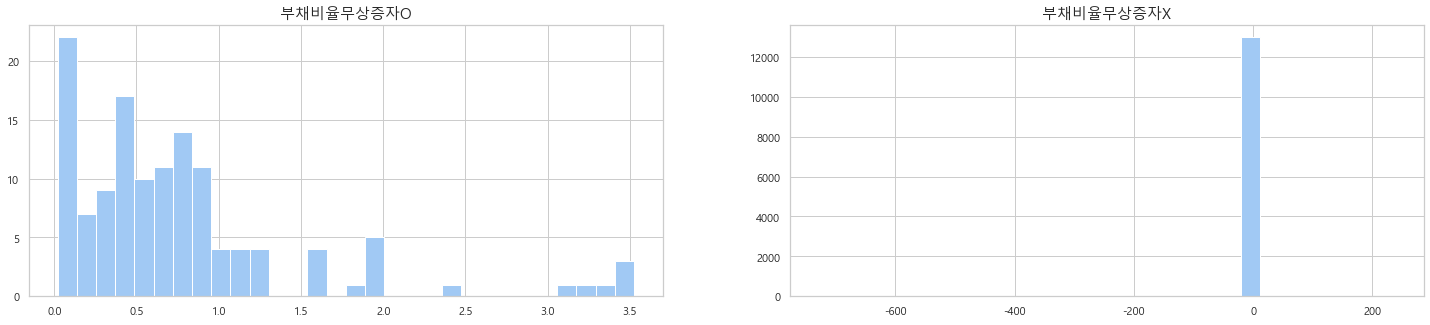

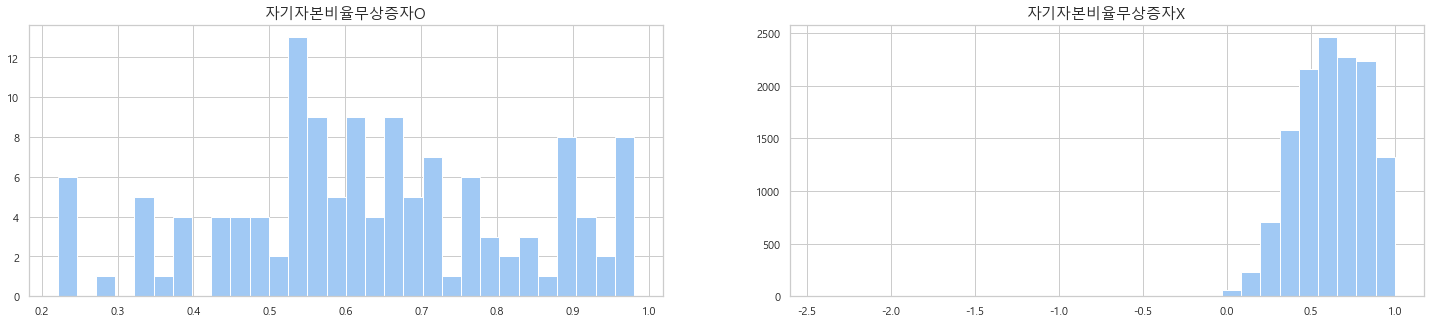

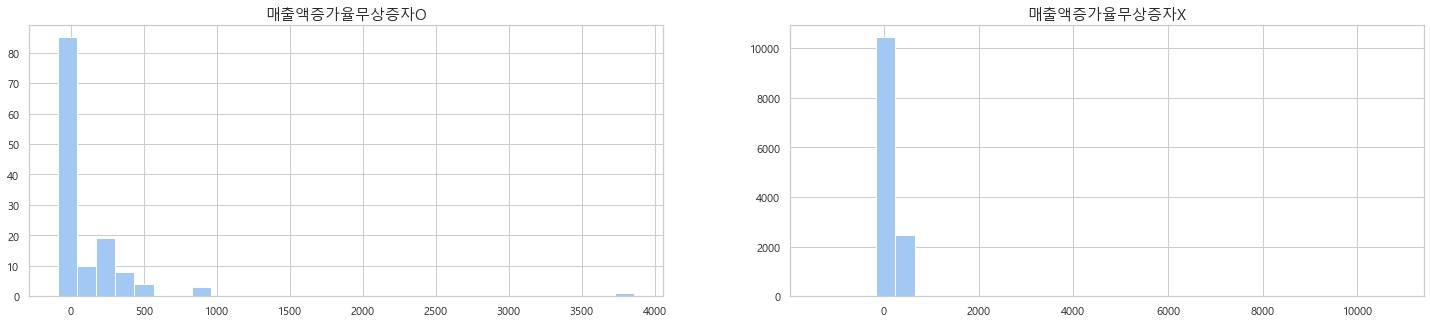

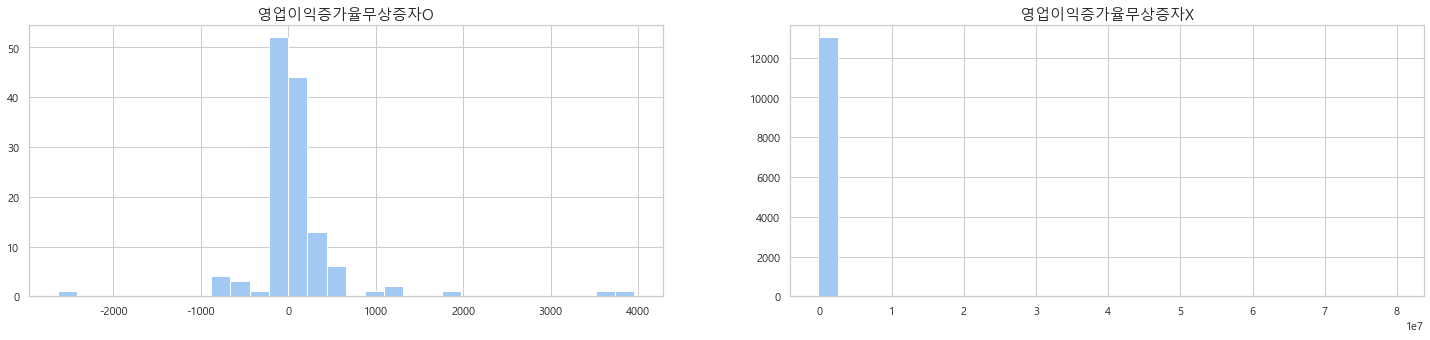

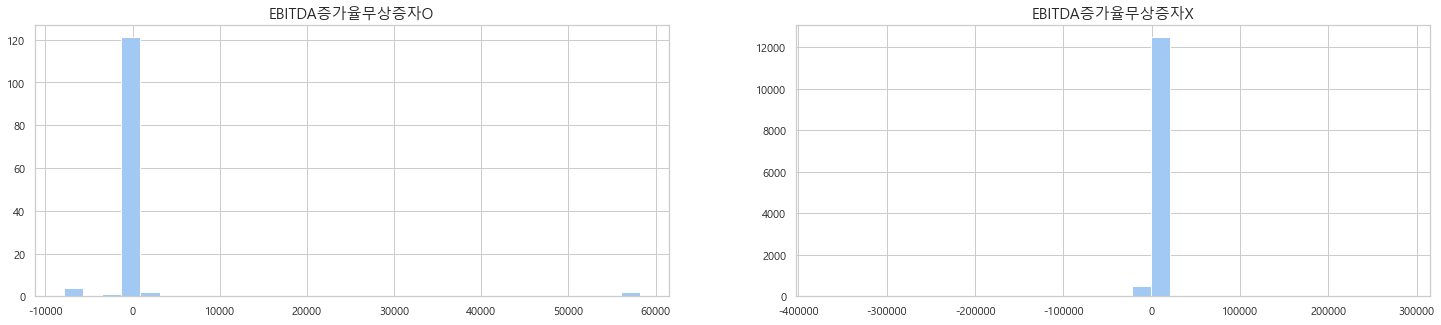

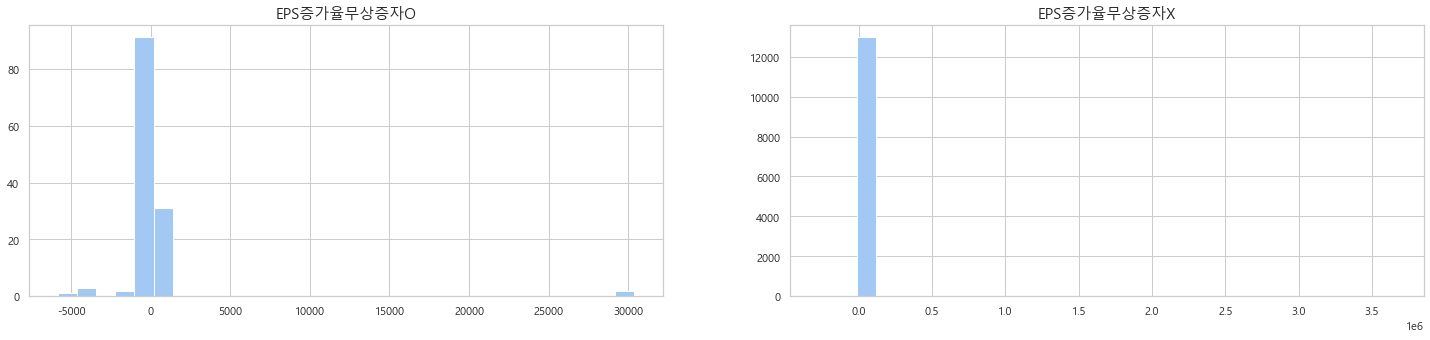

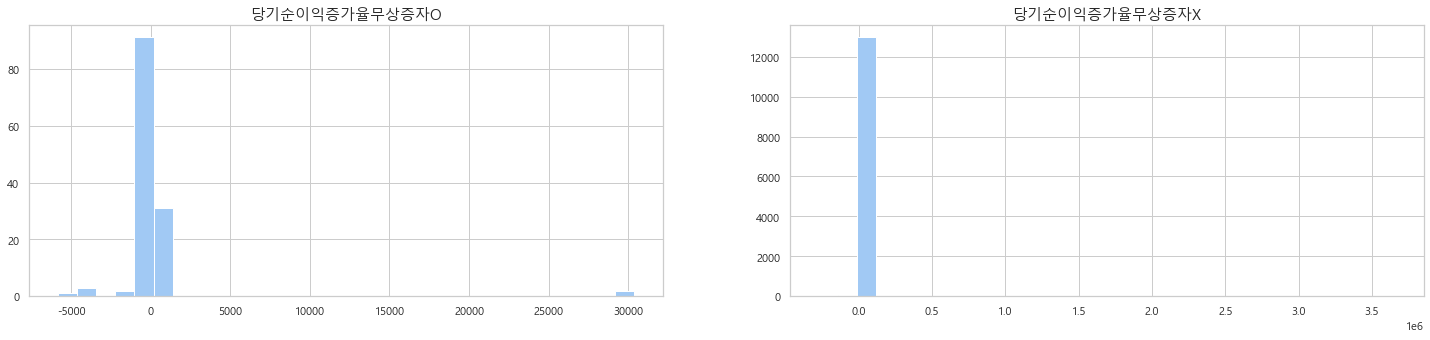

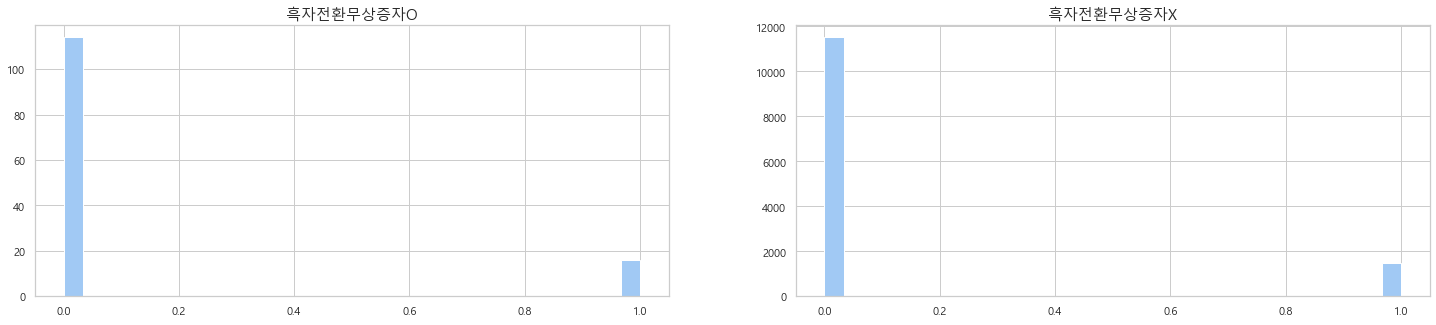

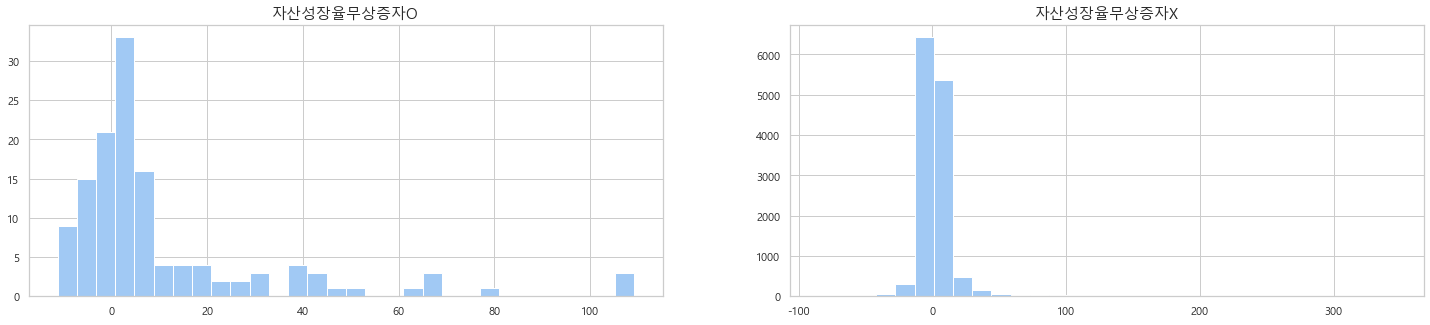

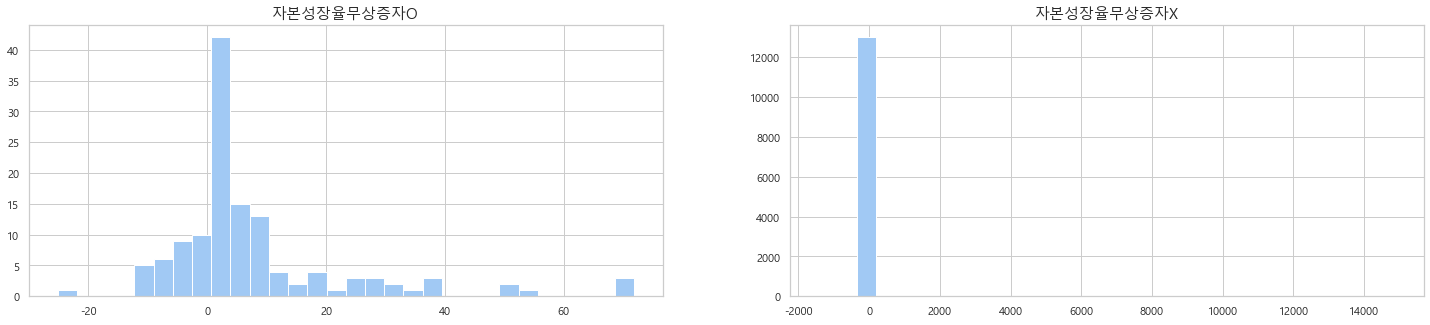

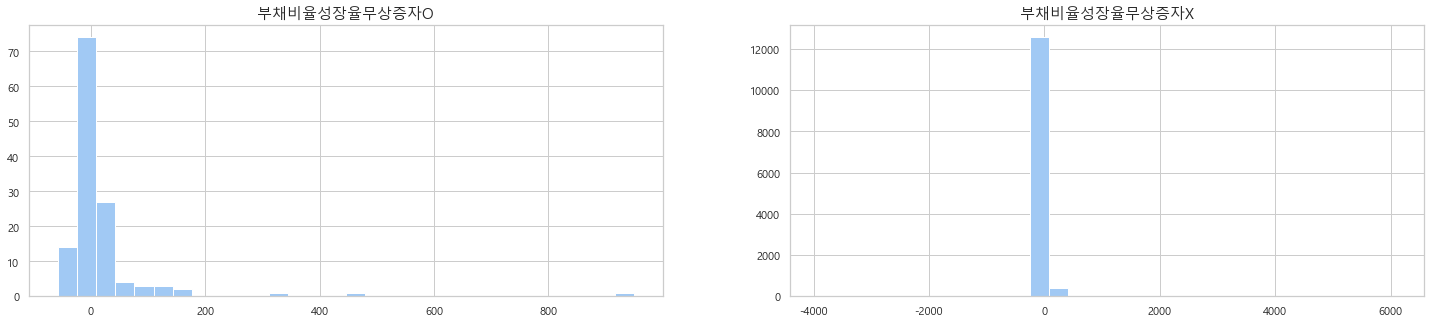

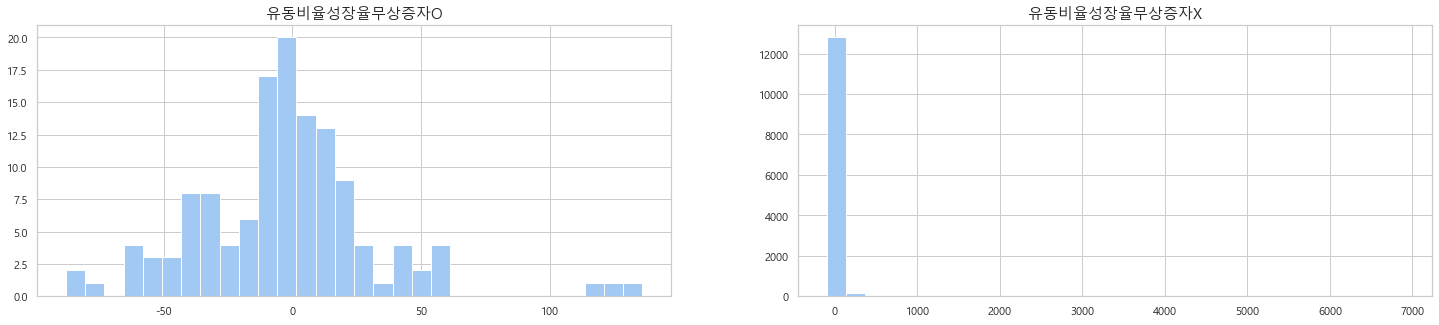

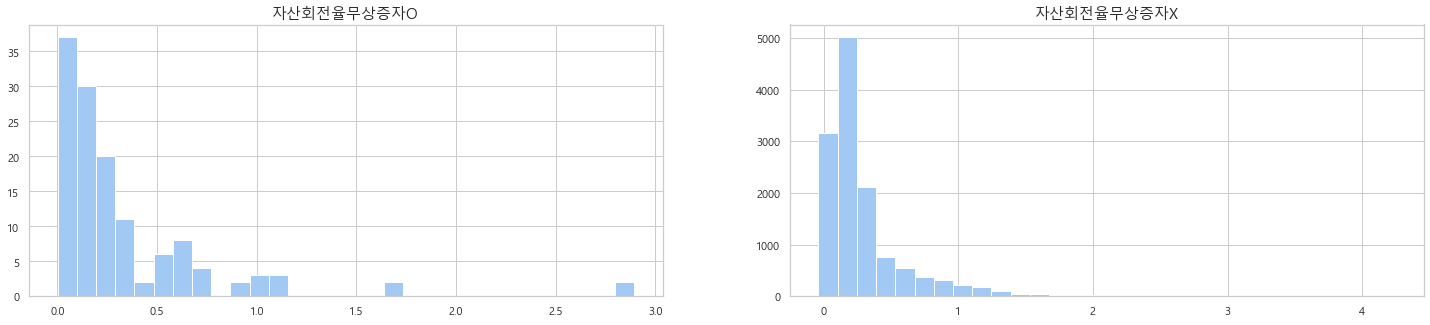

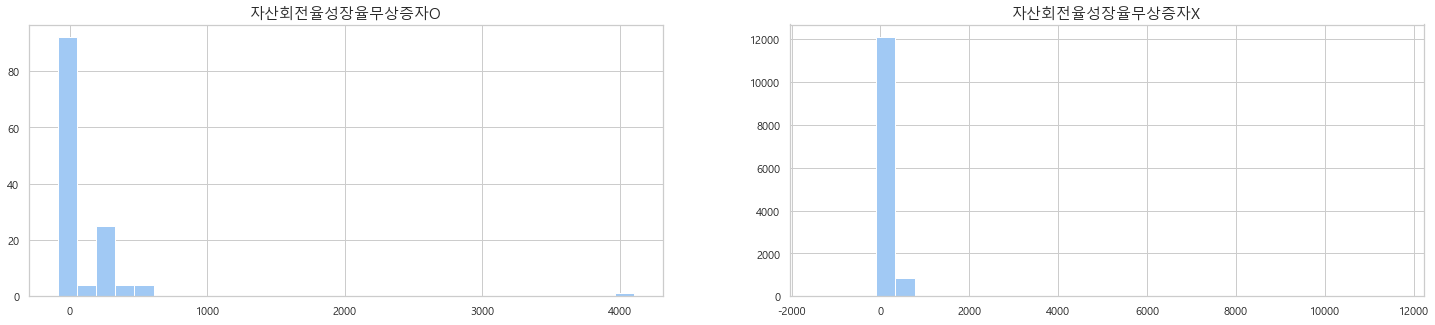

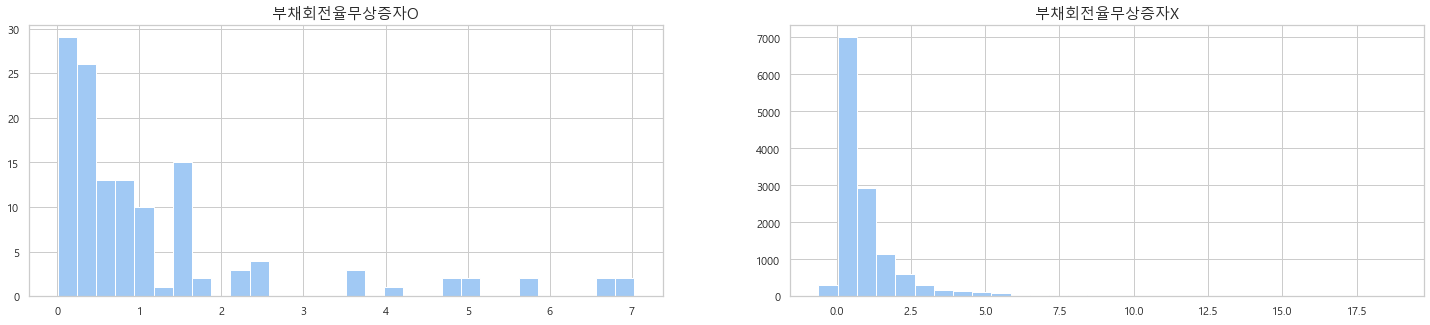

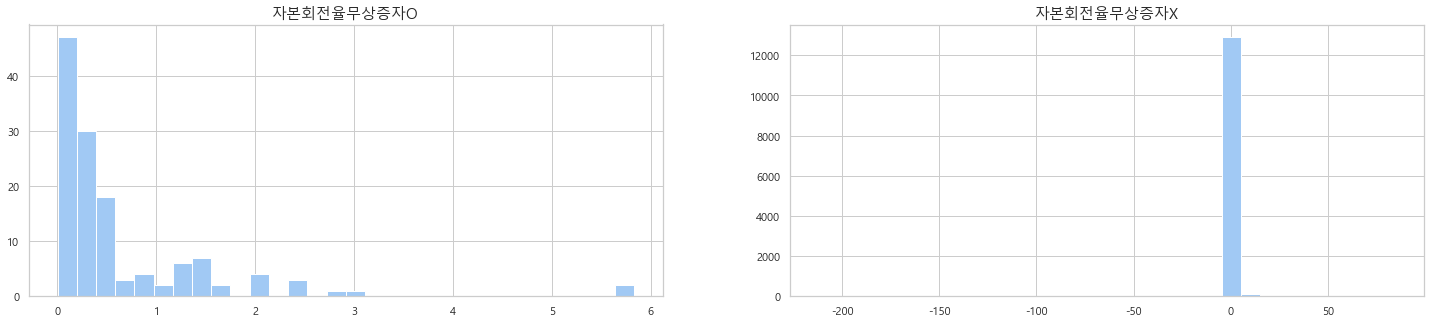

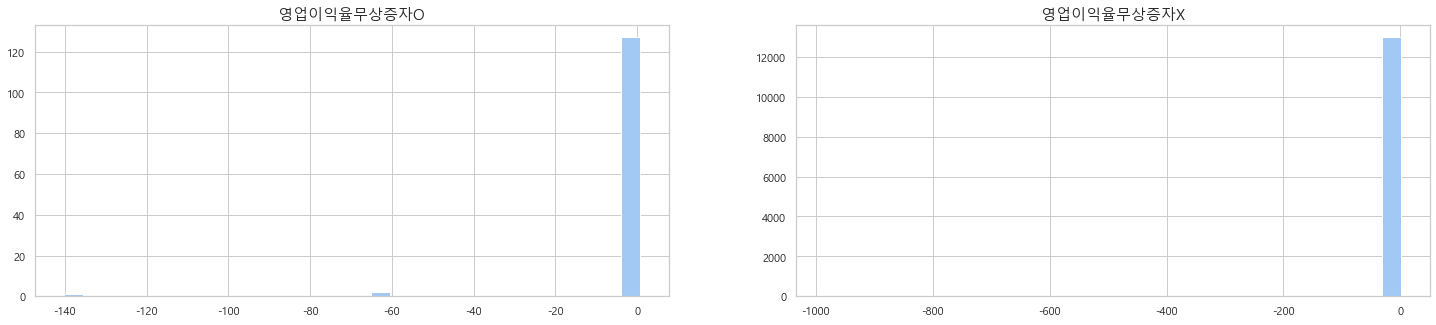

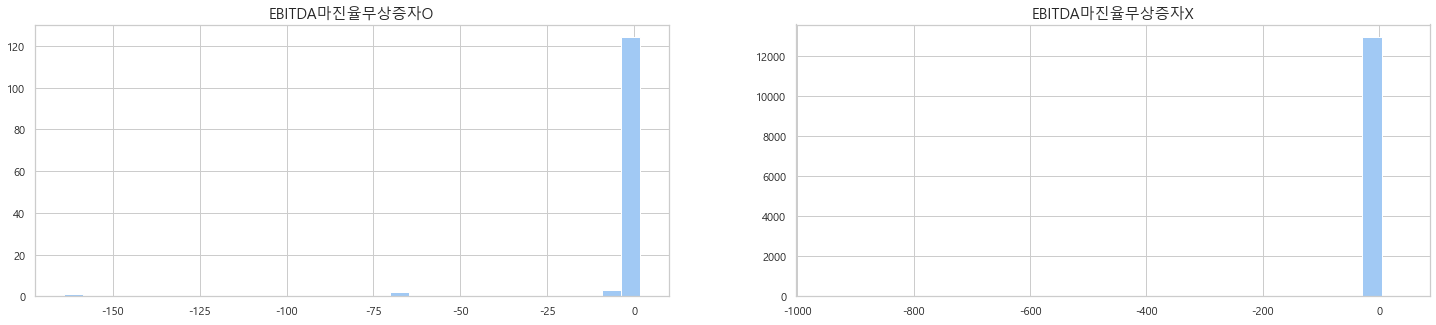

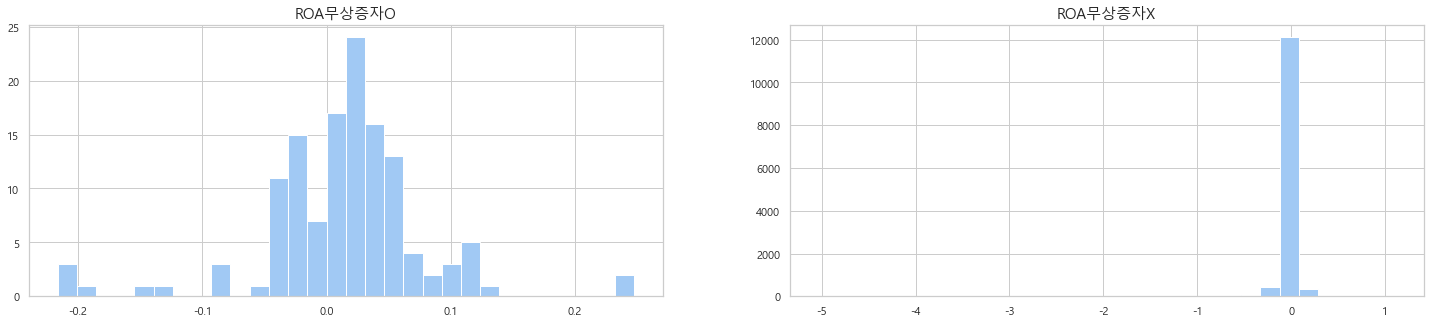

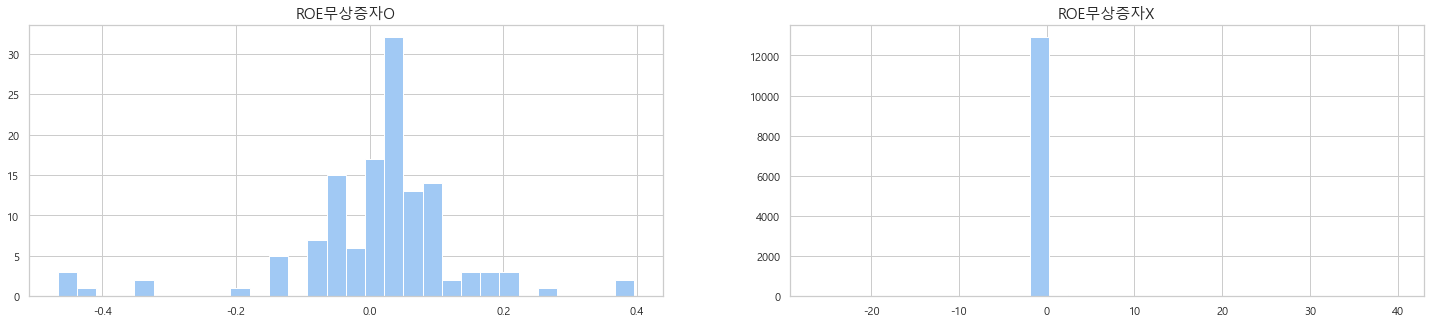

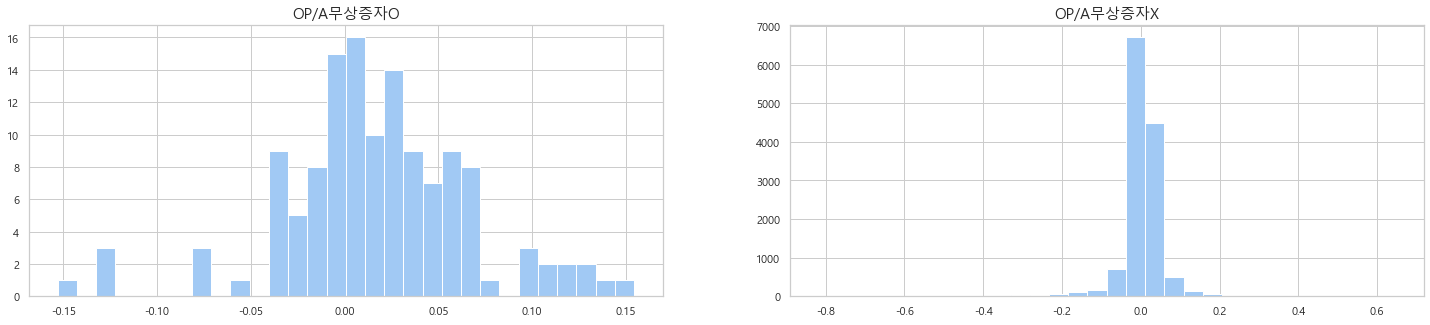

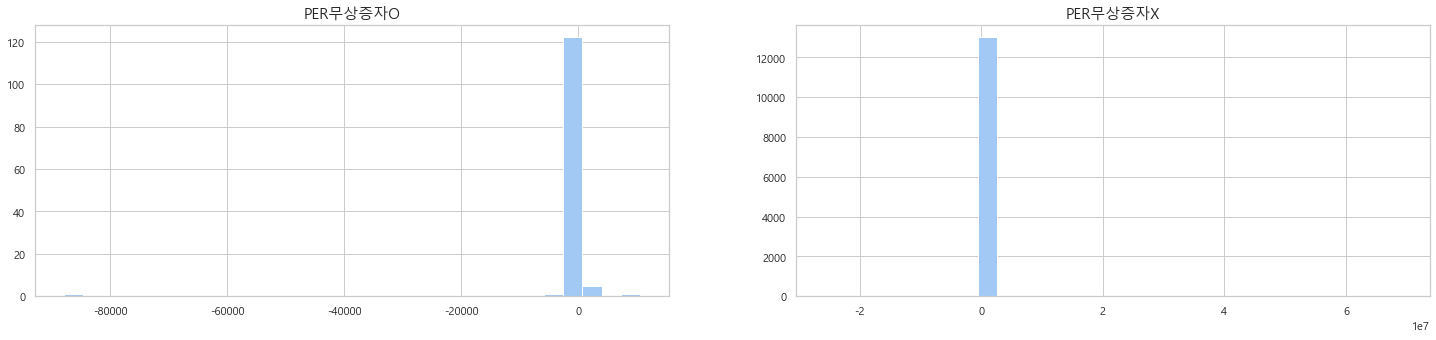

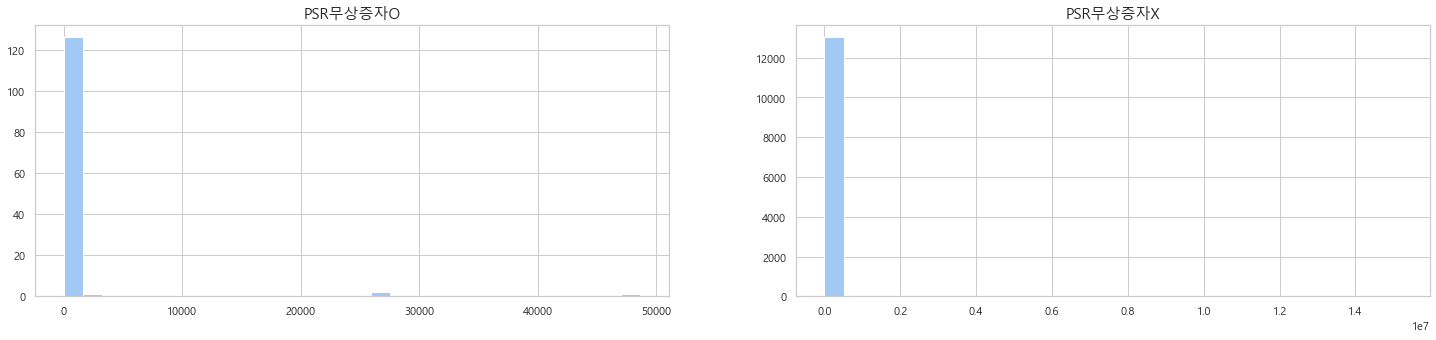

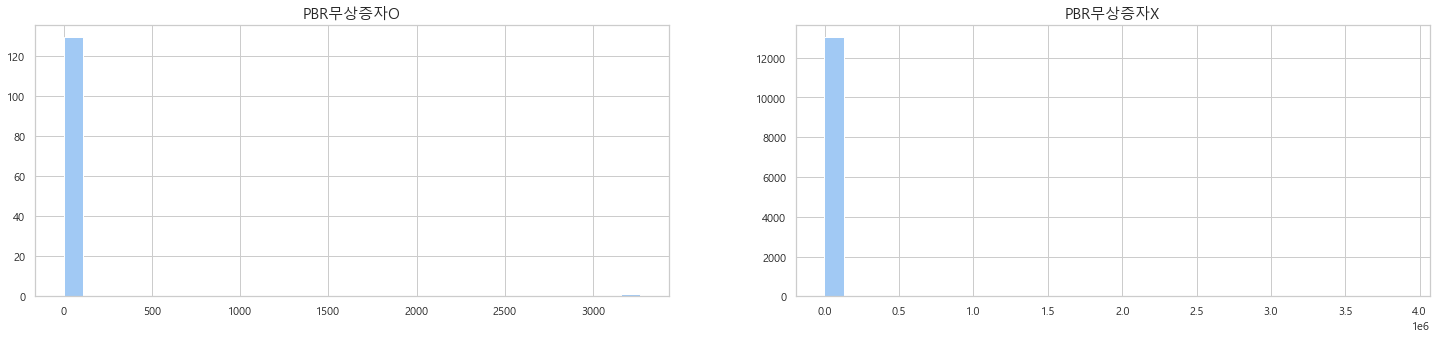

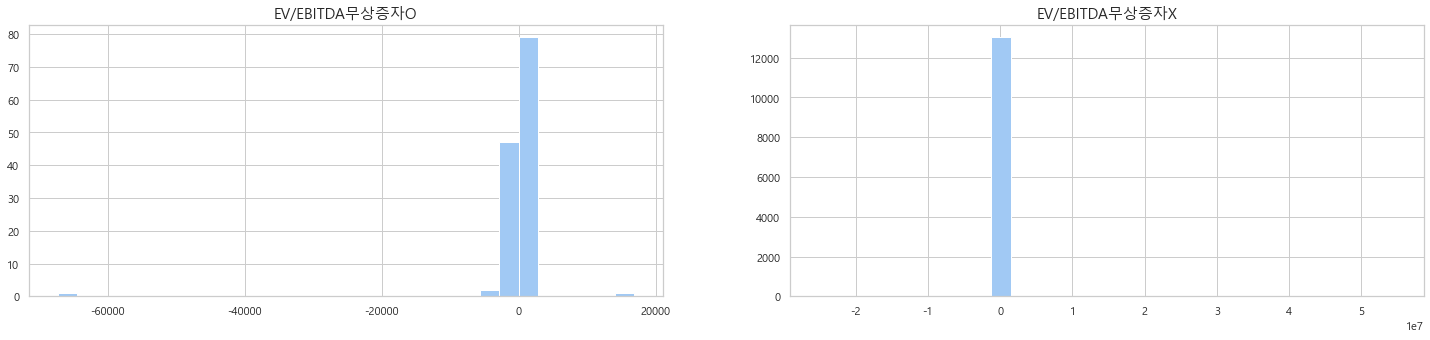

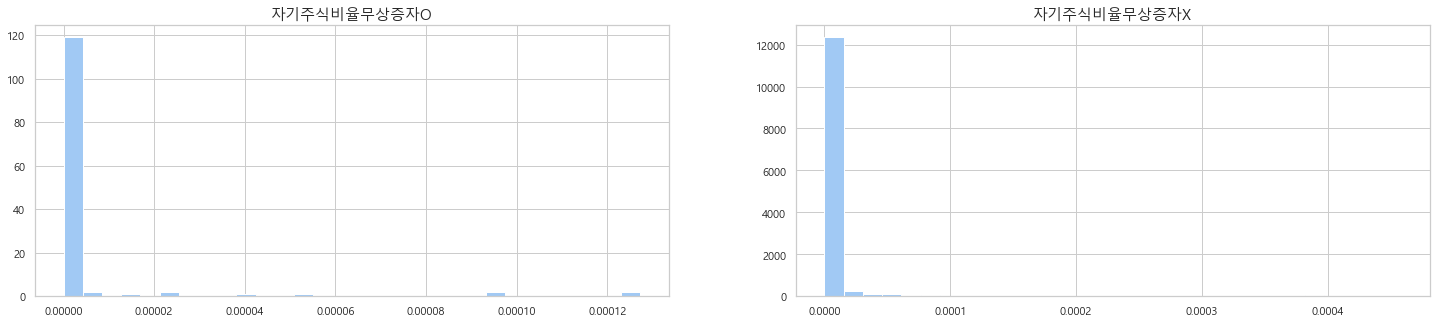

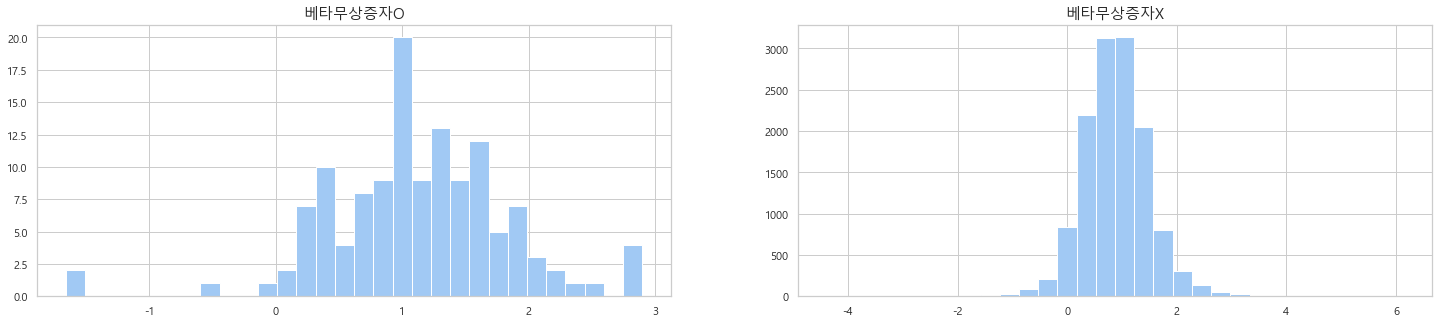

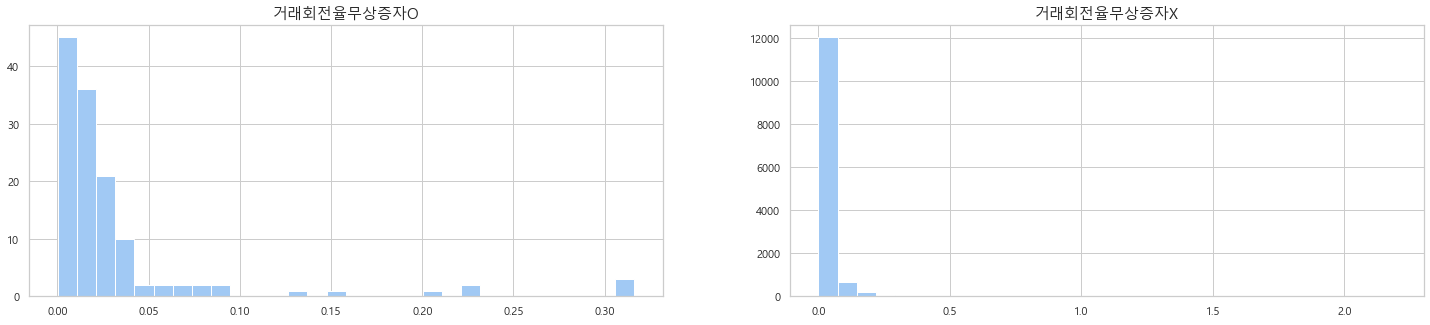

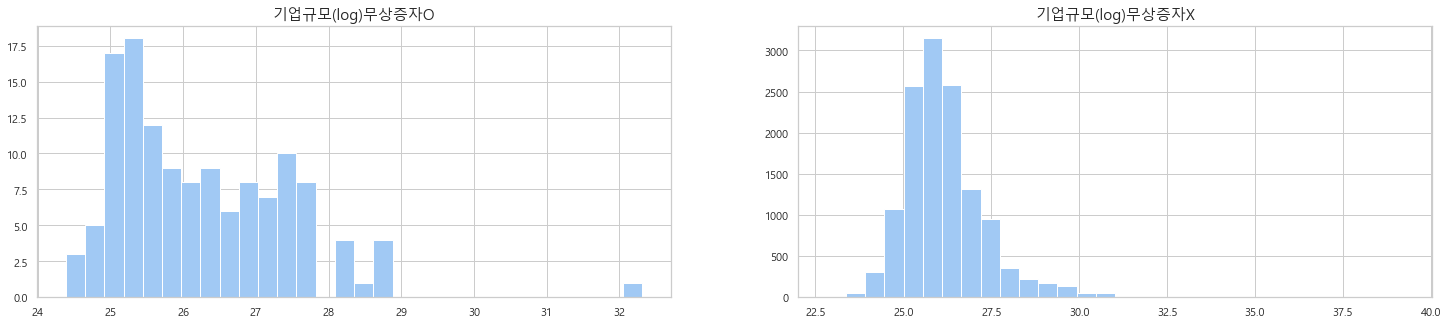

In [26]:
for distribution_column in distribution_columns:
    distribution(distribution_column)

#### P값 유의변수

In [27]:
print(p_values)

['윌리엄R%', 'RSI', 'CCI', '역배열', 'OBV', '볼린저밴드위치', '유동비율', '자산성장율', '자본성장율', '유동비율성장율', 'ROA', 'ROE', 'OP/A', '베타']


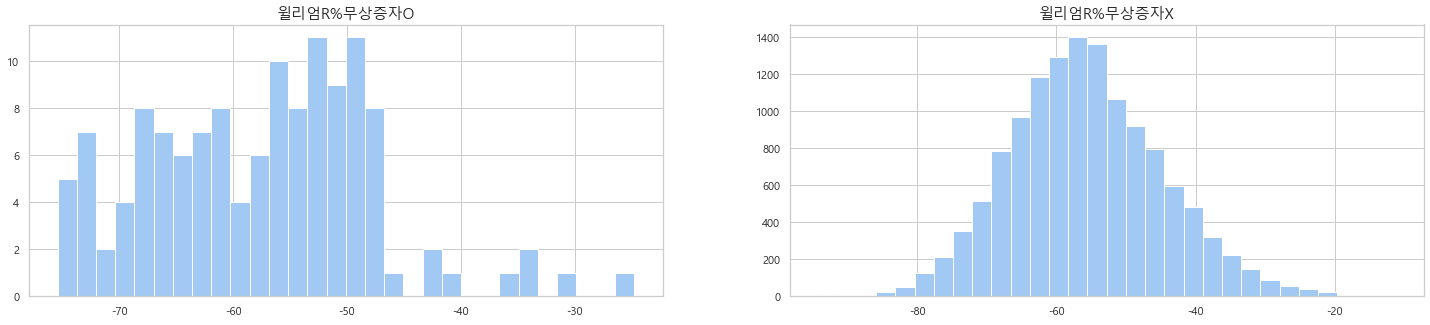

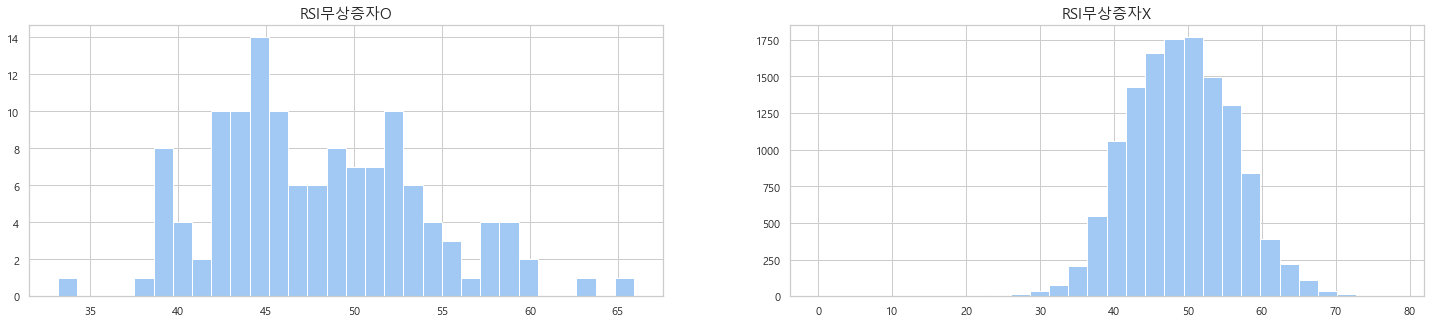

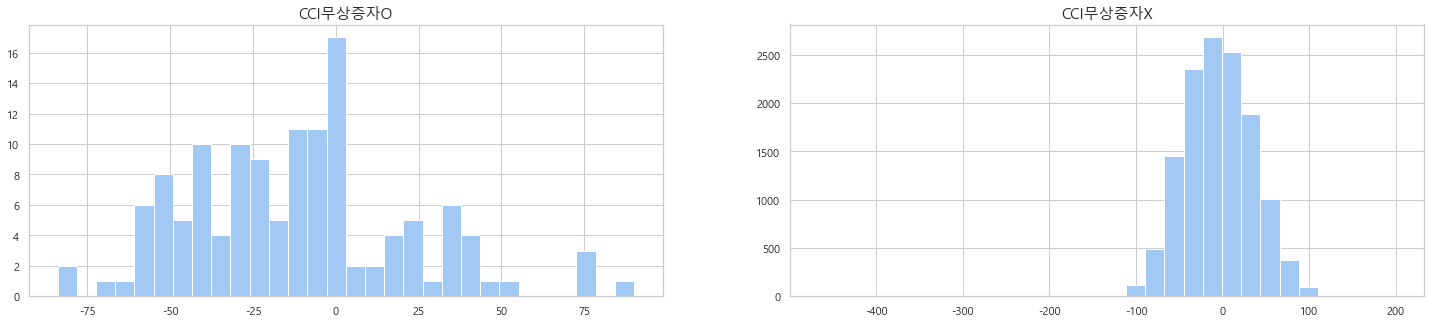

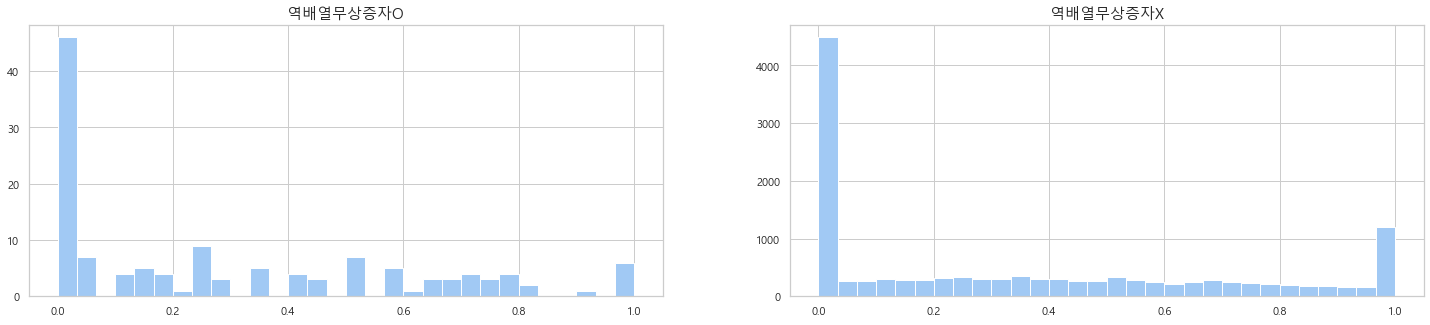

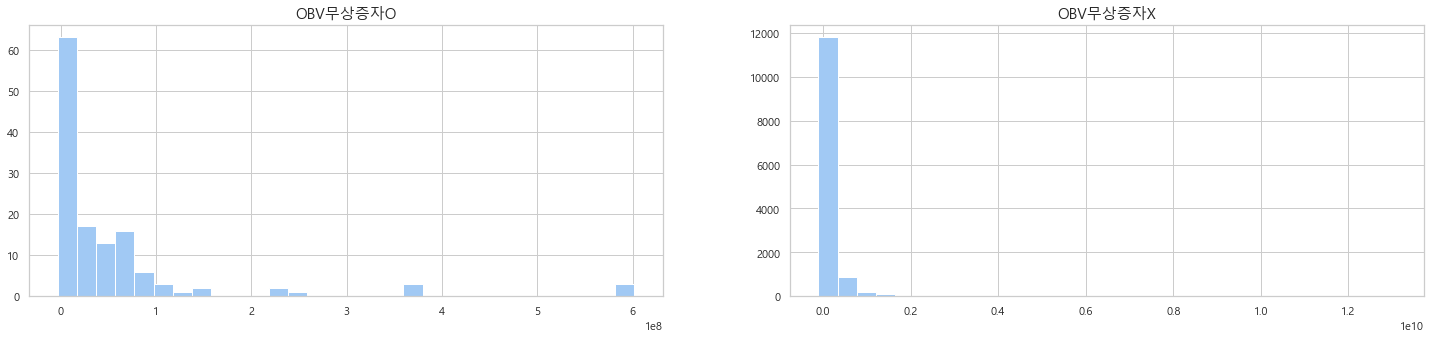

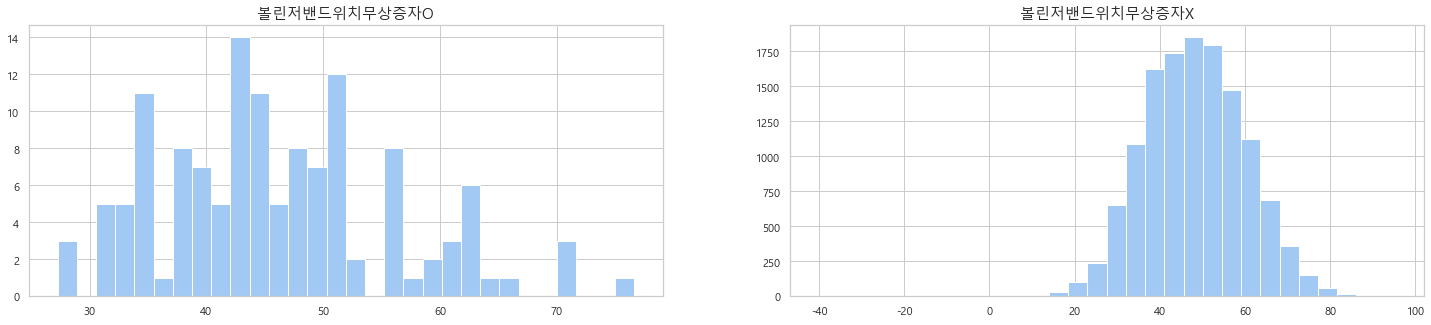

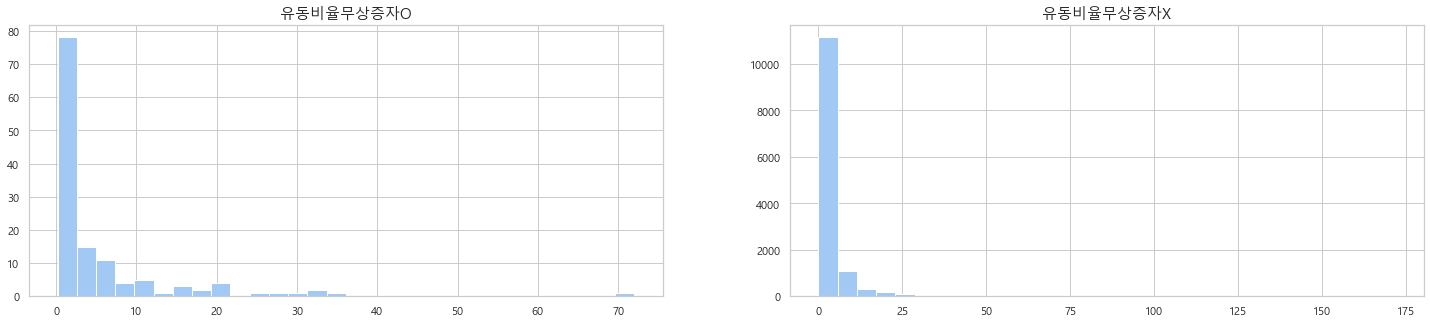

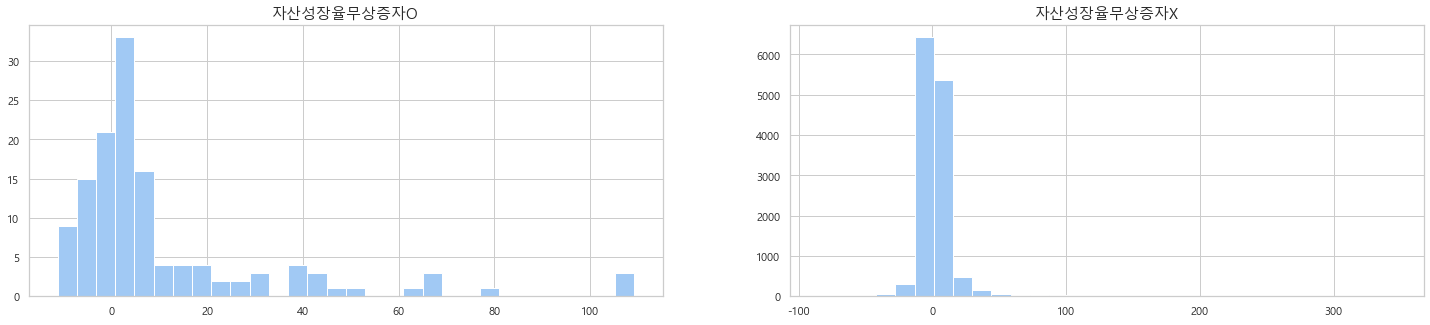

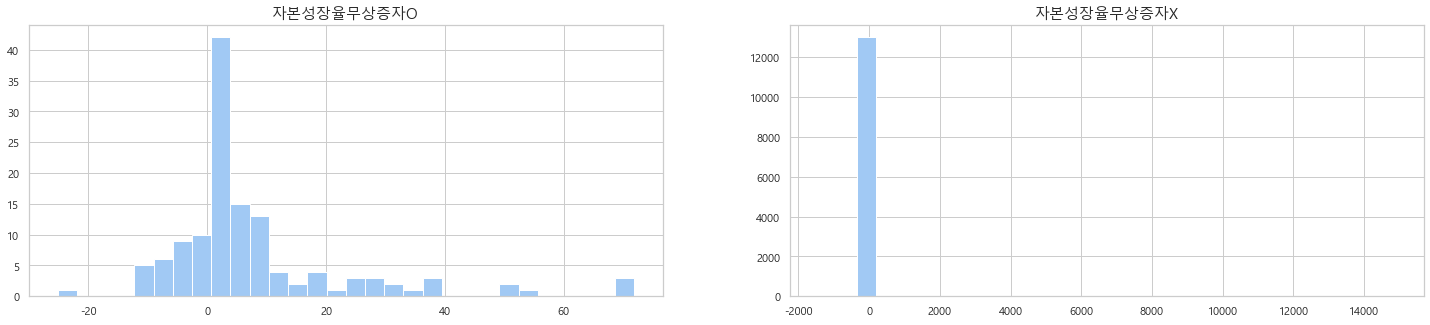

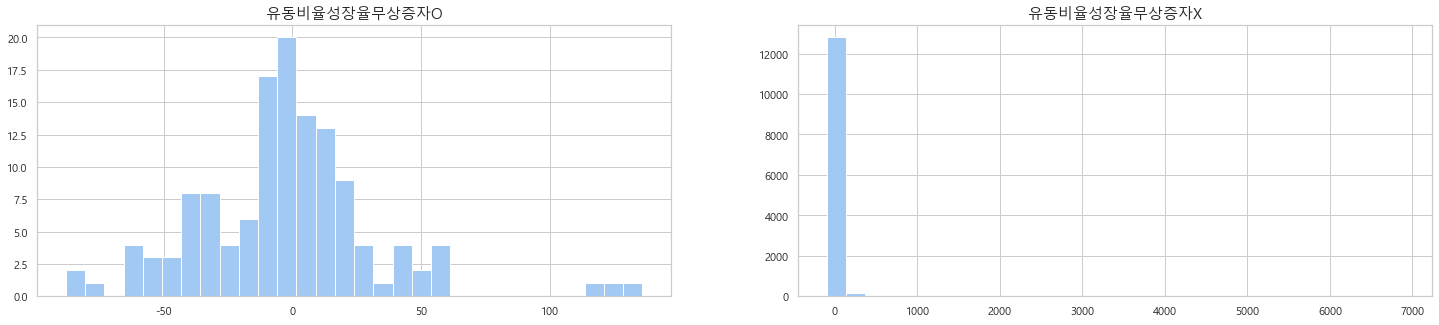

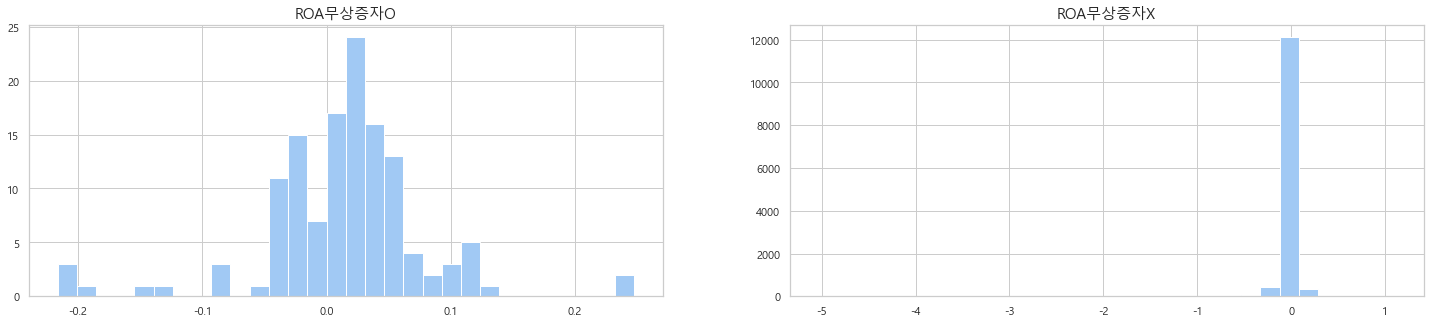

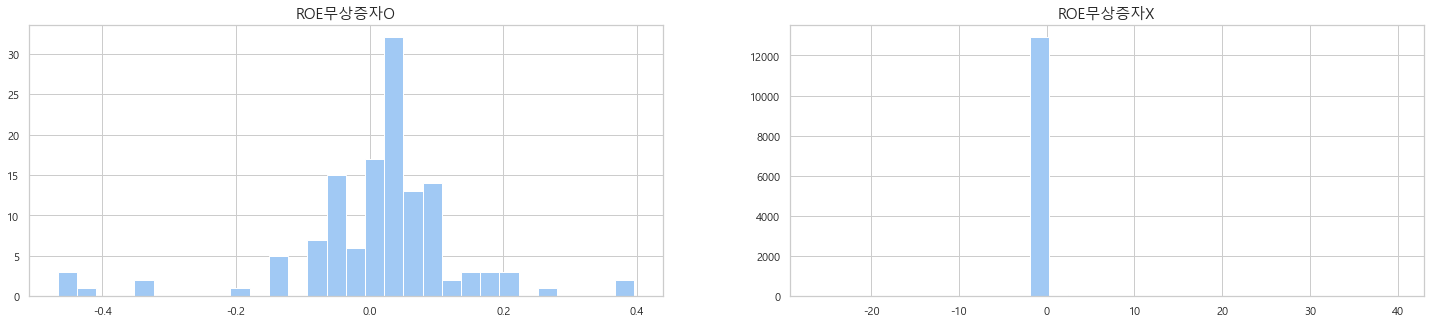

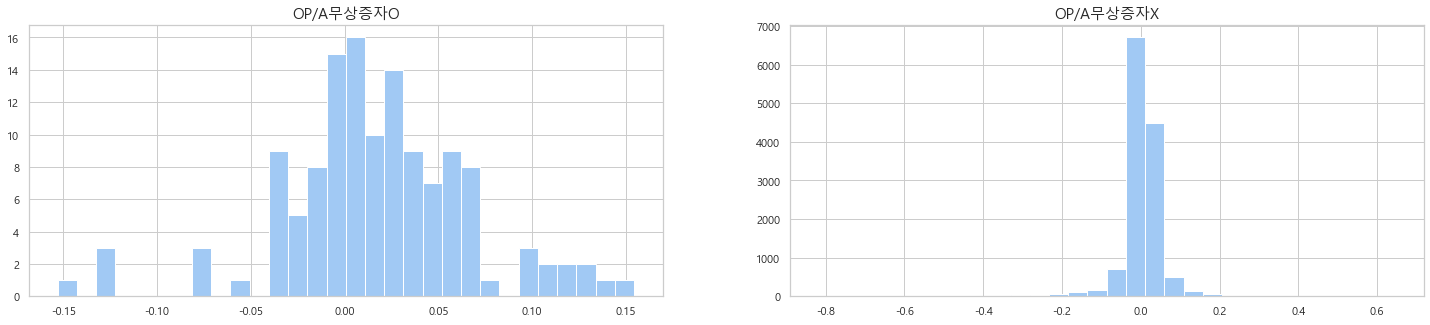

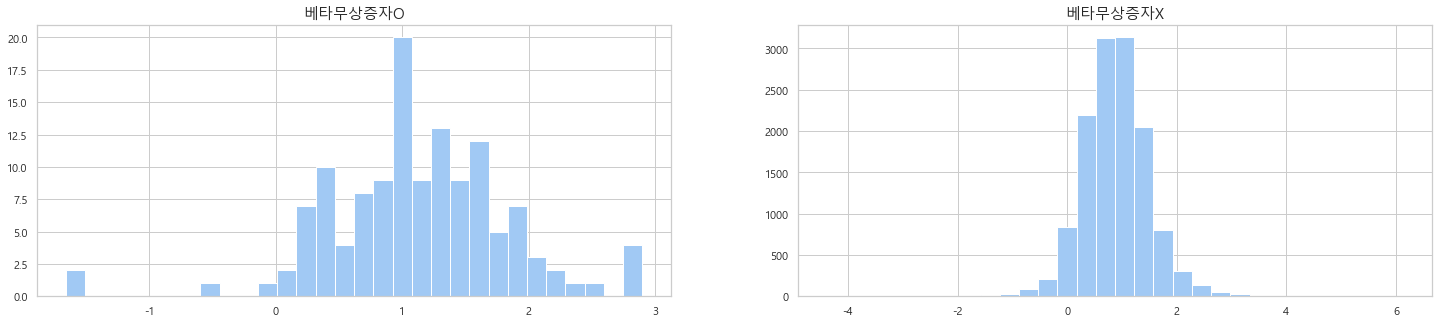

In [28]:
# 전체
for p_value in p_values:
    distribution(p_value)

### 상관관계

#### 상관관계가 높은 상위 20개 변수

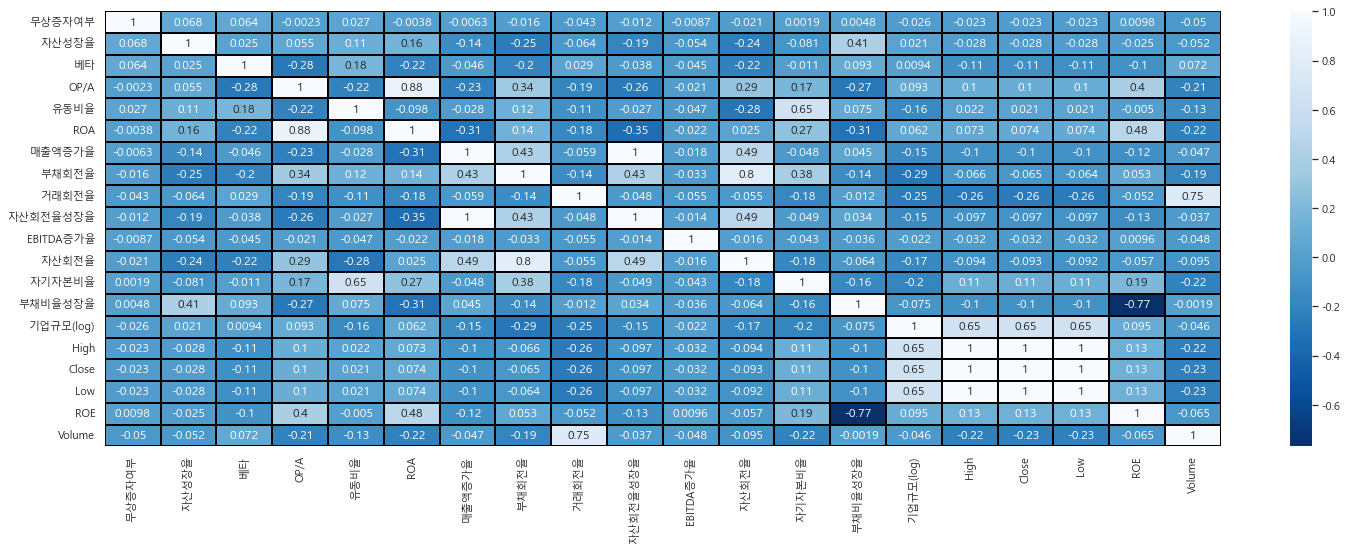

In [29]:
plt.figure(figsize=(25,8))

num_data = data.drop(['회사명', 'code', 'Date', 'Market', 'Sector', 'Industry', '증자비율'], axis = 1)
corr = num_data.corr()

num = 20
col = corr.nlargest(num, '무상증자여부')['무상증자여부'].index
coeff = np.corrcoef(corr[col].values.T)
plt.rcParams['font.family'] = 'Malgun Gothic'
# heatmap
heatmp = sns.heatmap(coeff, 
                     annot = True, 
                     xticklabels = col.values, yticklabels = col.values, 
                     linewidth=2,cmap='Blues_r', linecolor='black')

#### P값이 유의한 18개의 변수

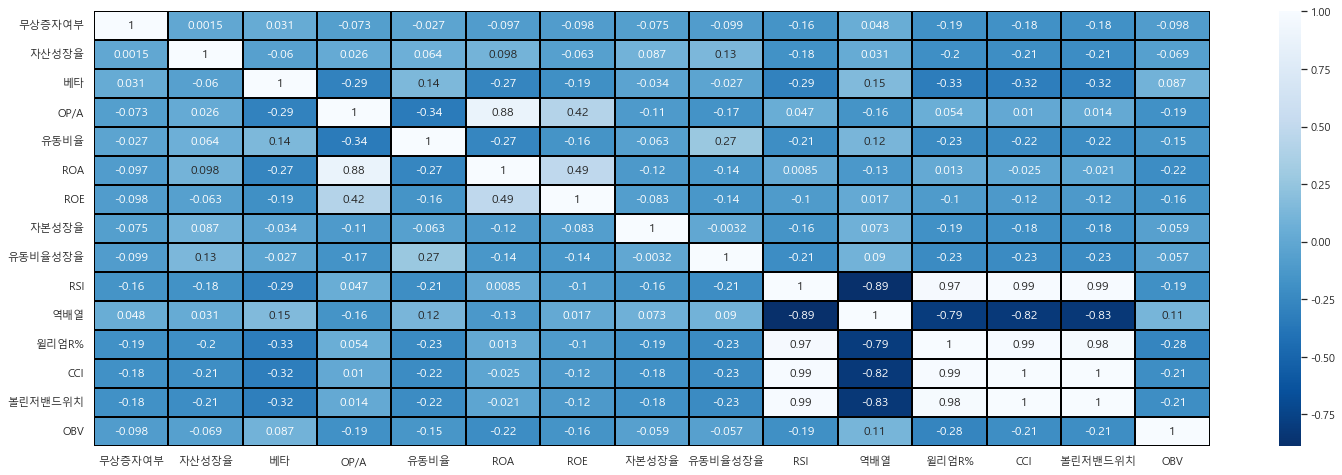

In [30]:
plt.figure(figsize=(25,8))

p_values.append('무상증자여부')
num_data = data[p_values]
corr = num_data.corr()

num = 18
col = corr.nlargest(num, '무상증자여부')['무상증자여부'].index
coeff = np.corrcoef(corr[col].values.T)
plt.rcParams['font.family'] = 'Malgun Gothic'
# heatmap
heatmp = sns.heatmap(coeff, 
                     annot = True, 
                     xticklabels = col.values, yticklabels = col.values, 
                     linewidth=2,cmap='Blues_r', linecolor='black')

### 상관관계와 P값 유의변수 비교

In [31]:
com = []
for p_value in p_values:
    if p_value in col:
        com.append(p_value)
print(com)
print(len(com))

['윌리엄R%', 'RSI', 'CCI', '역배열', 'OBV', '볼린저밴드위치', '유동비율', '자산성장율', '자본성장율', '유동비율성장율', 'ROA', 'ROE', 'OP/A', '베타', '무상증자여부']
15


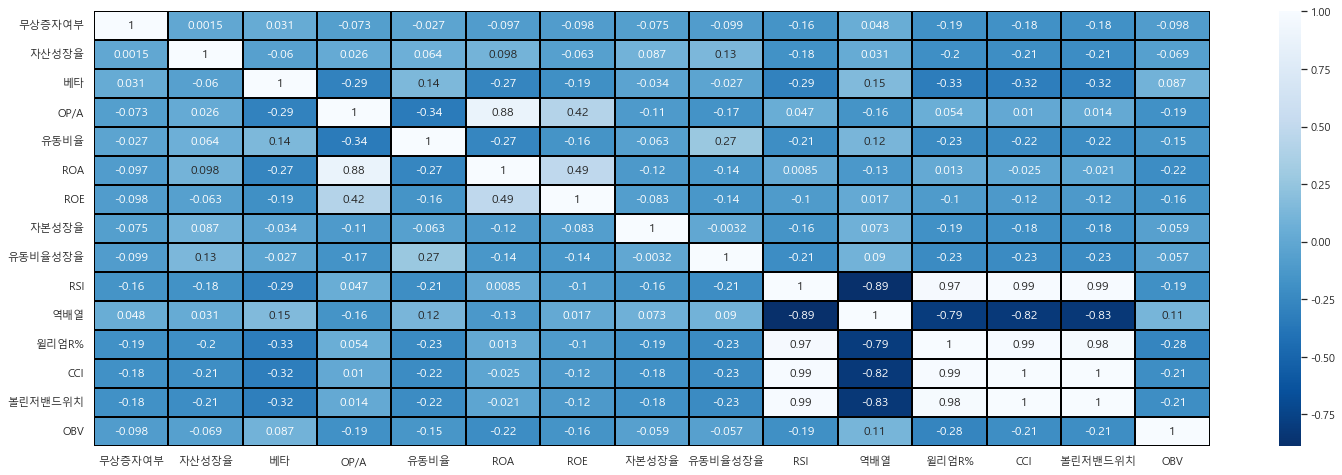

In [32]:
plt.figure(figsize=(25,8))

num_data = data[com]
corr = num_data.corr()

num = 19
col = corr.nlargest(num, '무상증자여부')['무상증자여부'].index
coeff = np.corrcoef(corr[col].values.T)
plt.rcParams['font.family'] = 'Malgun Gothic'
# heatmap
heatmp = sns.heatmap(coeff, 
                     annot = True, 
                     xticklabels = col.values, yticklabels = col.values, 
                     linewidth=2,cmap='Blues_r', linecolor='black')

## 명목형 변수

In [33]:
print(isBonusissue['Market'].value_counts())
print(noBonusissue['Market'].value_counts())

KOSDAQ    121
KOSPI       9
Name: Market, dtype: int64
KOSDAQ    9146
KOSPI     3870
Name: Market, dtype: int64


In [34]:
print(isBonusissue['Sector'].value_counts())

특수 목적용 기계 제조업                        18
전자부품 제조업                             13
자연과학 및 공학 연구개발업                       9
기타 화학제품 제조업                           7
소프트웨어 개발 및 공급업                        6
통신 및 방송 장비 제조업                        5
플라스틱제품 제조업                            5
기타 비금속 광물제품 제조업                       4
기타 식품 제조업                             4
컴퓨터 프로그래밍, 시스템 통합 및 관리업               4
광고업                                   4
기초 의약물질 및 생물학적 제제 제조업                 4
의약품 제조업                               4
기계장비 및 관련 물품 도매업                      3
상품 종합 도매업                             3
일반 목적용 기계 제조업                         3
자동차 신품 부품 제조업                         3
건축기술, 엔지니어링 및 관련 기술 서비스업              3
기타 금융업                                2
기타 과학기술 서비스업                          2
텔레비전 방송업                              2
의복 액세서리 제조업                           2
영화, 비디오물, 방송프로그램 제작 및 배급업             2
컴퓨터 및 주변장치 제조업                        2
생활용품 도매업                              2
